In [5]:
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
from prepare import load_object, save_object  

In [6]:
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/thesis.mplstyle')
from cycler import cycler
shade_cycler1 = (cycler(color=['blue', 'purple', 'magenta', 'pink']) + cycler(linestyle=['-', '--', ':', '-.']))
shade_cycler2 = (cycler(color=[plt.get_cmap('Set2')(0), plt.get_cmap('Set2')(1), plt.get_cmap('Set2')(2), plt.get_cmap('Set2')(3)]) 
                 + cycler(linestyle=['-', '--', ':', '-.']))
shade_cycler3 = (cycler(color=[plt.get_cmap('Dark2')(0), plt.get_cmap('Dark2')(1), plt.get_cmap('Dark2')(2), plt.get_cmap('Dark2')(3)]) 
                 + cycler(linestyle=['-', '--', ':', '-.']))

# t = ax.text(0.5, 0.5, 'Text')
# fonts = ['xx-small', 'x-small', 'small', 'medium', 'large', 
#          'x-large', 'xx-large', 'larger', 'smaller']
# for font in fonts:
#     t.set_fontsize(font)
#     print (font, round(t.get_fontsize(), 2))
# plt.close()   

In [24]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']

In [64]:
## The LEVEL 11 - 10 comparison 
config_set = [config2_1, config2_2] 
tchoice = 175
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL != 9) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=tchoice)  
            case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=config.L0, N=2**case.LEVEL, method='nearest')
            case.mu,case.Hs = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
            case.mu_plateau = case.mu[-10]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.path)
            print(case.config.P, case.Hskp, case.mu_plateau)

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
0.01 0.1721882074706879 0.12165492282549127
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_11_15_rand2_Htheta0.503/
0.01 0.173029718056137 0.12885307493278894
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
0.02 0.22926095996339688 0.15163585847043018
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_11_15_rand2_Htheta0.503/
0.02 0.23057716248042462 0.16988041660863618
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax04/
0.02 0.23004260427454876 0.15299474031081975
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax07/
0.02 0.22959229378232612 0.15264180630566615
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_wider/
0.02 0.22790468772857672 0.15329642459761258


/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_11_15_rand2_Htheta0.503/


(0.0, 0.2)

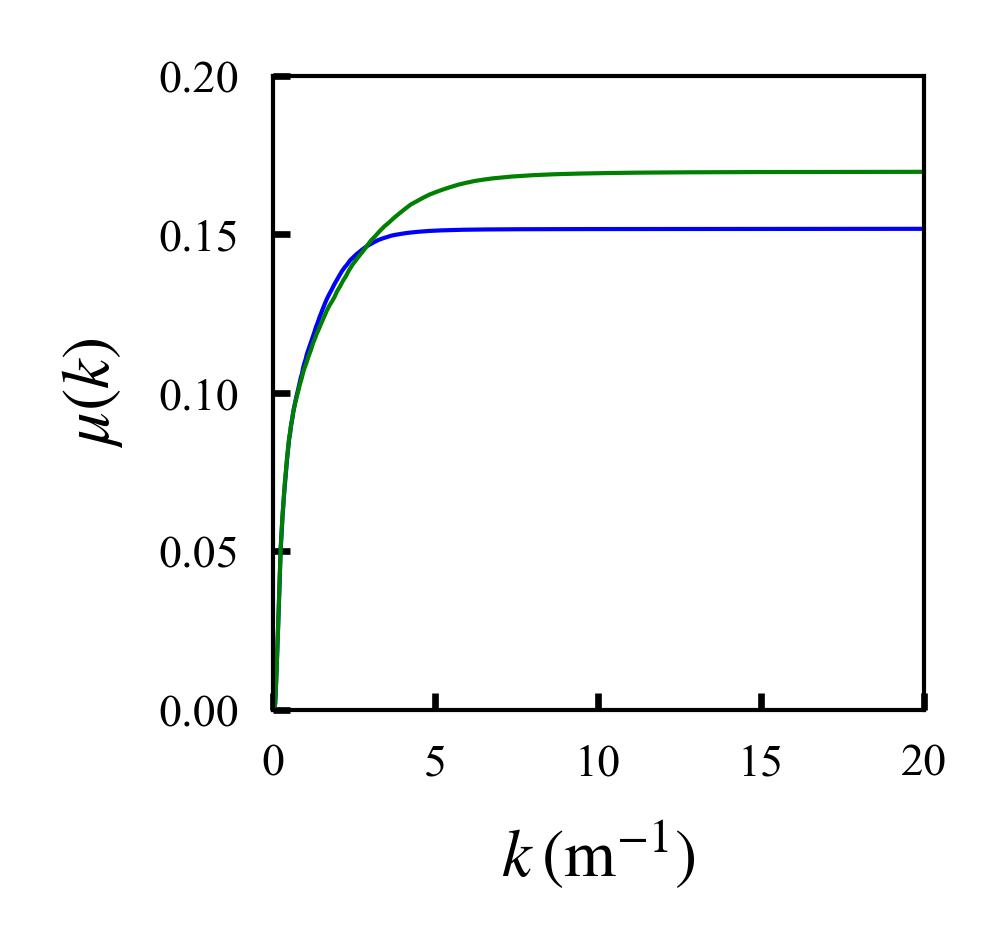

In [79]:
plt.figure(figsize=[1.4,1.4])
print(config2_2.cases[3].path)
plt.plot(config2_2.cases[3].kmod, config2_2.cases[3].mu, label='$N_h=1024$')
print(config2_2.cases[6].path)
plt.plot(config2_2.cases[6].kmod, config2_2.cases[6].mu, label='$N_h=2048$')
plt.xlabel('$k\:(\mathrm{m}^{-1})$'); plt.ylabel('$\mu(k)$')
plt.xlim([0,20]); plt.ylim([0,0.2])

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax04/
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax07/


/tmp/ipykernel_3313231/2579571507.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/spectrum_smax.pdf', bbox_inches='tight', pad_inche=0.)


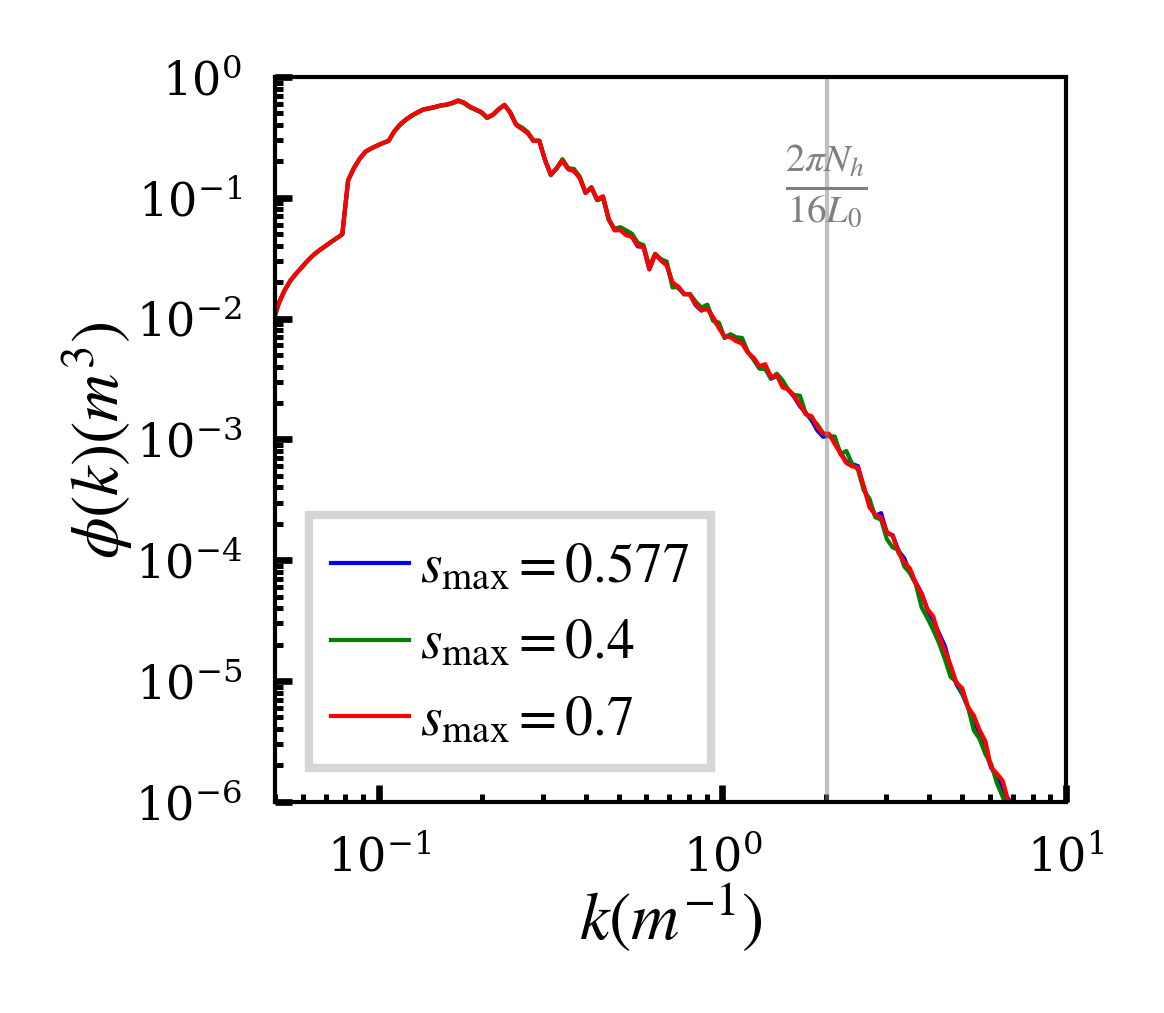

In [46]:
fig = plt.figure(figsize=[1.7,1.6]); ax = plt.gca()
case = config2_2.cases[3]
print(case.path)
plt.plot(case.kmod[2:-20], case.Fkmod[2:-20], '-', lw=0.5, label='$s_\mathrm{max}=0.577$')
case = config2_2.cases[7]
print(case.path)
plt.plot(case.kmod[2:-20], case.Fkmod[2:-20], '-', lw=0.5, label='$s_\mathrm{max}=0.4$')
case = config2_2.cases[8]
print(case.path)
plt.plot(case.kmod[2:-20], case.Fkmod[2:-20], '-', lw=0.5, label='$s_\mathrm{max}=0.7$')
case = config2_2.cases[9]
# print(case.path)
# plt.plot(case.kmod[2:-20], case.Fkmod[2:-20], '-', lw=0.5, label=' ')

            
plt.xscale('log'); plt.yscale('log')
plt.xlim([5*10**-2, 10])
plt.ylim([10**-6, 10**0])
ax.set_xticks([10**(-1), 1, 10])
ax.axvline(2*np.pi/(200/1024*16), alpha=0.5, c='gray')
ax.text(2*np.pi/(200/1024*16)*1, 0.1, r'$\frac{2\pi N_{h}}{16L_0}$', ha='center', fontsize='small', c='gray')
# ax.text(2*np.pi/(200/1024*16)*2, 0.1, r'$\frac{2\pi N_{h2}}{16L_0}$', ha='center', fontsize='small', c='gray')
# ax.axvline(2*np.pi/(200/2048*16), ls='--', alpha=0.5, c='gray')
ax.legend()
plt.xlabel(r'$k(m^{-1})$', labelpad=0); plt.ylabel(r'$\phi(k)(m^3)$', labelpad=0)
# plt.title('$\omega_p t = %.0f$' %(9.8*case.config.kp*tchoice))
fig.savefig('./figures_validation/spectrum_smax.pdf', bbox_inches='tight', pad_inche=0.)

In [13]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL != 9) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
#             case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35) # colored by kpHs
            case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.1) # colored by sigma
            print(case.Hskp)
            print(case.mu_plateau)

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
0.17401905799760833
0.10166228800649277
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_11_15_rand2_Htheta0.503/
0.17401904954631736
0.10153161041090122
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
0.24610011193160794
0.14377218647976125
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_11_15_rand2_Htheta0.503/
0.24610009997967758
0.14358738044087838
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax04/
0.24610011193160794
0.14377218647976125
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_smax07/
0.24610011193160794
0.14377218647976125
/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_wider/
0.25458252902084355
0.1999926569549221


/tmp/ipykernel_1366104/3433909926.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/spectrum_level_t1.pdf', bbox_inches='tight', pad_inche=0.)


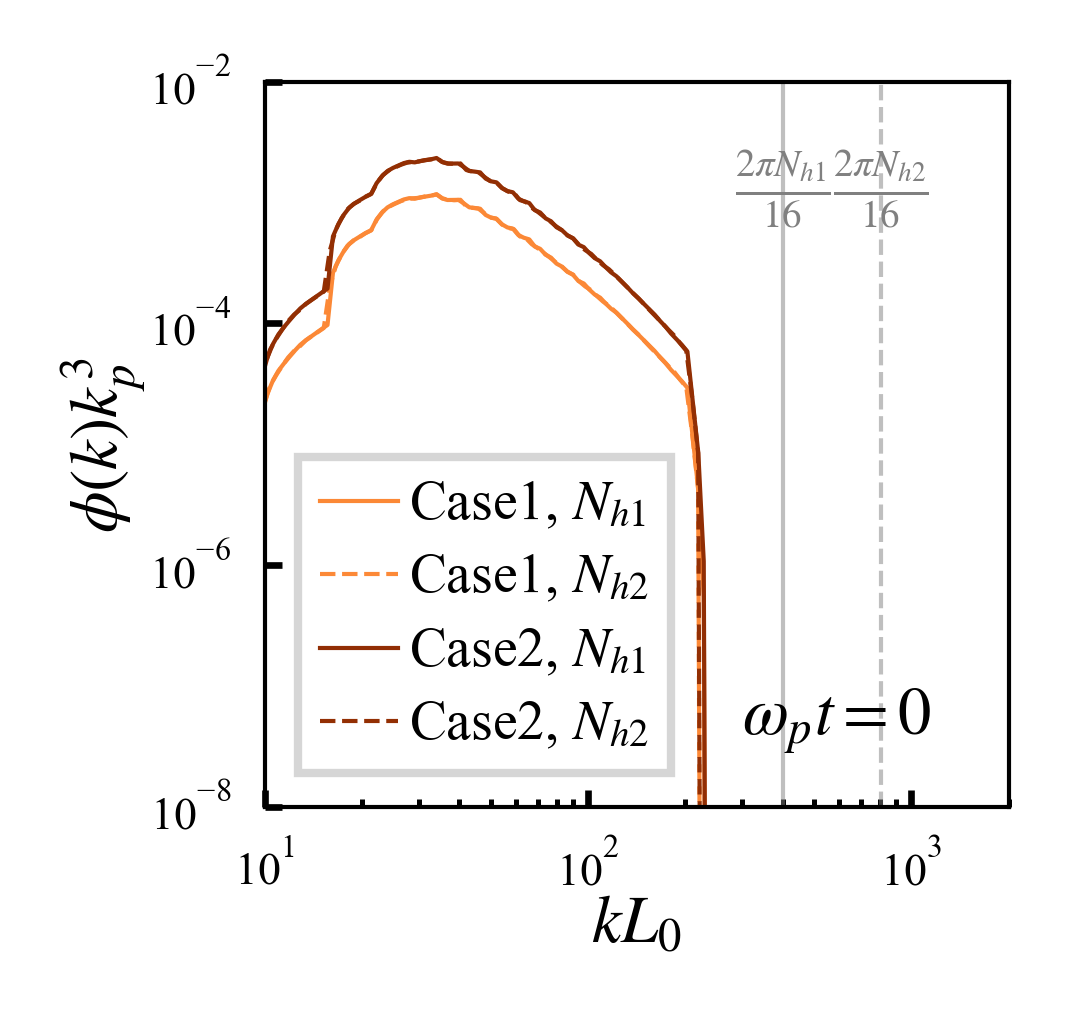

In [48]:
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()
for config in config_set[:]:
    for case in config.cases[0:7]:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            if case.config.P == 0.01:
                plt.plot(case.kmod[4:-20]*case.config.L0, case.Fkmod[4:-20]*case.config.kp**3, '-', c=case.cc, lw=0.5, 
                         label='Case1, $N_{h1}$')
            if case.config.P == 0.02:
                plt.plot(case.kmod[4:-20]*case.config.L0, case.Fkmod[4:-20]*case.config.kp**3, '-', c=case.cc, lw=0.5, 
                         label='Case2, $N_{h1}$')
        if (case.NL == 15) and (case.LEVEL == 11) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            if case.config.P == 0.01:
                plt.plot(case.kmod[4:-20]*case.config.L0, case.Fkmod[4:-20]*case.config.kp**3, '--', c=case.cc, lw=0.5, 
                         label='Case1, $N_{h2}$')
            if case.config.P == 0.02:
                plt.plot(case.kmod[4:-20]*case.config.L0, case.Fkmod[4:-20]*case.config.kp**3, '--', c=case.cc, lw=0.5, 
                         label='Case2, $N_{h2}$')
            
plt.xscale('log'); plt.yscale('log')
plt.xlim([10, 2000])
plt.ylim([10**-8, 10**-2])
ax.set_xticks([10, 100, 1000])
ax.axvline(2*np.pi*1024/16, alpha=0.5, c='gray')
ax.text(2*np.pi*1024/16*1, 0.001, r'$\frac{2\pi N_{h1}}{16}$', ha='center', fontsize='small', c='gray')
ax.text(2*np.pi*2048/16, 0.001, r'$\frac{2\pi N_{h2}}{16}$', ha='center', fontsize='small', c='gray')
ax.axvline(2*np.pi*2048/16, ls='--', alpha=0.5, c='gray')
ax.legend()
plt.xlabel(r'$kL_0$', labelpad=0); plt.ylabel(r'$\phi(k)k_p^3$', labelpad=0)
ax.text(300, 0.00000004, '$\omega_p t = %.0f$' %(9.8*case.config.kp*tchoice))
fig.savefig('./figures_validation/spectrum_level_t1.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Compute the breaking stats """
tseries_ensem = []
for i in range (0,2):    
    tstart = 100 + 50*i
    dt = 1
    tseries = np.arange(tstart, tstart+47, dt)
    tseries_ensem.append(tseries)
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 11) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.time_window(tseries_ensem, threshold=0, bins=[])
            
""" level 10, more frequent output allows smaller time intervals """
tseries_ensem = []
for i in range (0,5):    
    tstart = 100 + 20*i
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)
for k, config in enumerate(config_set):
    for case in config.cases[0:7]:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.time_window(tseries_ensem, threshold=0, bins=[])

In [ ]:
for k, config in enumerate(config_set):
    for case in config.cases[0:7]:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            picklename = case.path + 'breakingstat.pkl'
            save_object(case.hist_ensem, picklename)

In [10]:
for k, config in enumerate(config_set):
    for case in config.cases[0:7]:
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            picklename = case.path + 'breakingstat.pkl'
            case.hist_ensem = load_object(picklename)

P=0.01
P=0.02


/tmp/ipykernel_1728544/718818688.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/Lambdac_level.pdf', bbox_inches='tight', pad_inche=0.)


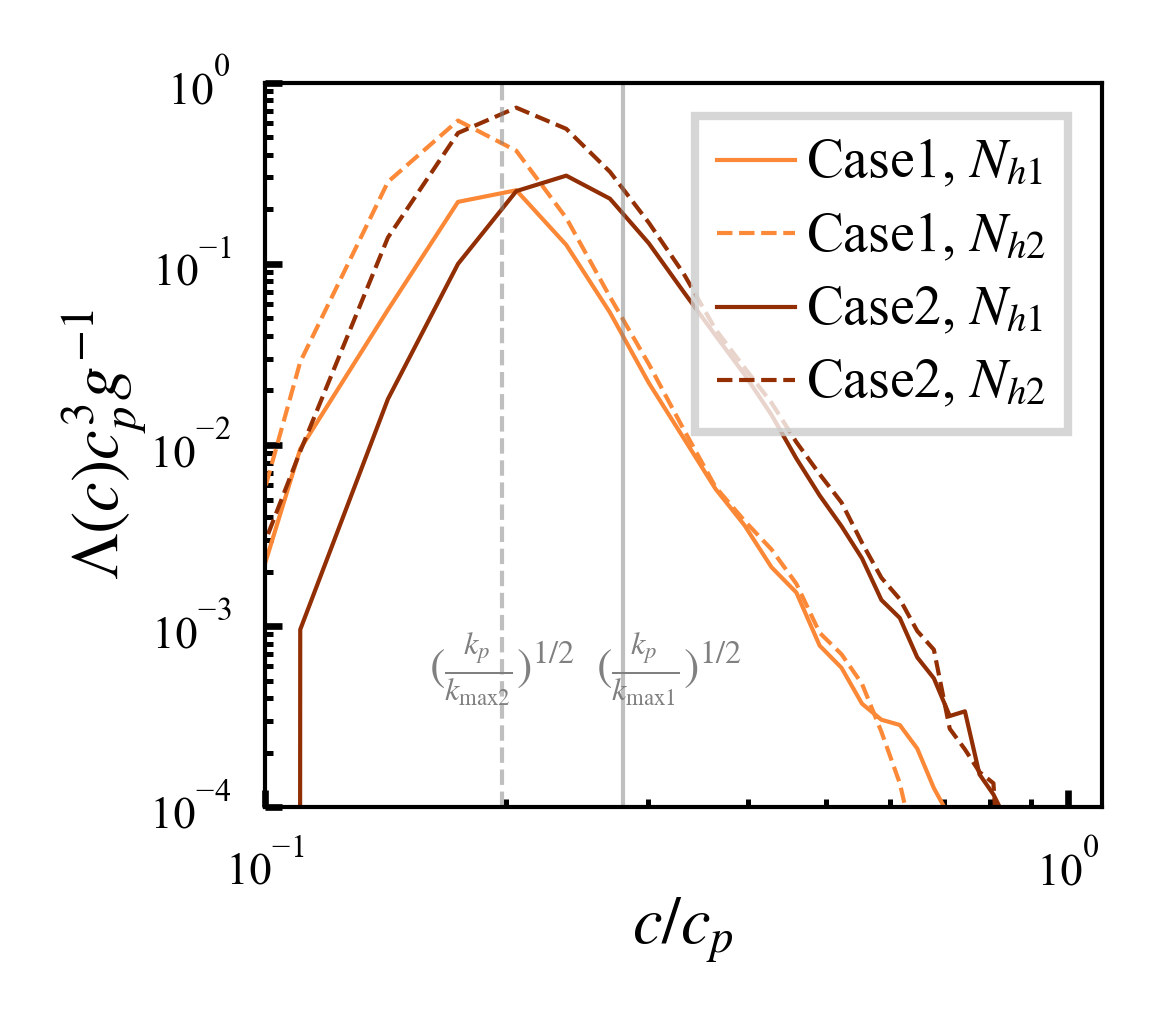

In [55]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[1.8,1.6]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases[0:7]):
#         normx = 1
#         normy = 1
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            if case.LEVEL == 10:
                    if case.config.P == 0.01:
                        plt.plot(bins_plotting/normx, np.average(case.hist_ensem['hist_ensem'][2:4],axis=0)/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case1, $N_{h1}$', c=case.cc, linestyle='-', alpha=1)
                    else:
                        plt.plot(bins_plotting/normx, np.average(case.hist_ensem['hist_ensem'][2:4],axis=0)/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case2, $N_{h1}$', c=case.cc, linestyle='-', alpha=1)
            if case.LEVEL == 11:
                if case.config.P == 0.01:
                    plt.plot(bins_plotting/normx, case.hist_ensem['hist_ensem'][1]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='Case1, $N_{h2}$', c=case.cc, linestyle='--', alpha=1)     
                else:
                    plt.plot(bins_plotting/normx, case.hist_ensem['hist_ensem'][1]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='Case2, $N_{h2}$', c=case.cc, linestyle='--', alpha=1)    

                
""" Log lim """
plt.xscale('log'); plt.yscale('log')
plt.xlim([0.1,1.1])
plt.ylim([10**(-4),10**(0)])
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)

plt.legend(loc='upper right')
cmin = (9.8/(2*np.pi*1024/16/200))**0.5
ax.axvline(cmin/normx, alpha=0.5, c='gray')
ax.text(cmin/normx*1.14, 0.0005, r'$(\frac{k_p}{k_\mathrm{max1}})^{1/2}$', ha='center', fontsize='x-small', c='gray')
cmin = (9.8/(2*np.pi*2048/16/200))**0.5
ax.axvline(cmin/normx, linestyle='--', alpha=0.5, c='gray')
ax.text(cmin/normx, 0.0005, r'$(\frac{k_p}{k_\mathrm{max2}})^{1/2}$', ha='center', fontsize='x-small', c='gray')

fig.savefig('./figures_validation/Lambdac_level.pdf', bbox_inches='tight', pad_inche=0.)

P=0.01
P=0.02


/tmp/ipykernel_1728544/3578446361.py:48: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/Lambdac_level_norm.pdf', bbox_inches='tight', pad_inche=0.)


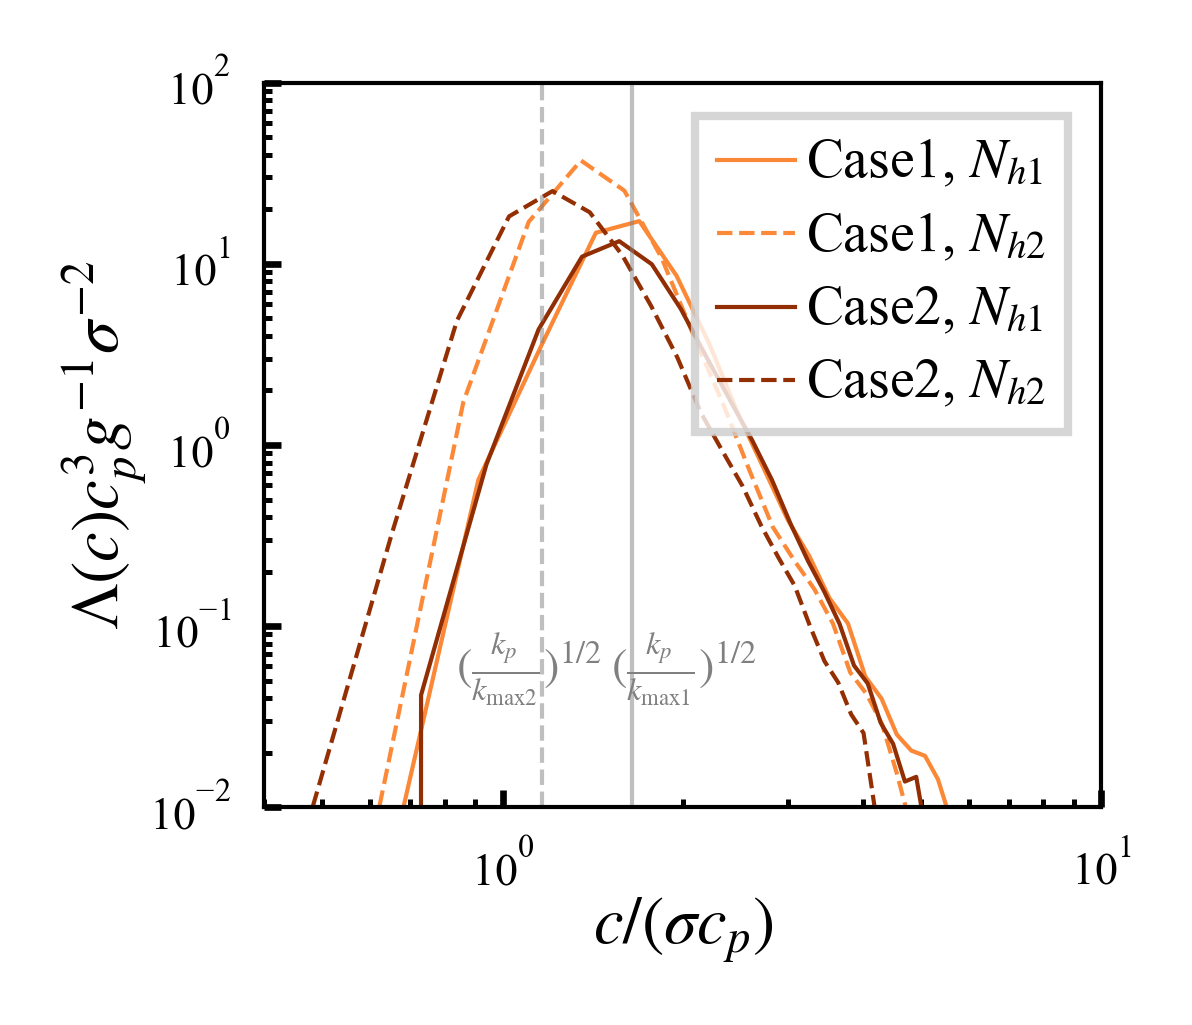

In [84]:
""" Normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[1.8,1.6]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases[:7]):
#         normx = 1
#         normy = 1
#         normx = (9.8/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            if case.LEVEL == 10:
                    if case.config.P == 0.01:
                        plt.plot(bins_plotting/normx, np.average(case.hist_ensem['hist_ensem'][2:4],axis=0)/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case1, $N_{h1}$', c=case.cc, linestyle='-', alpha=1)
                    else:
                        plt.plot(bins_plotting/normx, np.average(case.hist_ensem['hist_ensem'][2:4],axis=0)/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case2, $N_{h1}$', c=case.cc, linestyle='-', alpha=1)
            if case.LEVEL == 11:
                if case.config.P == 0.01:
                    plt.plot(bins_plotting/normx, case.hist_ensem['hist_ensem'][1]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='Case1, $N_{h2}$', c=case.cc, linestyle='--', alpha=1)     
                else:
                    plt.plot(bins_plotting/normx, case.hist_ensem['hist_ensem'][1]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='Case2, $N_{h2}$', c=case.cc, linestyle='--', alpha=1)    

""" Log lim """
plt.xscale('log'); plt.yscale('log')

plt.xlim([0.4,10])
plt.ylim([10**(-2),10**(2)])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)

plt.legend(loc='upper right')
cmin = (9.8/(2*np.pi*1024/16/200))**0.5
ax.axvline(cmin/normx, alpha=0.5, c='gray')
ax.text(cmin/normx*1.22, 0.05, r'$(\frac{k_p}{k_\mathrm{max1}})^{1/2}$', ha='center', fontsize='x-small', c='gray')
cmin = (9.8/(2*np.pi*2048/16/200))**0.5
ax.axvline(cmin/normx, linestyle='--', alpha=0.5, c='gray')
ax.text(cmin/normx*0.95, 0.05, r'$(\frac{k_p}{k_\mathrm{max2}})^{1/2}$', ha='center', fontsize='x-small', c='gray')
fig.savefig('./figures_validation/Lambdac_level_norm.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases[:7]):
#         normx = 1
#         normy = 1
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            # normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            # normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.LEVEL == 11:
                    if case.config.P == 0.01:
                        twindow = case.hist_ensem['tseries_ensem'][i]*9.8*case.config.kp
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case1, $\omega_p t\in (%.0f, %.0f)$' %(twindow[0],twindow[-1]),
                                 c=plt.get_cmap('Greens')((i+1)/3), linestyle='-', alpha=1)
                    if case.config.P == 0.02:
                        twindow = case.hist_ensem['tseries_ensem'][i]*9.8*case.config.kp
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case2, $\omega_p t\in (%.0f, %.0f)$' %(twindow[0],twindow[-1]),
                                 c=plt.get_cmap('Blues')((i+1)/3), linestyle='-', alpha=1)

""" Log lim """
plt.xscale('log'); plt.yscale('log')
plt.xlim([0.1,1.1])
plt.ylim([10**(-4),10**(0)])
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=6)
fig.savefig('./figures_validation/Lambdac_temporal_level11_dt1.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Not normalized Lambda(x) distribution. In both linear and log scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases[:7]):
#         normx = 1
#         normy = 1
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            # normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            # normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.LEVEL == 10:
                    if case.config.P == 0.01:
                        twindow = case.hist_ensem['tseries_ensem'][i]*9.8*case.config.kp
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case1, $\omega_p t\in (%.0f, %.0f)$' %(twindow[0],twindow[-1]),
                                 c=plt.get_cmap('Greens')((i+1)/6), linestyle='-', alpha=1)
                    if case.config.P == 0.02:
                        twindow = case.hist_ensem['tseries_ensem'][i]*9.8*case.config.kp
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                                 label='Case2, $\omega_p t\in (%.0f, %.0f)$' %(twindow[0],twindow[-1]),
                                 c=plt.get_cmap('Blues')((i+1)/6), linestyle='-', alpha=1)

""" Log lim """
plt.xscale('log'); plt.yscale('log')
plt.xlim([0.1,1.1])
plt.ylim([10**(-4),10**(0)])
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=6)
fig.savefig('./figures_validation/Lambdac_temporal_level10_dt02.pdf', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = 1
#         normy = 1
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.LEVEL == 10:
                    plt.plot(bins_plotting[:-2]/normx, hist[:-2]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy*bins_plotting**6, 
                             label='$N_h=%g$' %2**case.LEVEL, c=case.cc, linestyle='-', alpha=1)
                if case.LEVEL == 11:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy*bins_plotting**6, 
                             label='$N_h=%g$' %2**case.LEVEL, c=case.cc, linestyle='--', alpha=1)          


""" Linear lim """
# plt.xlim([0,12])
# plt.ylim([0,2.5*10**(-3)]) # Linear
# plt.xticks(np.array([0,2,4,6,8,10,12])) # Linear x
# plt.yticks(np.array([0,0.5e-3,1e-3,1.5e-3,2e-3,2.5e-3])) # Linear y
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # linear

# # formatter = ticker.FormatStrFormatter('?%1.2f')
# # formatter = ticker.FormatStrFormatter('%g')
# # Axis.set_major_formatter(ax.xaxis, formatter)

# plt.xlabel(r'$c(ms^{-1})$', labelpad=0); 
# plt.ylabel(r'$\Lambda(c)(m^{-2}s)$', labelpad=0)

""" Log lim """
plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,1])
# plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
plt.legend()

In [15]:
def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/955911434.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/energy_case2.pdf', bbox_inches='tight', pad_inche=0.)


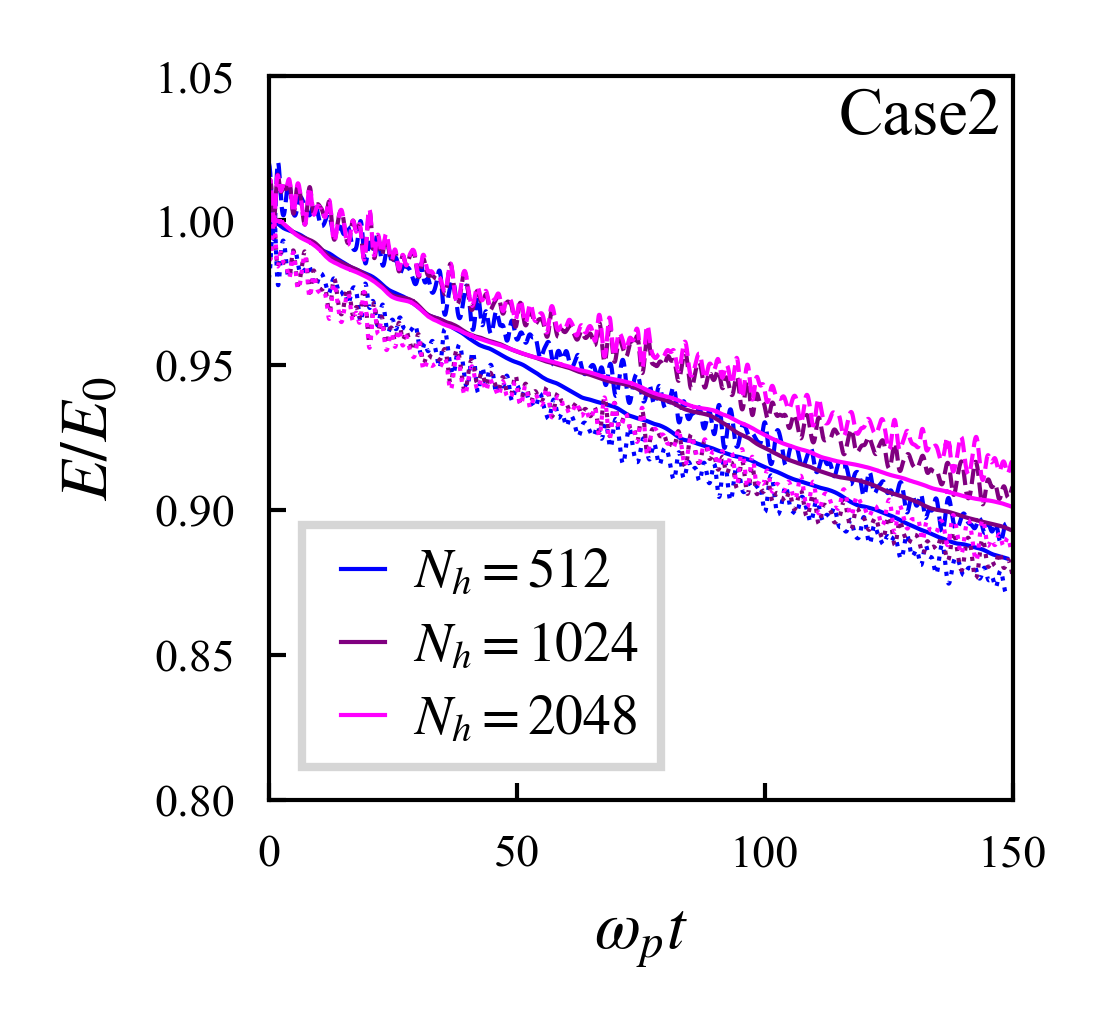

In [322]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
ax.set_prop_cycle(shade_cycler1)
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

case = config2_2.cases[0]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$N_h=%g$' %(2**case.LEVEL))

case = config2_2.cases[3]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$N_h=%g$' %(2**case.LEVEL))

case = config2_2.cases[-1]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0], ':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(),
        label='$N_h=%g$' %(2**case.LEVEL))
ax.text(115, 1.03, 'Case2')

ax.set_ylim([0.8,1.05])
ax.set_xlim([0.,150])
plt.legend(loc='lower left')
ax.set_xticks([0, 50, 100, 150])
plt.xlabel(r'$\omega_p t$'); plt.ylabel(r'$E/E_0$')
fig.savefig('./figures_validation/energy_case2.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/3815487117.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_validation/energy_case1_longer.pdf', bbox_inches='tight', pad_inche=0.)


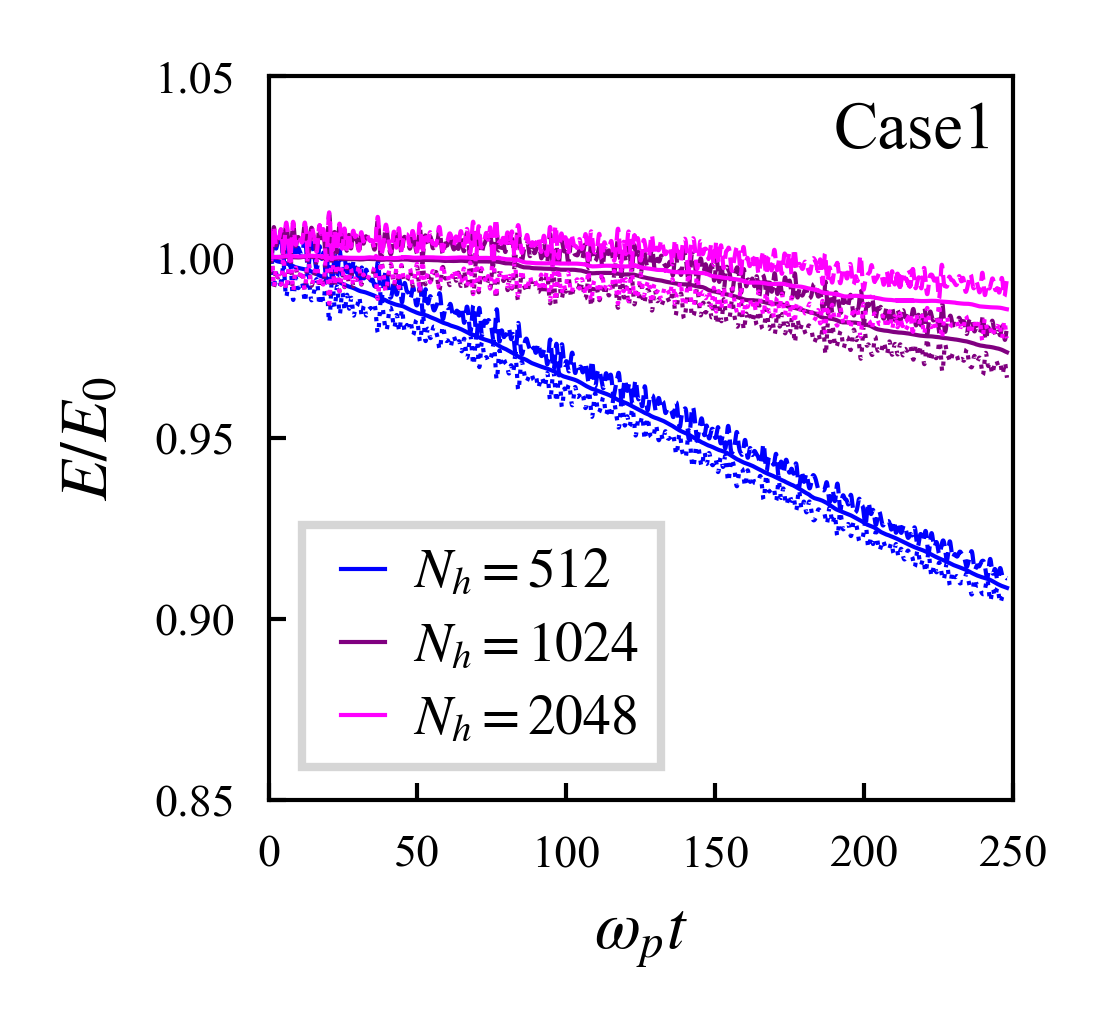

In [327]:
fig = plt.figure(figsize=[1.6,1.6]); ax = fig.gca()
ax.set_prop_cycle(shade_cycler1)
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

case = config2_1.cases[0]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$N_h=%g$' %(2**case.LEVEL))


case = config2_1.cases[3]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$N_h=%g$' %(2**case.LEVEL))

case = config2_1.cases[-1]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0], ':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(),
        label='$N_h=%g$' %(2**case.LEVEL))

ax.set_ylim([0.85,1.05])
ax.set_xlim([0.,250])
plt.legend(loc='lower left')
ax.set_xticks([0, 50, 100, 150,200,250])
plt.xlabel(r'$\omega_p t$'); plt.ylabel(r'$E/E_0$')
ax.text(190, 1.03, 'Case1')

fig.savefig('./figures_validation/energy_case1_longer.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_266132/2861470990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


Text(0, 0.5, '$E/E_0$')

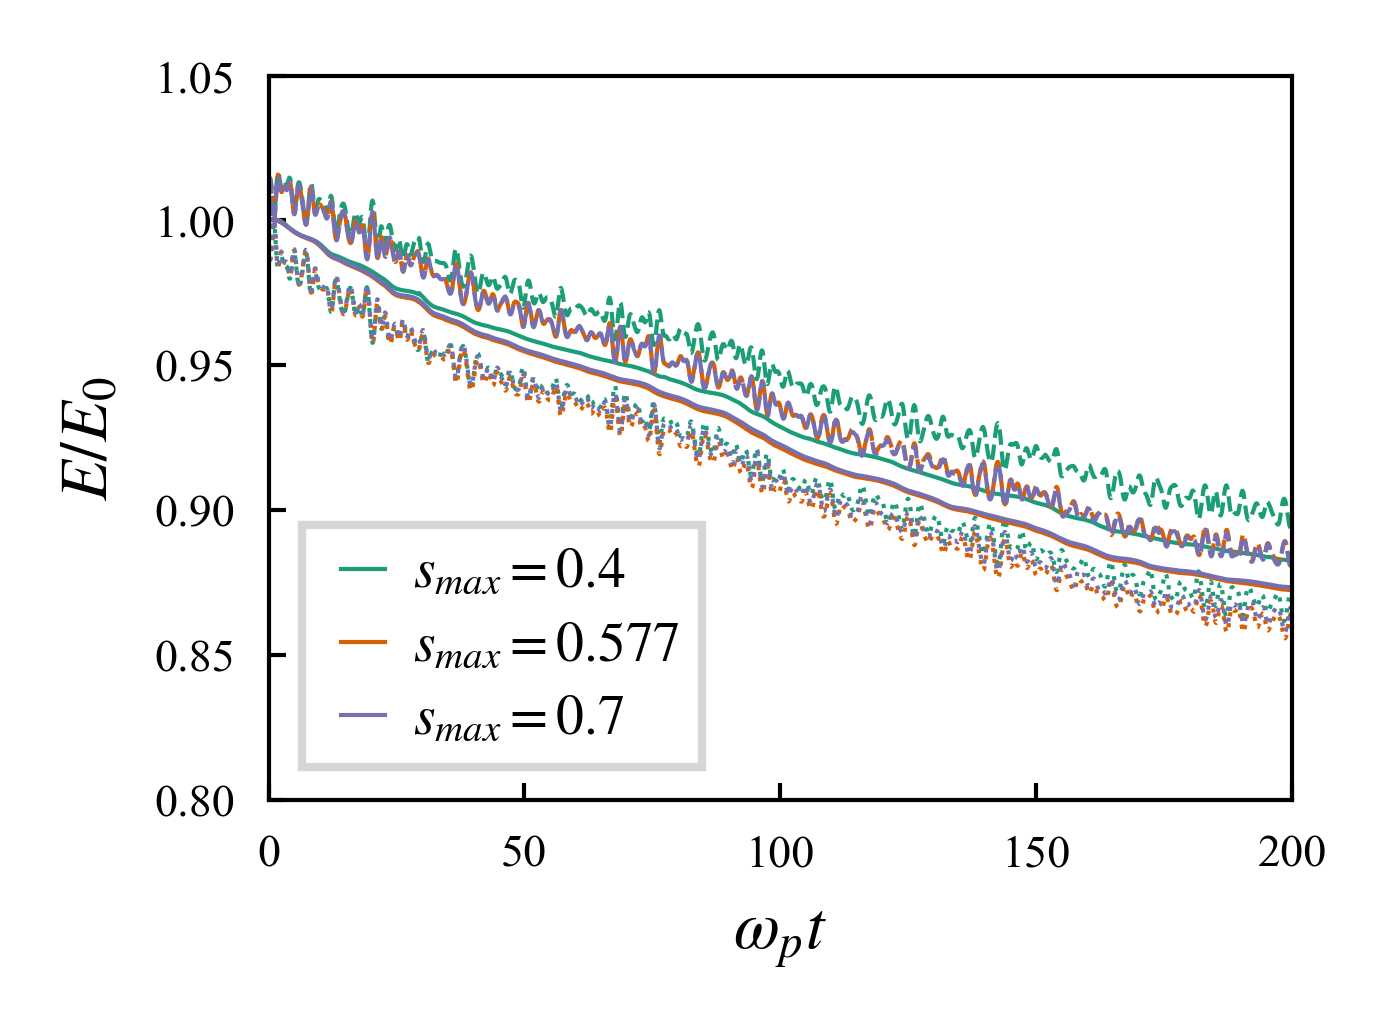

In [316]:
fig = plt.figure(figsize=[2.2,1.6]); ax = fig.gca()
ax.set_prop_cycle(shade_cycler3)
tag = ''
kp = 2*np.pi/(200/5)
omegap = (9.8*kp)**0.5

path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503_smax04/'
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$s_{max}=0.4$')

case = config2_2.cases[3]
path = case.path
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0],'--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0],':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(), 
        label='$s_{max}=0.577$')

path = '/projects/DEIKE/jiarongw/multilayer/revision/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503_smax07/'
energy = read('energy_before_remap.dat')
ax.plot(energy.t*omegap, 2*energy.ke/energy.total[0], '--')
ax.plot(energy.t*omegap, 2*energy.gpe/energy.total[0], ':', c=plt.gca().lines[-1].get_color())
ax.plot(energy.t*omegap, energy.total/energy.total[0],'-', c=plt.gca().lines[-1].get_color(),
        label='$s_{max}=0.7$')

ax.set_ylim([0.8,1.05])
ax.set_xlim([0.,200])
plt.legend(loc='lower left')
ax.set_xticks([0, 50, 100, 150, 200])
plt.xlabel(r'$\omega_p t$'); plt.ylabel(r'$E/E_0$')

## The LEVEL 10 cases 

In [317]:
""" First compute slope, then choose color scheme for each configuration """
# config1_1.cc = plt.cm.get_cmap('tab20c')(1)
# config1_2.cc = plt.cm.get_cmap('tab20c')(0)
config_set1 = [config2_0,config2_9,config2_1,config2_10,config2_2] # Choice of configurations
config_set2 = [config3_2,config3_3]
config_set = [*config_set1, *config_set2] 
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.config.P, case.Hskp)

N=1024, L=200
0.005 0.12134292843891631
N=1024, L=200
0.008 0.15487869329381496
N=1024, L=200
0.01 0.17324778271355945
N=1024, L=200
0.016 0.2133536228950277
N=1024, L=200
0.02 0.23310416670955753
N=1024, L=500
0.05 0.28327761010676605
N=1024, L=500
0.07 0.31774053202000274


In [318]:
""" LEVEL = 10. Npower != 5 """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower != 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp  
            print(case.config.P, case.Hskp)

N=1024, L=200
0.01 0.17197824042979884
N=1024, L=200
0.01 0.17327091346217685
N=1024, L=200
0.02 0.23637762956051445
N=1024, L=200
0.02 0.23194131916729352


In [319]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand == 2):
            print (case.config.P, case.Hskp, case.mu_plateau)

0.005 0.12134292843891631 0.0721937276477073
0.008 0.15487869329381496 0.09758854905978716
0.01 0.17324778271355945 0.11433459541922965
0.016 0.2133536228950277 0.14489342952120537
0.02 0.23310416670955753 0.15305589353133775
0.05 0.28327761010676605 0.17289829263727682
0.07 0.31774053202000274 0.17612475673069583


In [320]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
#             case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35) # colored by kpHs
            case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.15) # colored by sigma

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N2/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N10/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N2/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N10/
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta

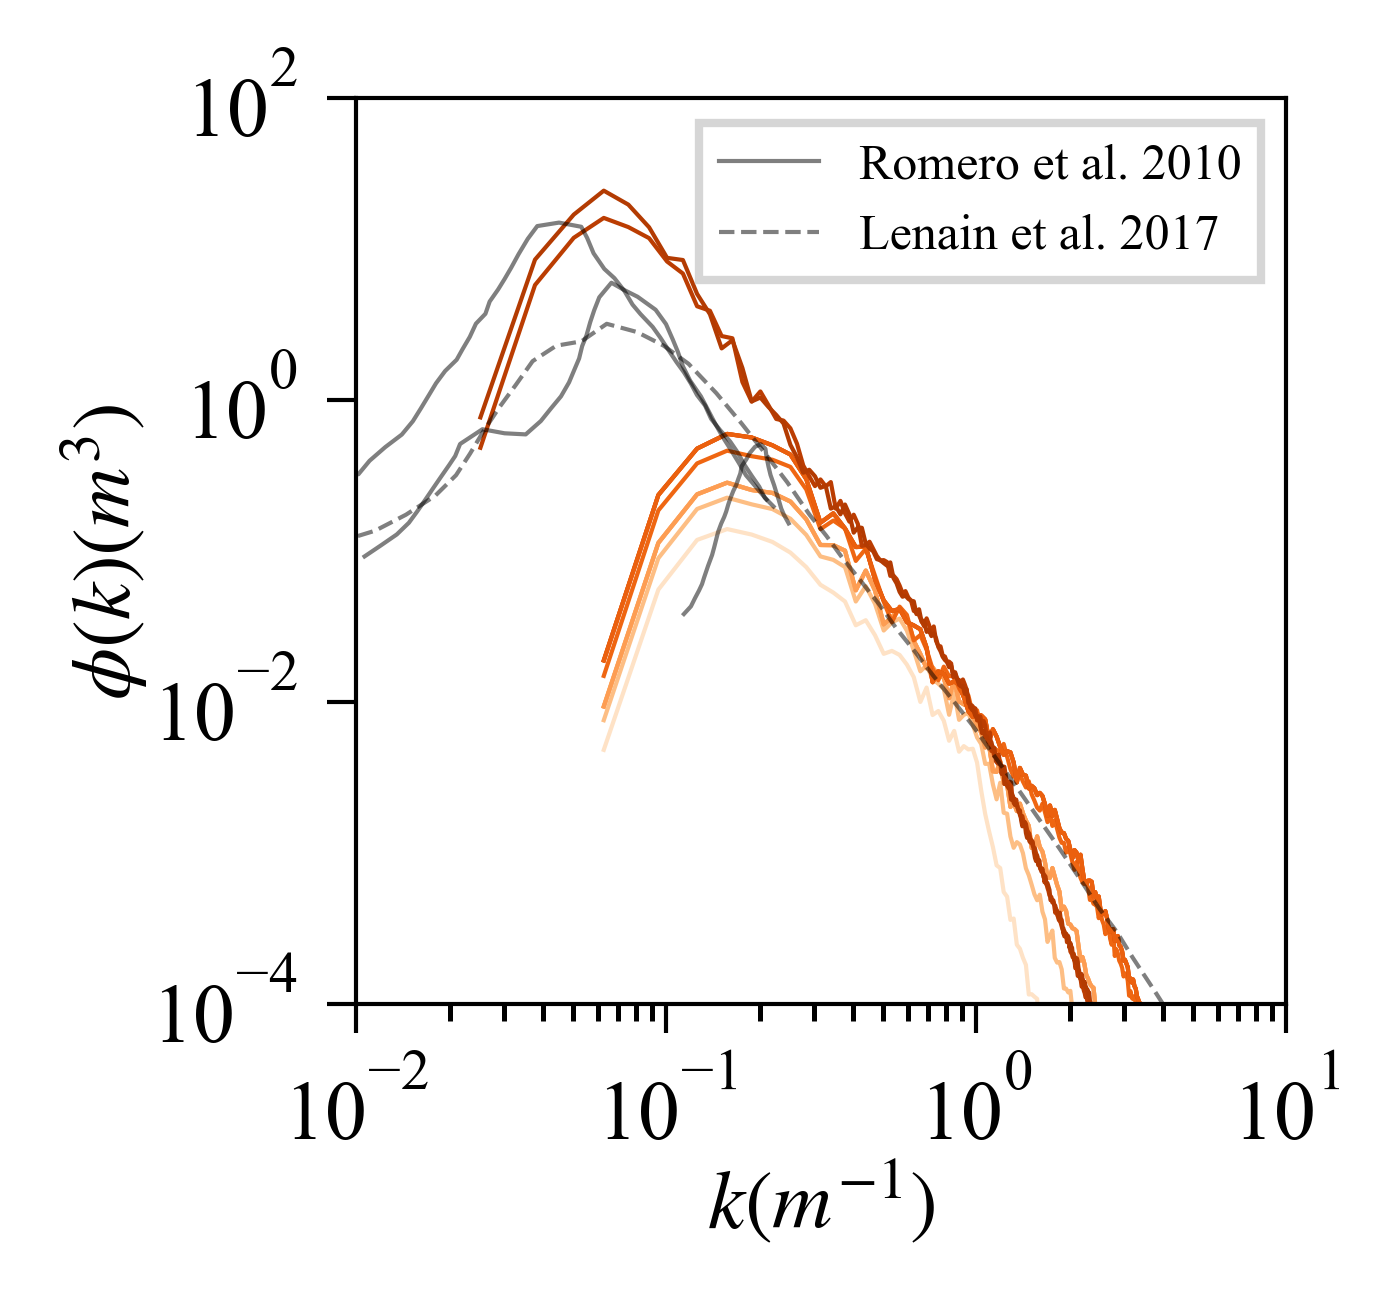

In [56]:
""" Figure: Spectrum """
fig = plt.figure(figsize=[2,2]); ax = plt.gca()
for config in config_set:
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            plt.plot(config.kmod[2:-20], config.Fkmod[2:-20], c=case.cc, lw=0.5)
#     k_equiv = 9.8/((9.8*config.Hskp/config.kp)**0.5*0.3)**2
#     y_ = np.linspace(10**(-6), 10**1, 100)
#     x_ = np.ones(100)*k_equiv
#     plt.plot(x_, y_, '--', c=config.cc, lw=1)

# x_ = np.linspace(0.1, 0.5, 100)
# y_ = x_**(-2.5)*0.1
# plt.plot(x_, y_, c='gray', alpha=0.5, lw=1)
# x_ = np.linspace(0.2, 2, 100)
# y_ = x_**(-3)*0.05
# plt.plot(x_, y_, c='gray', alpha=0.5, lw=1)

# ax.annotate(r'$k^{-2.5}$', xy=(0.4, 0.95), ha='left', va='top', xycoords='axes fraction', c='gray')
# ax.annotate(r'$k^{-3}$', xy=(0.7, 0.58), ha='left', va='top', xycoords='axes fraction', c='gray')

plt.xscale('log'); plt.yscale('log')
plt.xlim([10**-2, 10])
plt.ylim([10**-4, 10**2])
ax.set_xticks([10**(-2), 10**(-1), 1, 10])
plt.xlabel(r'$k(m^{-1})$', labelpad=0); plt.ylabel(r'$\phi(k)(m^3)$', labelpad=0)

Romero2010_spectrum1 = pd.read_csv('data/Romero2010_spectrum_fetch1.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum1.k[25:], Romero2010_spectrum1.phi[25:], c='k', lw=0.5, alpha=0.5)
Romero2010_spectrum2 = pd.read_csv('data/Romero2010_spectrum_fetch2.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum2.k, Romero2010_spectrum2.phi, c='k', lw=0.5, alpha=0.5)
Romero2010_spectrum3 = pd.read_csv('data/Romero2010_spectrum_fetch3.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum3.k, Romero2010_spectrum3.phi, c='k', lw=0.5, alpha=0.5, label='Romero et al. 2010')
Lenain2017_spectrum = pd.read_csv('data/Lenain2017_spectrum.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Lenain2017_spectrum.k, Lenain2017_spectrum.phi, '--', c='k', lw=0.5, alpha=0.5, label='Lenain et al. 2017')

Fan2009_spectrum = pd.read_csv('data/Fan2009_spectrum.txt', names=['f', 'phi_f'], delimiter = ',')



plt.legend(fancybox=False, fontsize=6, loc='upper right')
# Romero2019_spectrum1 = pd.read_csv('data/Romero2019_spectrum1.txt', names=['k', 'phi'], delimiter = ',')
# plt.plot(Romero2019_spectrum1.k, Romero2019_spectrum1.phi, ':', c='k', lw=0.5, alpha=0.5)
# Romero2019_spectrum2 = pd.read_csv('data/Romero2019_spectrum2.txt', names=['k', 'phi'], delimiter = ',')
# plt.plot(Romero2019_spectrum2.k, Romero2019_spectrum2.phi, ':', c='k', lw=0.5, alpha=0.5)

# # fig.savefig('figures_new/spectrum_unit_inset.png', bbox_inches='tight',  pad_inche=-0.2, dpi=2400, transparent=True)
# fig.savefig('figures_new/spectrum_unit_inset.png', bbox_inches='tight',  pad_inche=-0.2, dpi=2400, transparent=True)
# fig.savefig('figures_vector/spectrum_unit_inset.eps', bbox_inches='tight',  pad_inche=0)

In [13]:
""" LEVEL 11, Npower = 5 """
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 11) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            print(case.config.P, case.Hskp)

N=2048, L=200
0.01 0.17339194939190675
N=2048, L=200
0.02 0.23382318246925513


In [ ]:
""" Add the level 9 cases """

In [171]:
""" Add the level 11 cases """
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 11) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35)

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_11_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_11_15_rand2_Htheta0.503/


In [15]:
""" Compute the breaking stats """
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            energy = read(case.path, 'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.time_window(tseries_ensem3, threshold=0, bins=[])

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/


/tmp/ipykernel_164983/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])


1.7949999999999817
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
1.377500000000009
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
3.202500000000009
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N2/
1.725
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N10/
4.180000000000018
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
12.8
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
20.03749999999991
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N2/
13.577499999999963
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N10/
18.484999999999946
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
1578.0
/projects/DEIKE/jiarongw/mu

In [40]:
""" Write to a csv file all the meta data """

file = open("./data/metadata_allcases.csv", "w")

fieldnames = ['L0', 'P', 'Npower', 'rand', 'kp', 'Hskp', 'sigma', 'ustar_inferred']
writer = csv.writer(file)
writer.writerow(fieldnames) 

for config in config_set:
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            case.ustar = ((case.Hskp/config.kp*9.8)**0.5/1.58/config.cp**0.75)**4  # for some old comparison
            print('%.8f' %config.kp)
            writer.writerow(['%g' %config.L0, '%g' %config.P, '%g' %case.Npower, '%g' %case.rand, '%.8f' %config.kp, 
                             '%.8f' %case.Hskp, '%.8f' %case.mu_plateau, '%.8f' %case.ustar])   

0.15707963
0.15707963
0.15707963
0.15707963
0.15707963
0.15707963
0.15707963
0.15707963
0.15707963
0.06283185
0.06283185


In [35]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [160]:
""" Get the colormap value for the matlab plots """
# All the configurations
for i,config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower==5) and (case.rand == 2):
            rgba = case.cc
            print(config.L0, config.P, mpl.colors.rgb2hex(rgba))

200 0.005 #fee2c6
200 0.008 #fdbe84
200 0.01 #fda057
200 0.016 #ef6612
200 0.02 #e4580a
500 0.05 #bb3d02
500 0.07 #b33b02


In [286]:
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1): 
            print(case.path)
            print('Hskp = %g, mu_plateau = %g' %(case.Hskp,case.mu_plateau))

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/
Hskp = 0.121343, mu_plateau = 0.0724179
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
Hskp = 0.154879, mu_plateau = 0.0978039
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
Hskp = 0.173248, mu_plateau = 0.114445
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N2/
Hskp = 0.171978, mu_plateau = 0.107632
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N10/
Hskp = 0.173271, mu_plateau = 0.115812
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
Hskp = 0.213354, mu_plateau = 0.145183
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
Hskp = 0.233104, mu_plateau = 0.153563
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.

0.005 0.07241790396770004
1.67559293752879
0.008 0.09780394040477139
1.5835629183531257
0.01 0.11444484309374552
1.5138103039876294
0.016 0.14518268462297756
1.46955281512449
0.02 0.15356334172452568
1.5179675311293928
0.05 0.1733031533817428
1.6345785092714238
0.07 0.17649649216435953
1.8002654224091432
200
102.4


/tmp/ipykernel_67930/3495356058.py:90: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_nondim/spectrum_nondim.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_67930/3495356058.py:91: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('./figures_nondim/spectrum_nondim.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


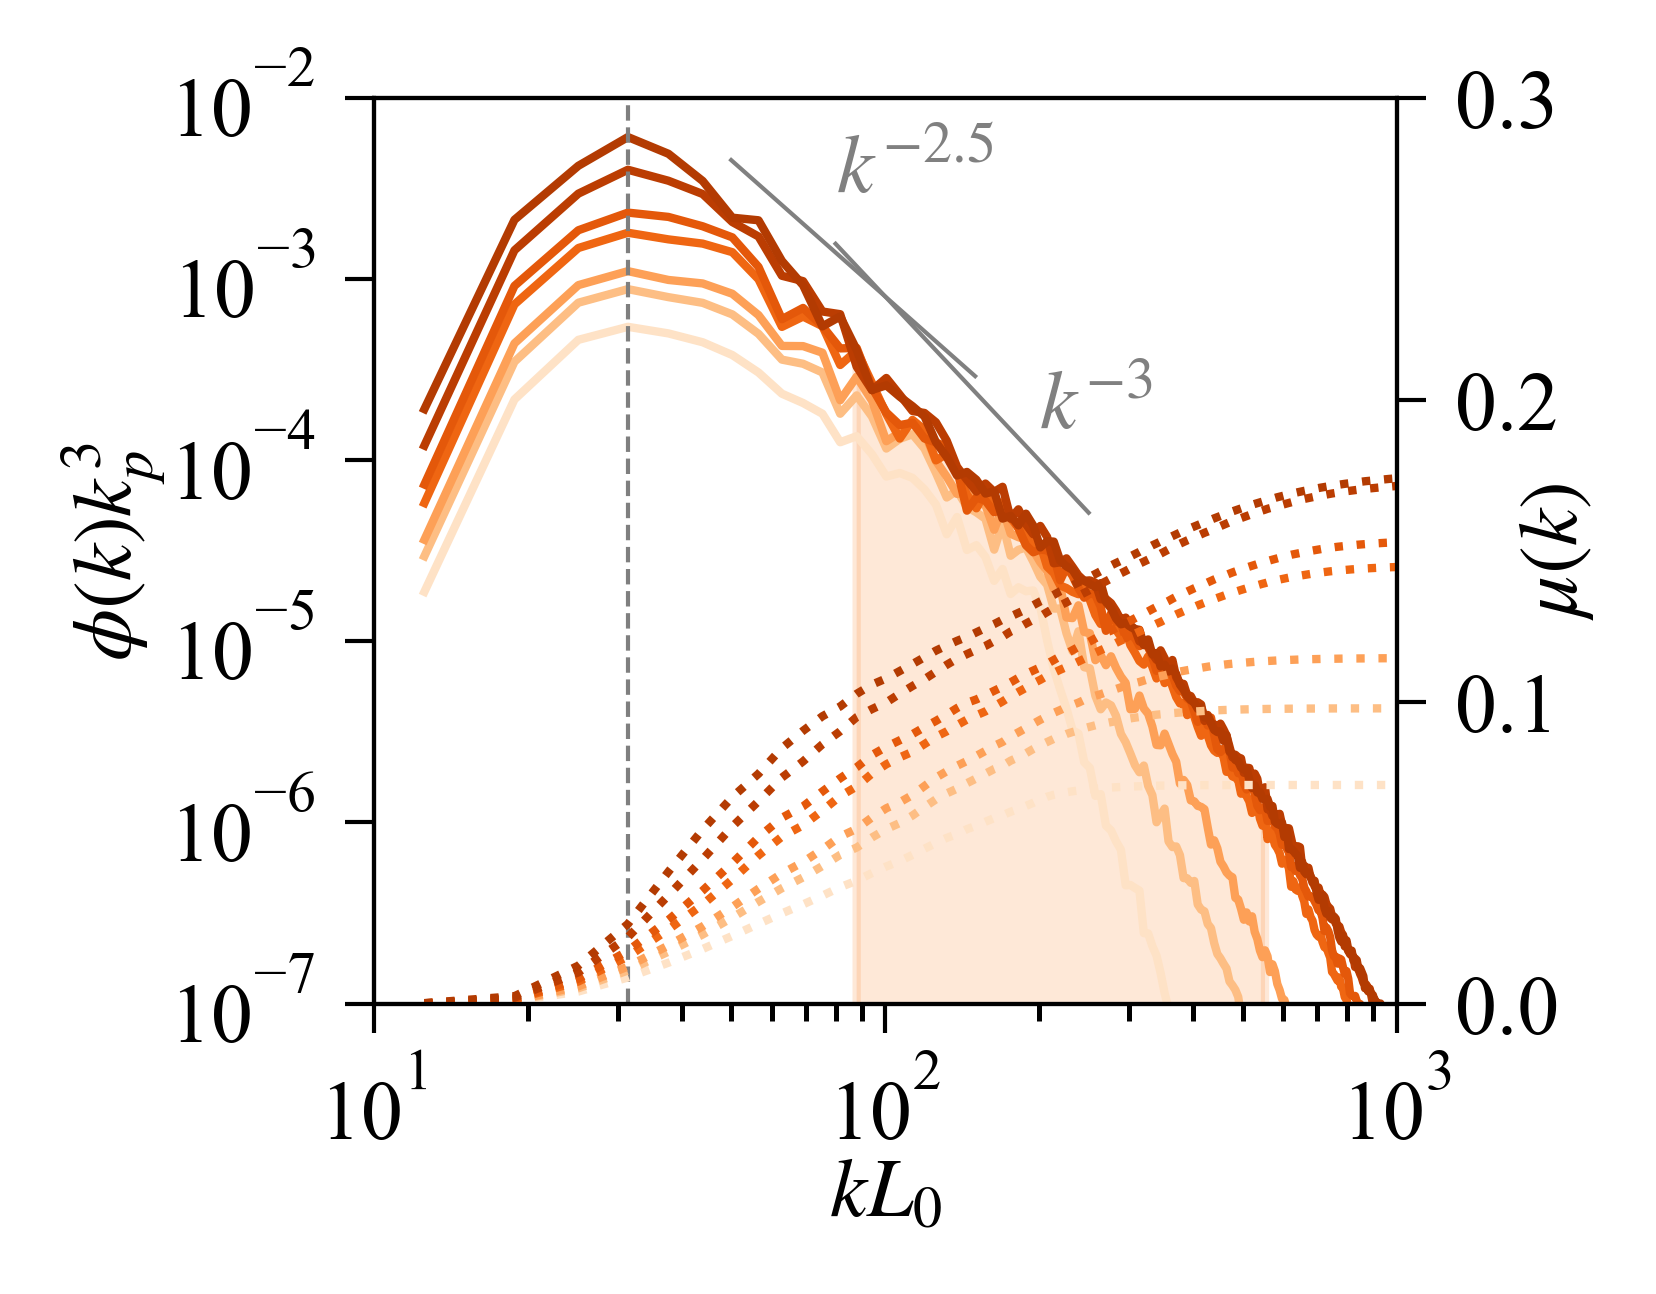

In [57]:
""" FIGURE: 1D spectrum with time """

fig = plt.figure(figsize = [2.2,2]); ax = plt.gca()
ax2 = ax.twinx()

for k, config in enumerate(config_set):
    for (j, case) in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            mu = steepness_trunc (case.Fkmod, case.kmod)
            ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c=case.cc, lw=1)
            """ Add the original spectrum """
#             ax.plot(case.kmod[2:38]*config.L0, config.P*case.kmod[2:38]**(-2.5)*np.exp(-1.25*(config.kp/case.kmod[2:38])**2)*config.kp**3, '--', c=case.cc, lw=0.5)
            ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c=case.cc, lw=1)
            print(config.P, case.mu_plateau)
            print(case.Hskp/case.mu_plateau)

ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray')
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray')

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')
# Limit of resolution
N = 512; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/512*4)
ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.axvline(2*np.pi/(L/5)*L,ls='--',color='C7',lw=0.5)
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])

alpha = 1
config = config2_2
print(config.L0)
print(9.8/(4.375/alpha)**2*config.L0)
ax.fill_between(
        x=config.kmod*config.L0, 
        y1=config.Fkmod*config.kp**3, 
        where= (9.8/(4.875/alpha)**2 < config.kmod)&(config.kmod < 9.8/(1.875/alpha)**2),
        color=plt.get_cmap('Oranges')(0.5), alpha = 0.2)


# """ Inset plot """8
# axin = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
# for config in config_set:
#     axin.plot(config.kmod[2:-20], config.Fkmod[2:-20], c=case.cc, lw=0.5)
# axin.set_xscale('log'); axin.set_yscale('log')
# axin.set_xlim([10**-2, 10])
# axin.set_ylim([10**-4, 10**2])
# axin.set_xticks([10**(-2), 10**(-1), 1, 10])
# axin.set_yticks([10**(-4), 10**(-1), 10**2])
# axin.tick_params(axis='both', which='major', labelsize=6)
# axin.set_xlabel(r'$k(m^{-1})$', labelpad=0, fontsize=6); axin.set_ylabel(r'$\phi(k)(m^3)$', labelpad=0, fontsize=6)

# Romero2010_spectrum1 = pd.read_csv('data/Romero2010_spectrum_fetch1.txt', names=['k', 'phi'], delimiter = ',')
# axin.plot(Romero2010_spectrum1.k[25:], Romero2010_spectrum1.phi[25:], c='gray', lw=0.5)
# Romero2010_spectrum2 = pd.read_csv('data/Romero2010_spectrum_fetch2.txt', names=['k', 'phi'], delimiter = ',')
# axin.plot(Romero2010_spectrum2.k, Romero2010_spectrum2.phi, c='gray', lw=0.5)
# Romero2010_spectrum3 = pd.read_csv('data/Romero2010_spectrum_fetch3.txt', names=['k', 'phi'], delimiter = ',')
# axin.plot(Romero2010_spectrum3.k, Romero2010_spectrum3.phi, c='gray', lw=0.5)
# Lenain2017_spectrum = pd.read_csv('data/Lenain2017_spectrum.txt', names=['k', 'phi'], delimiter = ',')
# axin.plot(Lenain2017_spectrum.k, Lenain2017_spectrum.phi, '--', c='gray', lw=0.5)

# """ Draw the c or k as xaxis """
# def forward(x):
#     return 1/(x/(2*np.pi*5))**0.5
# def back(x):
#     return (1/x)**2*(2*np.pi*5)

# secax_x2 = ax.secondary_xaxis(-0.15, functions=(forward, back))
# secax_x2.set_xticks(np.array([0.01,1]))
# formatter = ticker.FormatStrFormatter('%g')
# Axis.set_major_formatter(secax_x2.xaxis, formatter)

# ax.annotate(r'$c/c_p$', xy=(1.05, -0.15), ha='left', va='top', xycoords='axes fraction')
# ax.annotate(r'$kL_0$', xy=(1.05, -0.05), ha='left', va='top', xycoords='axes fraction')

# fig.savefig('figures_new/spectrum_nondim_withinset.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_vector/spectrum_nondim_withinset.eps', bbox_inches='tight', pad_inche=0.)

fig.savefig('./figures_nondim/spectrum_nondim.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('./figures_nondim/spectrum_nondim.eps', bbox_inches='tight', pad_inche=0.)

In [ ]:
""" Figure: Spectrum """
fig = plt.figure(figsize=[1,1]); ax = plt.gca()
for config in config_set:
    plt.plot(config.kmod[2:-20], config.Fkmod[2:-20], c=config.cases[0].cc, lw=1)
#     k_equiv = 9.8/((9.8*config.Hskp/config.kp)**0.5*0.3)**2
#     y_ = np.linspace(10**(-6), 10**1, 100)
#     x_ = np.ones(100)*k_equiv
#     plt.plot(x_, y_, '--', c=config.cc, lw=1)

# x_ = np.linspace(0.1, 0.5, 100)
# y_ = x_**(-2.5)*0.1
# plt.plot(x_, y_, c='gray', alpha=0.5, lw=1)
# x_ = np.linspace(0.2, 2, 100)
# y_ = x_**(-3)*0.05
# plt.plot(x_, y_, c='gray', alpha=0.5, lw=1)

# ax.annotate(r'$k^{-2.5}$', xy=(0.4, 0.95), ha='left', va='top', xycoords='axes fraction', c='gray')
# ax.annotate(r'$k^{-3}$', xy=(0.7, 0.58), ha='left', va='top', xycoords='axes fraction', c='gray')

plt.xscale('log'); plt.yscale('log')
plt.xlim([10**-2, 10])
plt.ylim([10**-4, 10**2])
ax.set_xticks([10**(-2), 10**(-1), 1, 10])
plt.xlabel(r'$k(m^{-1})$', labelpad=0); plt.ylabel(r'$\phi(k)(m^3)$', labelpad=0)

Romero2010_spectrum1 = pd.read_csv('data/Romero2010_spectrum_fetch1.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum1.k[25:], Romero2010_spectrum1.phi[25:], c='k', lw=0.5, alpha=0.5)
Romero2010_spectrum2 = pd.read_csv('data/Romero2010_spectrum_fetch2.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum2.k, Romero2010_spectrum2.phi, c='k', lw=0.5, alpha=0.5)
Romero2010_spectrum3 = pd.read_csv('data/Romero2010_spectrum_fetch3.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Romero2010_spectrum3.k, Romero2010_spectrum3.phi, c='k', lw=0.5, alpha=0.5)
Lenain2017_spectrum = pd.read_csv('data/Lenain2017_spectrum.txt', names=['k', 'phi'], delimiter = ',')
plt.plot(Lenain2017_spectrum.k, Lenain2017_spectrum.phi, '--', c='k', lw=0.5, alpha=0.5)
# Romero2019_spectrum1 = pd.read_csv('data/Romero2019_spectrum1.txt', names=['k', 'phi'], delimiter = ',')
# plt.plot(Romero2019_spectrum1.k, Romero2019_spectrum1.phi, ':', c='k', lw=0.5, alpha=0.5)
# Romero2019_spectrum2 = pd.read_csv('data/Romero2019_spectrum2.txt', names=['k', 'phi'], delimiter = ',')
# plt.plot(Romero2019_spectrum2.k, Romero2019_spectrum2.phi, ':', c='k', lw=0.5, alpha=0.5)

# fig.savefig('figures_new/spectrum_unit_inset.png', bbox_inches='tight',  pad_inche=-0.2, dpi=2400, transparent=True)
# fig.savefig('figures_new/spectrum_unit_inset.png', bbox_inches='tight',  pad_inche=-0.2, dpi=2400, transparent=True)
# fig.savefig('figures_vector/spectrum_unit_inset.eps', bbox_inches='tight',  pad_inche=0)

/tmp/ipykernel_67930/3662293614.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/correlation.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_67930/3662293614.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/correlation.pdf', bbox_inches='tight', pad_inche=0.)


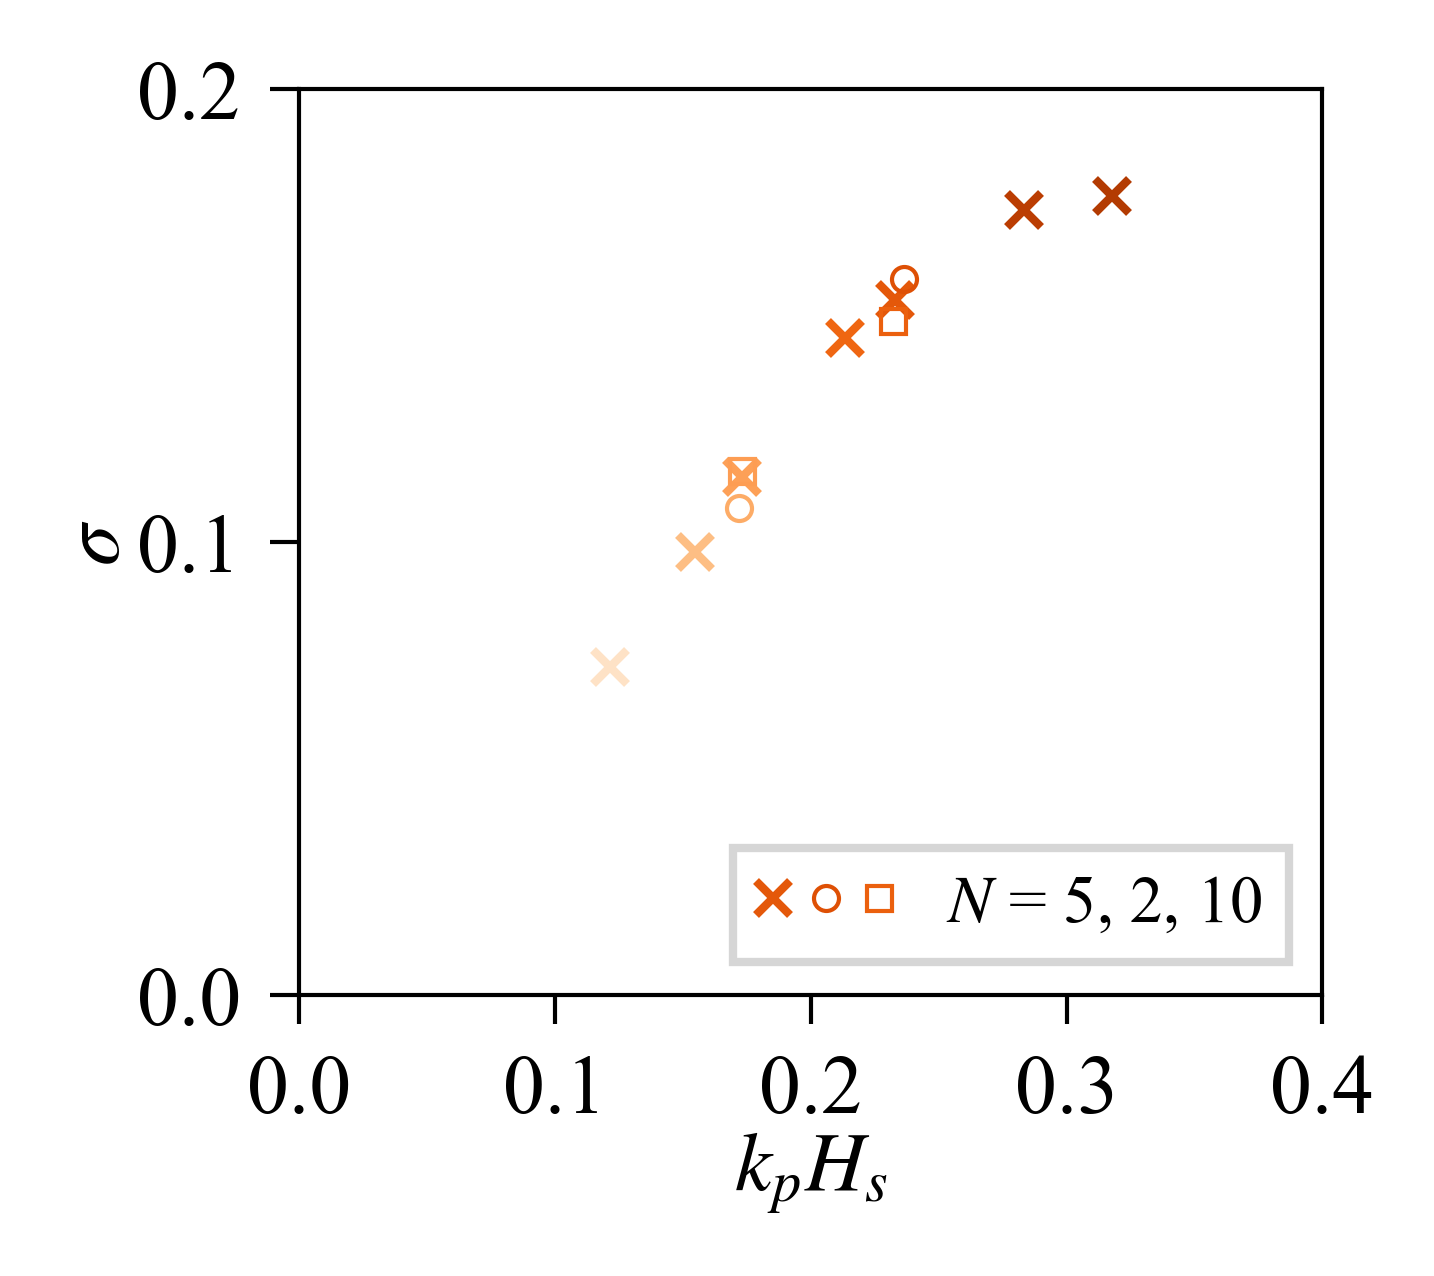

In [58]:
""" Is Hskp and MSS correlated? """
from matplotlib.legend_handler import HandlerTuple
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

""" Sieve out the different slope limiter cases """
for config in (config_set):
    for case in config.cases:
        case.SLOPE = True
            
config2_3.cases[2].SLOPE = False # different slope limiter

for (i,config) in enumerate(config_set):
    if i == 4:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 2) and (case.rand != 0) and (case.rand != 1):
                d2, = plt.plot(case.Hskp, case.mu_plateau, 'o', c=case.cc, markersize=3, markerfacecolor='None', markeredgewidth=0.5, label = r'$N=2$')
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
#             if (case.NL == 15) and (case.LEVEL == 9) and (case.SLOPE) and (case.rand != 0) and (case.rand != 1):
                d1, = plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=4,  markeredgewidth=1, label = r'$N=5$')
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 10) and (case.rand != 0) and (case.rand != 1):
                d3, = plt.plot(case.Hskp, case.mu_plateau, 's', c=case.cc, markersize=3, markerfacecolor='None', markeredgewidth=0.5, label = r'$N=10$')
    else:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
                plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=4,  markeredgewidth=1)
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 2) and (case.rand != 0) and (case.rand != 1):
                plt.plot(case.Hskp, case.mu_plateau, 'o', c=case.cc, markersize=3, markerfacecolor='None', markeredgewidth=0.5)
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 10) and (case.rand != 0) and (case.rand != 1):
                plt.plot(case.Hskp, case.mu_plateau, 's', c=case.cc, markersize=3, markerfacecolor='None', markeredgewidth=0.5)
                
plt.xlim([0.,0.4]); plt.xticks(np.array([0, 0.1,0.2,0.3,0.4]))
plt.ylim([0.,0.2]); plt.yticks(np.array([0., 0.1, 0.2]))
plt.xlabel(r'$k_pH_s$', labelpad=0); plt.ylabel(r'$\sigma$', labelpad=0)
legend = plt.legend([(d1,d2,d3)], [r'$N$ = 5, 2, 10'], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower right', fancybox=False, fontsize=8, handlelength=2)

fig.savefig('figures_nondim/correlation.eps', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/correlation.pdf', bbox_inches='tight', pad_inche=0.)

In [25]:
""" An inset figure to show the log - log unscaled distribution, and the effect of extra filtering """
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

def lambdac_inset (ax):

    for k, config in enumerate(config_set):
        print('P=%g' %config.P)
        for j,case in enumerate(config.cases):       
            normx = 1
            normy = 1
            if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1) and (j == 0):
                print(case.path)
                bins = case.hist_ensem['bins']
                bins_plotting = bins[1:] - (bins[2] - bins[1])/2
                for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                    if case.Htheta == 0.503:
                        ax.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=r'$\sigma=%.3f$' %(case.mu_plateau), c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 
                        """ A different method to keep small breakers """
                        bins = case.hist_ensem['bins']
                        # Compute the stats with another method that includes the smaller breakers
#                         case.hist_extra = case.simple_mapping(case.hist_ensem['tseries_ensem'][0], bins=bins, method=0, threshold=-3*case.config.kp, EXTRA_FILTER=False) 
#                         ax.plot(bins_plotting/normx, case.hist_extra/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=case.cc, linestyle='--', alpha=1, lw=0.5)

    """ Not normalized, either linear or log scale """
    ax.set_xscale('log'); ax.set_yscale('log')

    x_ = np.linspace(4, 8, 100)
    y_ = x_**(-6)*30
    ax.plot(x_, y_, c='gray', lw=0.5)
    ax.annotate(r'$ c^{-6}$', xy=(0.7, 0.92), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=8)

    """ Log lim """
    ax.set_xlim([0,20])
    ax.set_ylim([10**(-6),10**(-2)])
    ax.set_xticks(np.array([0.3,1,10,20]))

    formatter = ticker.FormatStrFormatter('?%1.2f')
    formatter = ticker.FormatStrFormatter('%g')
    Axis.set_major_formatter(ax.xaxis, formatter)

    ax.set_xlabel(r'$c(ms^{-1})$', labelpad=0, fontsize=8); 
    ax.set_ylabel(r'$\Lambda(c)(m^{-2}s)$', labelpad=0, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

In [ ]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

zeroth_ensem = []
first_ensem = []

for k, config in enumerate(config_set):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1) and (j == 0):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))

""" Linear lim """
plt.xlim([0,2])
plt.ylim([0,2.5*10**(-1)]) # Linear
# plt.xticks(np.array([0,2,4,6,8,10,12])) # Linear x
# plt.yticks(np.array([0,0.5e-3,1e-3,1.5e-3,2e-3,2.5e-3])) # Linear y
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # linear

formatter = ticker.FormatStrFormatter('?%1.2f')
formatter = ticker.FormatStrFormatter('%g')
Axis.set_major_formatter(ax.xaxis, formatter)

plt.xlabel(r'$c(ms^{-1})$', labelpad=0); 
plt.ylabel(r'$\Lambda(c)(m^{-2}s)$', labelpad=0)

# # Maybe add the inset
# config = config2_4
# case = config.cases[0]
# bins = case.hist_ensem['bins']
# bins_plotting = bins[1:] - (bins[2] - bins[1])/2
# hist = case.hist_ensem['hist_ensem'][0]
# idx1 = (np.abs(hist - hist.max())).argmin()
# print(bins_plotting[idx1])
# idx2 = (np.abs(hist - hist.max()/10)).argmin()
# print(bins_plotting[idx2])
# plt.fill_between(
#         x=bins_plotting,
#         y1=hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1]), 
#         where=(bins_plotting > 2.5)&(bins_plotting < bins_plotting[idx2]),
#         color=plt.get_cmap('Oranges')(0.5), alpha=0.2)
# config = config3_2
# case = config.cases[0]
# bins = case.hist_ensem['bins']
# bins_plotting = bins[1:] - (bins[2] - bins[1])/2
# hist = case.hist_ensem['hist_ensem'][0]
# idx1 = (np.abs(hist - hist.max())).argmin()
# print(bins_plotting[idx1])
# idx2 = (np.abs(hist - hist.max()/10)).argmin()
# print(bins_plotting[idx2])
# plt.fill_between(
#         x=bins_plotting,
#         y1=hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1]), 
#         where= (bins_plotting > 4)&(bins_plotting < bins_plotting[idx2]),
#         color=plt.get_cmap('Greens')(0.5), alpha=0.2)

# axin = ax.inset_axes([0.50, 0.48, 0.45, 0.45])
# lambdac_inset (axin)


# plot_inset(axin)
# axin.tick_params(axis='both', which='major', labelsize=6)
# axin.minorticks_off()

# left, bottom, width, height = [0.37, 0.34, 0.55, 0.55]
# ax2 = fig.add_axes([left, bottom, width, height])
# import matplotlib.image as mpimg
# image = mpimg.imread('figures_new/spectrum_inset.png')
# ax2.imshow(image)
# ax2.axis('off')

# fig.savefig('figures_new/lambda_c_unit_linear_inset.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_vector/lambda_c_unit_linear_inset.eps', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_new/lambda_c_unit_log_small.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_vector/lambda_c_unit_log_small.eps', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/lambda_c_unit_linear_inset.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/lambda_c_unit_linear_inset.eps', bbox_inches='tight', pad_inche=0.)

P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07
1.625
4.875


/tmp/ipykernel_67930/3345318452.py:102: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/lambda_c_log_Npower.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_67930/3345318452.py:103: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/lambda_c_log_Npower.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


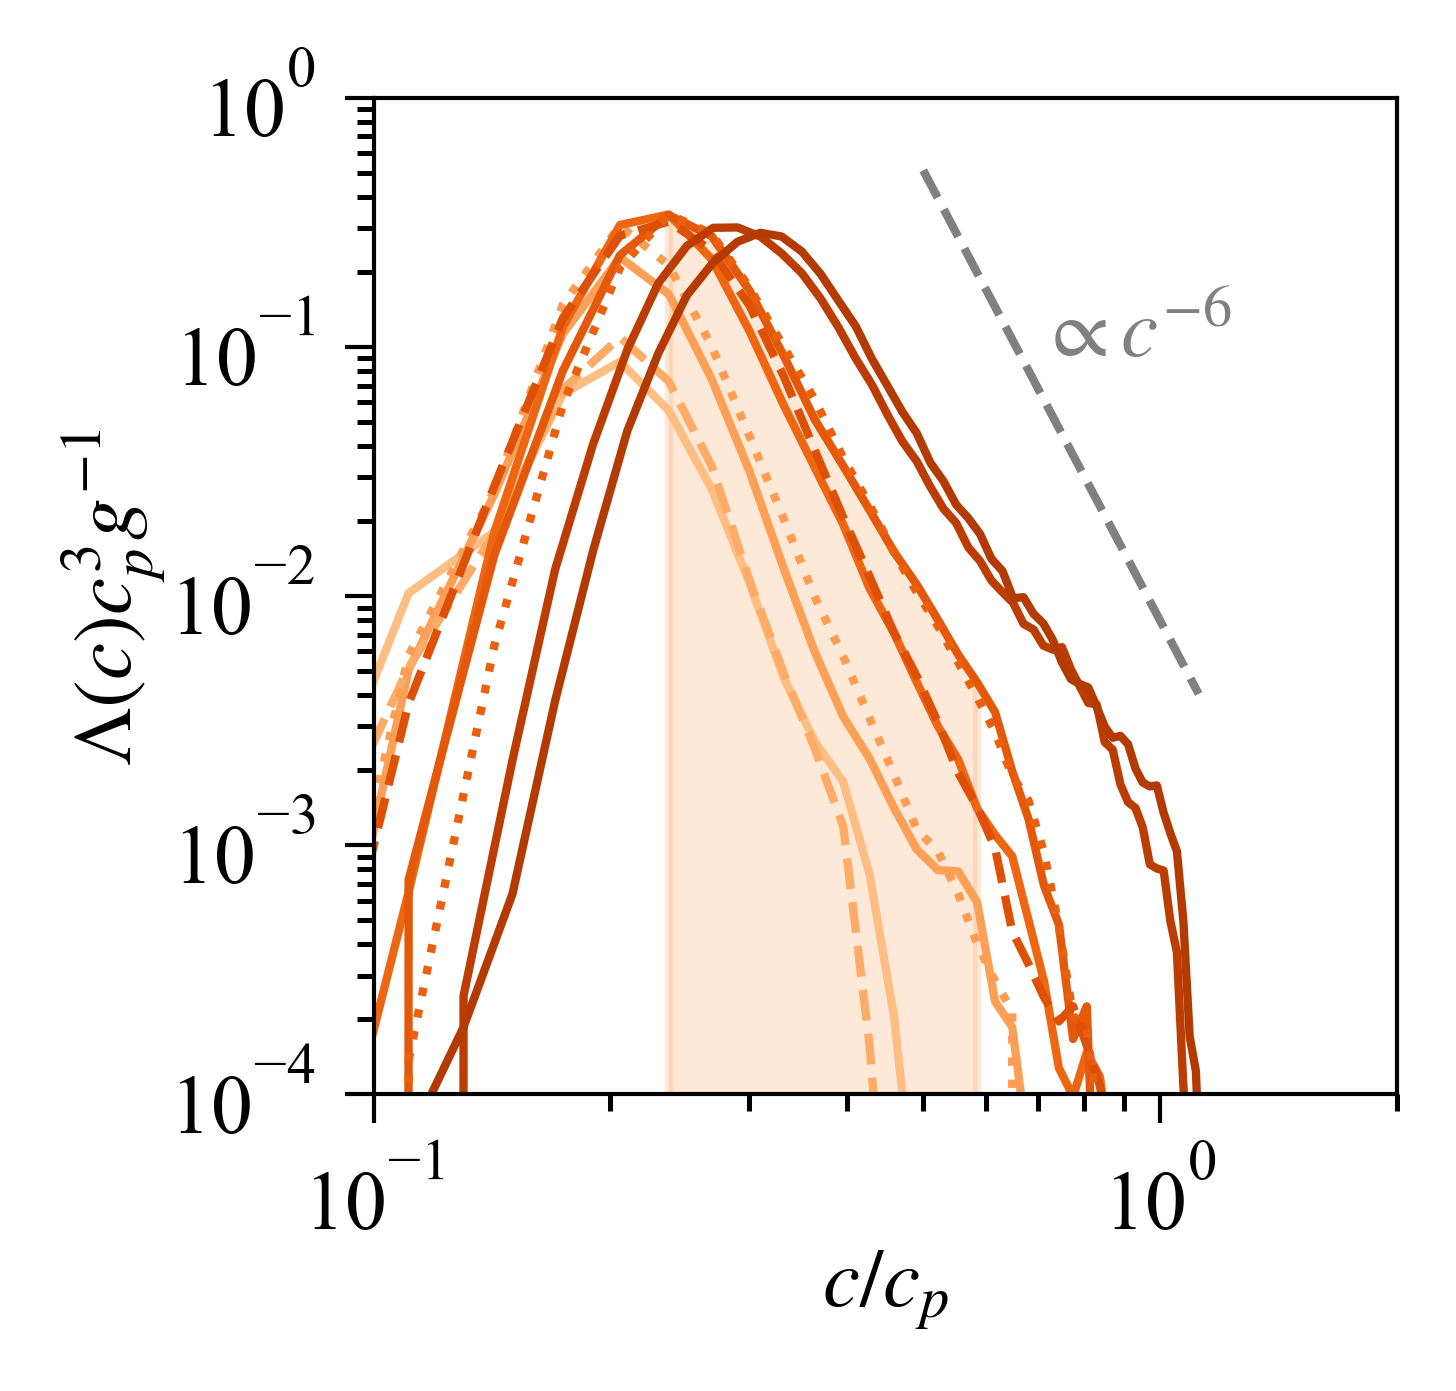

In [59]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

zeroth_ensem = []
first_ensem = []

for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = (9.8/config.kp)**0.5 
#         normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5 # Old normalization that is based on P value
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
#         normx = (9.8*case.Hskp/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8) * case.Hskp ** 0.25
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))
                    
                # Writing to a file
                config.cp = (9.8/config.kp)**0.5
    #             config.ustar = ((case.Hskp/config.kp*9.8)**0.5/config.cp**0.75)**4
                case.ustar = ((case.Hskp/config.kp*9.8)**0.5/1.58/config.cp**0.75)**4
                file = open("./data/Update_Lambda(c)_kp%.3f_P%g_Hs%.3f_ustar%.3f.csv" %(config.kp, config.P, case.Hskp/config.kp, case.ustar), "w")
                fieldnames = ['c (ms-1)', 'Lambda(c) (m-2s)', 'hat1{c}', 'hat1{Lambda(c)}', 'hat2{Lambda(c)}']
                writer = csv.writer(file)
                writer.writerow(fieldnames) 
                normx = (9.8*case.Hskp/config.kp)**0.5
    #             normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5   
                normy1 = (9.8*case.Hskp/config.kp)**(14/6)/9.8/case.ustar**(5/3) 
                normy2 = (config.cp)**(3.5)/9.8/case.ustar**(1/2) 
                bins_lambda_c = case.hist_ensem['hist_ensem'][0]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
                for c, lambda_c in zip(bins_plotting, bins_lambda_c):
                    writer.writerow(['{:4f}'.format(c), '{:7f}'.format(lambda_c), '{:4f}'.format(c/normx), '{:7f}'.format(lambda_c*normy1), '{:7f}'.format(lambda_c*normy2)])     
                file.close()  
                
        if (case.NL == 15) and (case.Npower == 2) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='--', alpha=1, lw=1)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))
        if (case.NL == 15) and (case.Npower == 10) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle=':', alpha=1, lw=1)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))
                    
#         if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             bins = case.hist_ensem['bins']
#             bins_plotting = bins[1:] - (bins[2] - bins[1])/2
#             for i,hist in enumerate(case.hist_ensem['hist_ensem']):
#                 if case.Htheta == 0.503:
#                     plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='.-', alpha=1, lw=1)            # The extra filter 
                    


# Maybe add the inset
config = config2_2
case = config.cases[3]
bins = case.hist_ensem['bins']
bins_plotting = bins[1:] - (bins[2] - bins[1])/2
hist = case.hist_ensem['hist_ensem'][0]
idx1 = (np.abs(hist - hist.max())).argmin()
print(bins_plotting[idx1-1])
idx2 = (np.abs(hist - hist.max()/100)).argmin()
print(bins_plotting[idx2])
plt.fill_between(
        x=bins_plotting/(9.8/config.kp)**0.5,
        y1=hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])*((9.8/config.kp)**1.5/9.8), 
        where=(bins_plotting > bins_plotting[idx1-1])&(bins_plotting < bins_plotting[idx2]),
        color=plt.get_cmap('Oranges')(0.5), alpha=0.2)

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(0.5, 1.12, 100)
y_ = x_**(-6)*0.008
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto c^{-6}$', xy=(0.65, 0.8), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

fig.savefig('figures_nondim/lambda_c_log_Npower.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/lambda_c_log_Npower.eps', bbox_inches='tight', pad_inche=0.)

In [17]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
            case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.15)

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N2/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503_N10/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N2/
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N10/
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta

P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07


Text(0.5, 1.15, '$\\sigma$')

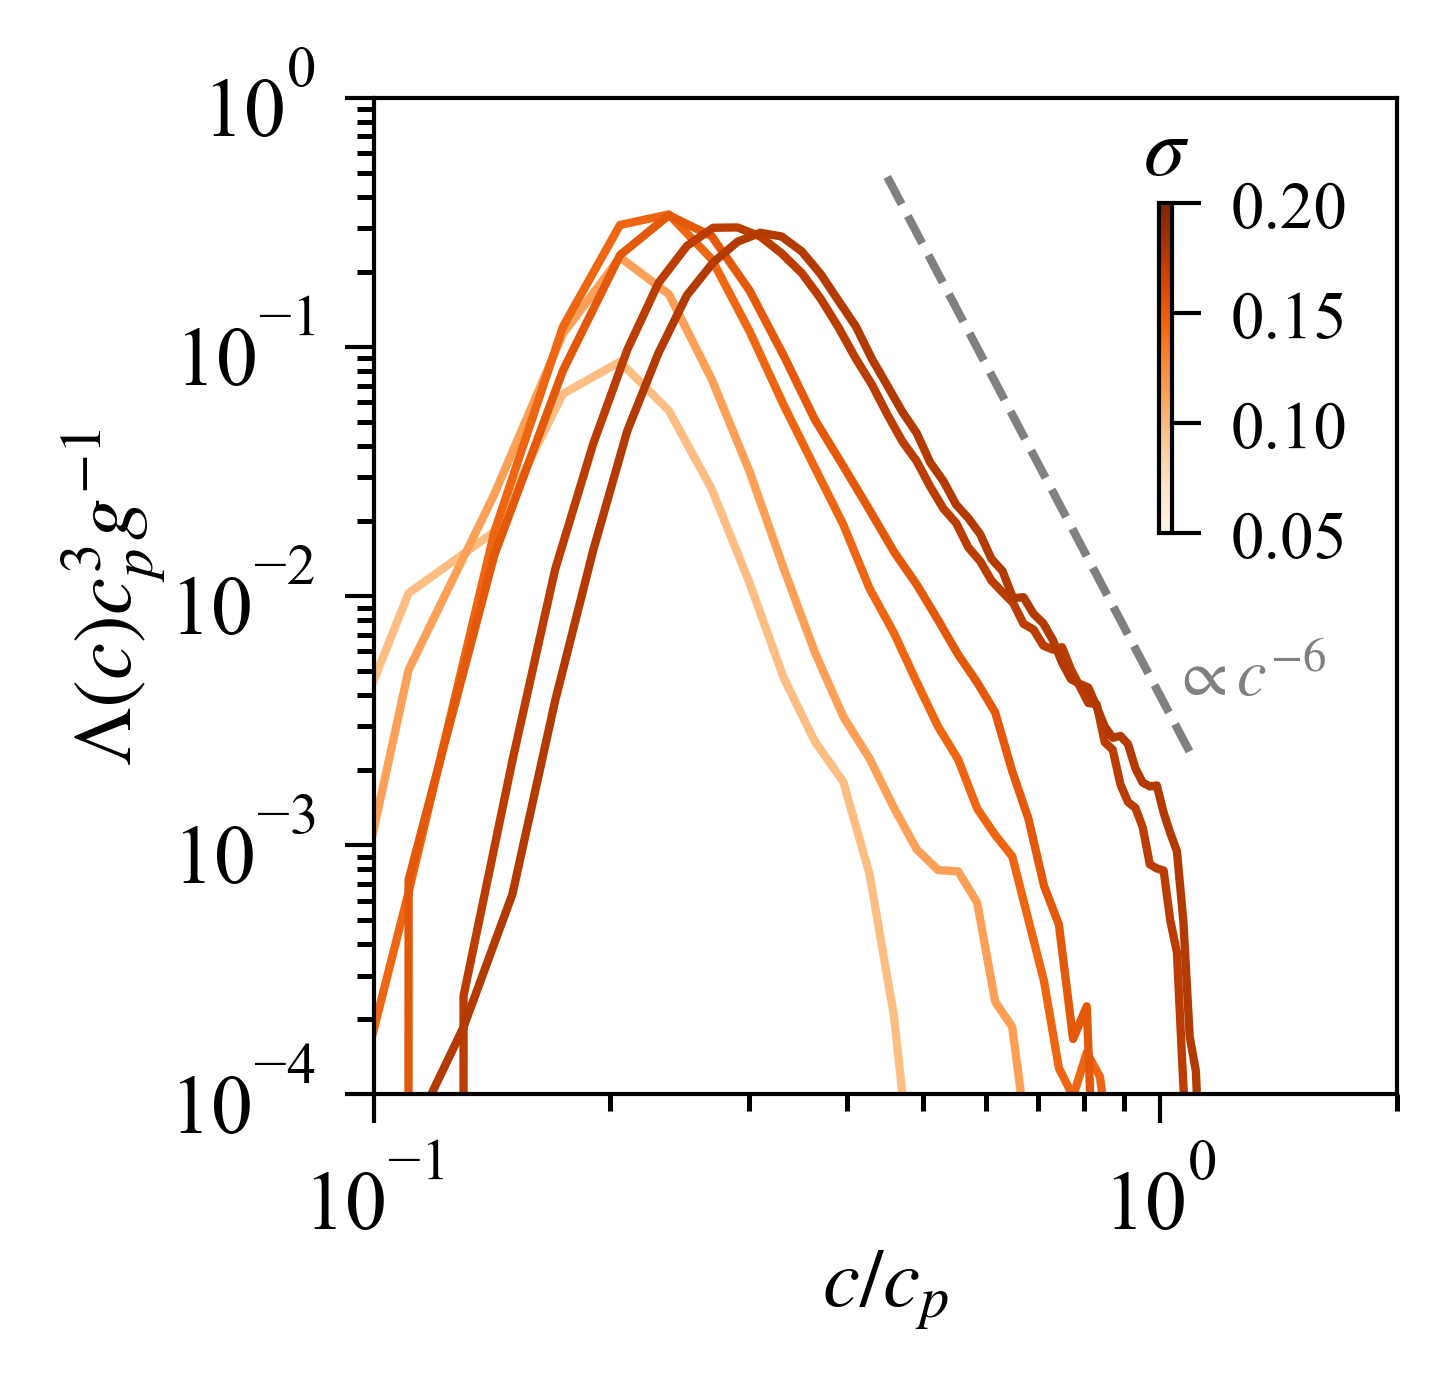

In [83]:
""" For a talk """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = (9.8/config.kp)**0.5 
#         normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5 # Old normalization that is based on P value
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
#         normx = (9.8*case.Hskp/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8) * case.Hskp ** 0.25
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 
# config = config2_2
# print('P=%g' %config.P)
# for j,case in enumerate(config.cases):
#     normx = (9.8/config.kp)**0.5
#     normy = 1/((9.8/config.kp)**1.5/9.8)
#     if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#         bins = case.hist_ensem['bins']
#         bins_plotting = bins[1:] - (bins[2] - bins[1])/2
#         for i,hist in enumerate(case.hist_ensem['hist_ensem']):
#             if case.Htheta == 0.503:
#                 plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 

# Maybe add the shading
# config = config2_2
# case = config.cases[3]
# bins = case.hist_ensem['bins']
# bins_plotting = bins[1:] - (bins[2] - bins[1])/2
# hist = case.hist_ensem['hist_ensem'][0]
# idx1 = (np.abs(hist - hist.max())).argmin()
# print(bins_plotting[idx1-1])
# idx2 = (np.abs(hist - hist.max()/100)).argmin()
# print(bins_plotting[idx2])
# plt.fill_between(
#         x=bins_plotting/(9.8/config.kp)**0.5,
#         y1=hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])*((9.8/config.kp)**1.5/9.8), 
#         where=(bins_plotting > bins_plotting[idx1-1])&(bins_plotting < bins_plotting[idx2]),
#         color=plt.get_cmap('Oranges')(0.5), alpha=0.2)

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)

""" Normalized """
x_ = np.linspace(0.45, 1.1, 100)
y_ = x_**(-6)*0.004
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto c^{-6}$', xy=(0.78, 0.45), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=8)

ax2  = fig.add_axes([0.72,0.55,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

0.02 0.15356334172452568
1.5179675311293928
200
102.4


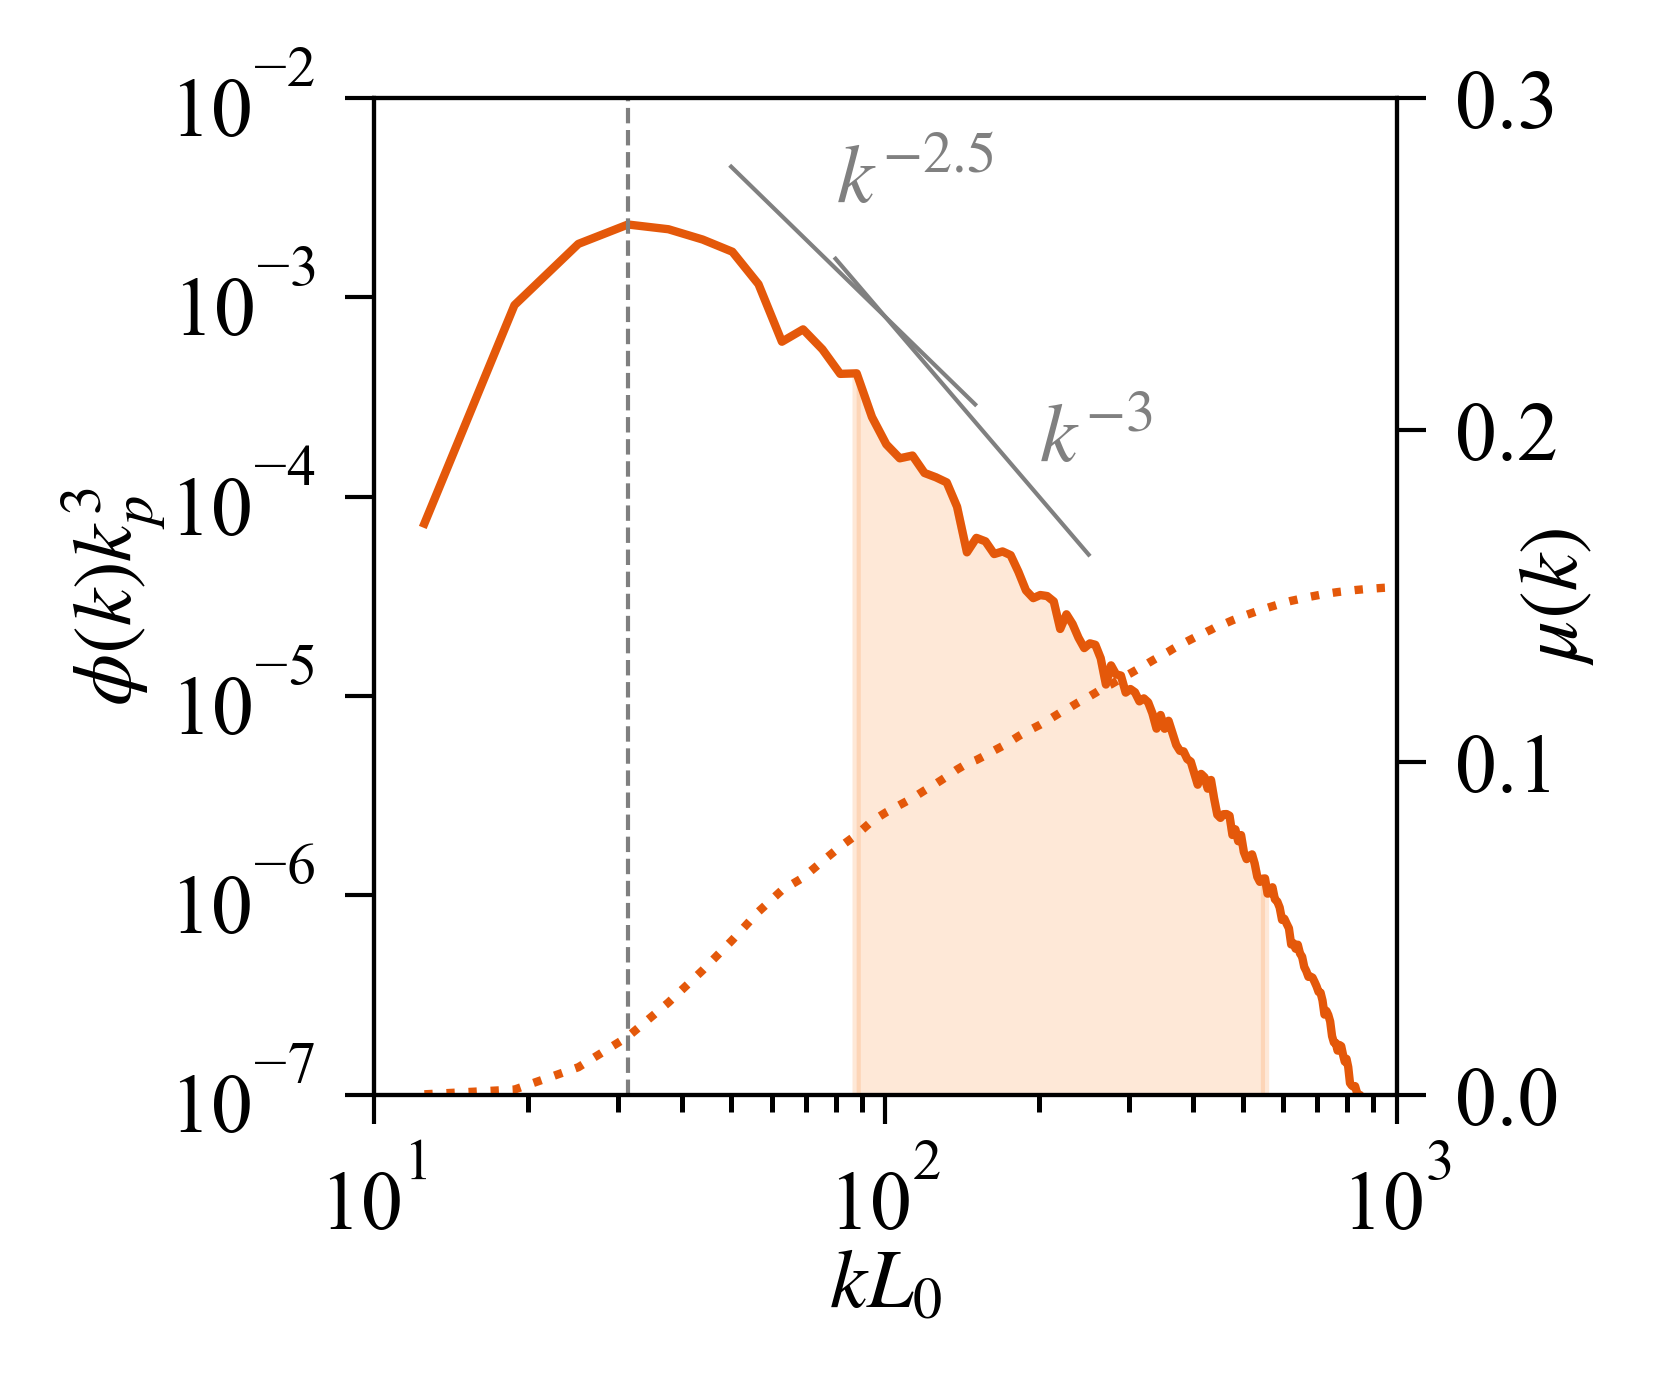

In [89]:
""" For a talk """

fig = plt.figure(figsize = [2.2,2.2]); ax = plt.gca()
ax2 = ax.twinx()

# for k, config in enumerate(config_set):
config = config2_2
for (j, case) in enumerate(config.cases):
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        mu = steepness_trunc (case.Fkmod, case.kmod)
        ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c=case.cc, lw=1)
        """ Add the original spectrum """
#             ax.plot(case.kmod[2:38]*config.L0, config.P*case.kmod[2:38]**(-2.5)*np.exp(-1.25*(config.kp/case.kmod[2:38])**2)*config.kp**3, '--', c=case.cc, lw=0.5)
        ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c=case.cc, lw=1)
        print(config.P, case.mu_plateau)
        print(case.Hskp/case.mu_plateau)

ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray')
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray')

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')
# Limit of resolution
N = 512; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/512*4)
ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.axvline(2*np.pi/(L/5)*L,ls='--',color='C7',lw=0.5)
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])

alpha = 1
config = config2_2
print(config.L0)
print(9.8/(4.375/alpha)**2*config.L0)
ax.fill_between(
        x=config.kmod*config.L0, 
        y1=config.Fkmod*config.kp**3, 
        where= (9.8/(4.875/alpha)**2 < config.kmod)&(config.kmod < 9.8/(1.875/alpha)**2),
        color=plt.get_cmap('Oranges')(0.5), alpha = 0.2)


In [128]:
def steepness_trunc_non_uniform (F,k):
    mu = np.zeros(len(k))
    Hs = np.zeros(len(k))
    dk = np.roll(k, -1) - k
    dk = np.array(dk); dk[-1]=0
    for i,k_ in enumerate(k):
        mu[i] = np.sum(k[:i]**2*F[:i]*dk[:i])**0.5
        Hs[i] = 4*np.sum(F[:i]*dk[:i])**0.5
    return mu, Hs

Text(0, 0.5, '$\\phi(k)(m^3)$')

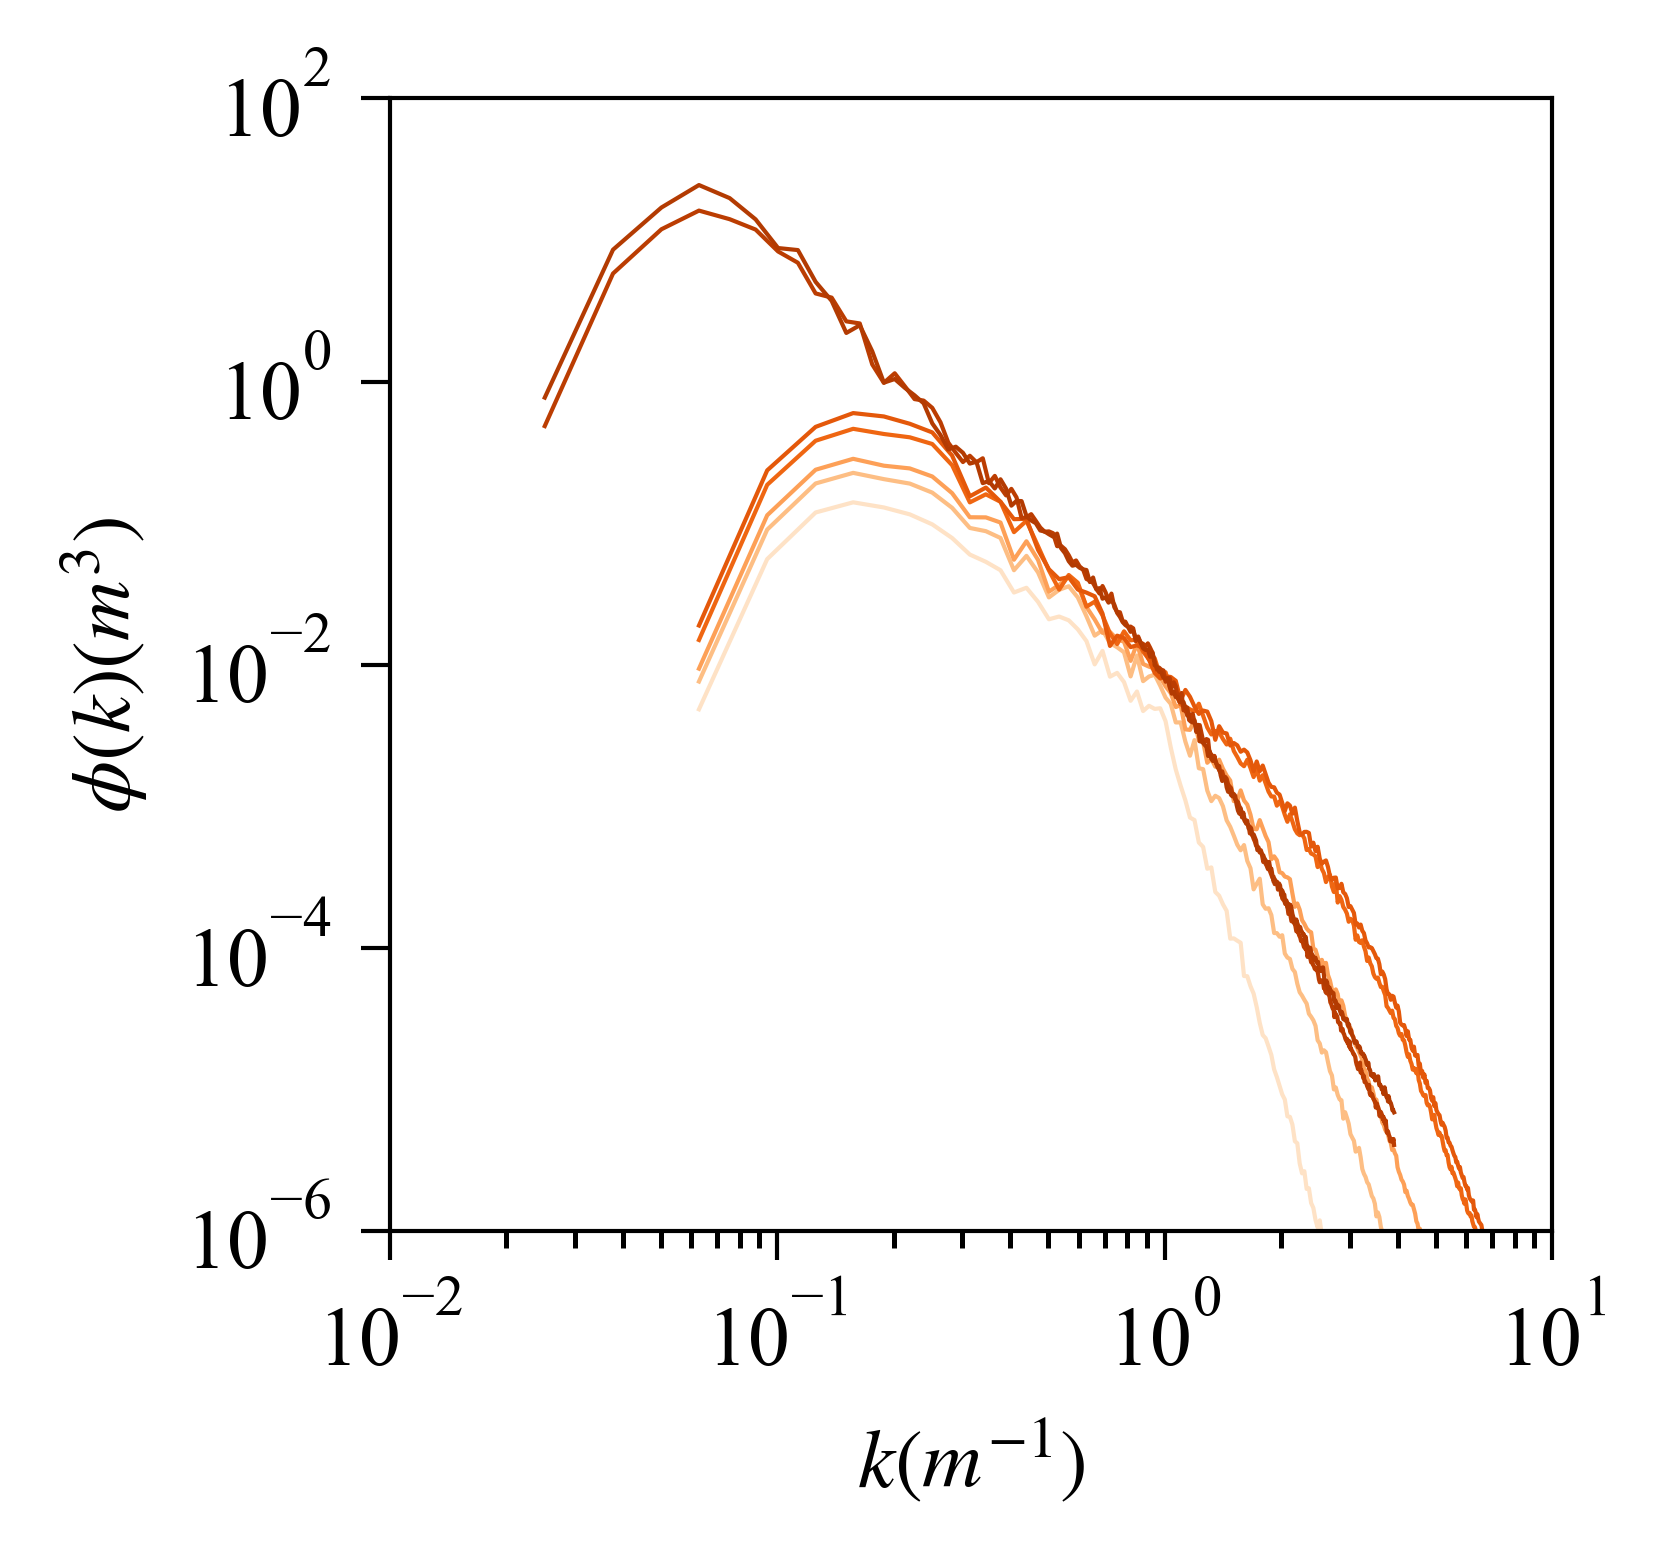

In [141]:
fig = plt.figure(figsize = [2.5,2.5]); ax = plt.gca()
# ax2 = ax.twinx()

# s10_ensem = []
# for i in range (0,39):
#     s10_spec = pd.read_csv('data/s10_39/spec_%g.txt' %(i+1), delimiter = ',')
#     s10_Lc = pd.read_csv('data/s10_39/lambda_%g.txt' %(i+1), delimiter = ',')
#     mu, Hs = steepness_trunc_non_uniform (s10_spec.Eom, s10_spec.k)
#     ax.plot(s10_spec.k[1:], s10_spec.Eom[1:], c='k', alpha=0.5, lw=0.5)
#     ax2.plot(s10_spec.k[1:], mu[1:], '--',  c='k', alpha=0.5, lw=0.5)
#     indices = [idx for idx,val in enumerate(s10_spec.k) if val < 5]
#     data = {"sigma_trunc": mu[indices[-1]], "k": s10_spec.k, "phi": s10_spec.Eom, "c": s10_Lc.c, "L": s10_Lc.Lambda}
#     s10_ensem.append(data)
    

for k, config in enumerate(config_set):
    for (j, case) in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            mu = steepness_trunc (case.Fkmod, case.kmod)
            ax.plot(case.kmod[2:-200], case.Fkmod[2:-200], c=case.cc, lw=0.5)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.01,10]) 
ax.set_ylim([10**(-6.),10**(2.)])
# ax2.set_ylim([0,0.25])
ax.set_xlabel(r'$k(m^{-1})$')
ax.set_ylabel(r'$\phi(k)(m^3)$')
# ax2.set_ylabel(r'$\mu(k)$')
# plt.axvline(x=5, c='r', alpha = 0.5, lw=1)

Text(0, 0.5, '$\\sigma$')

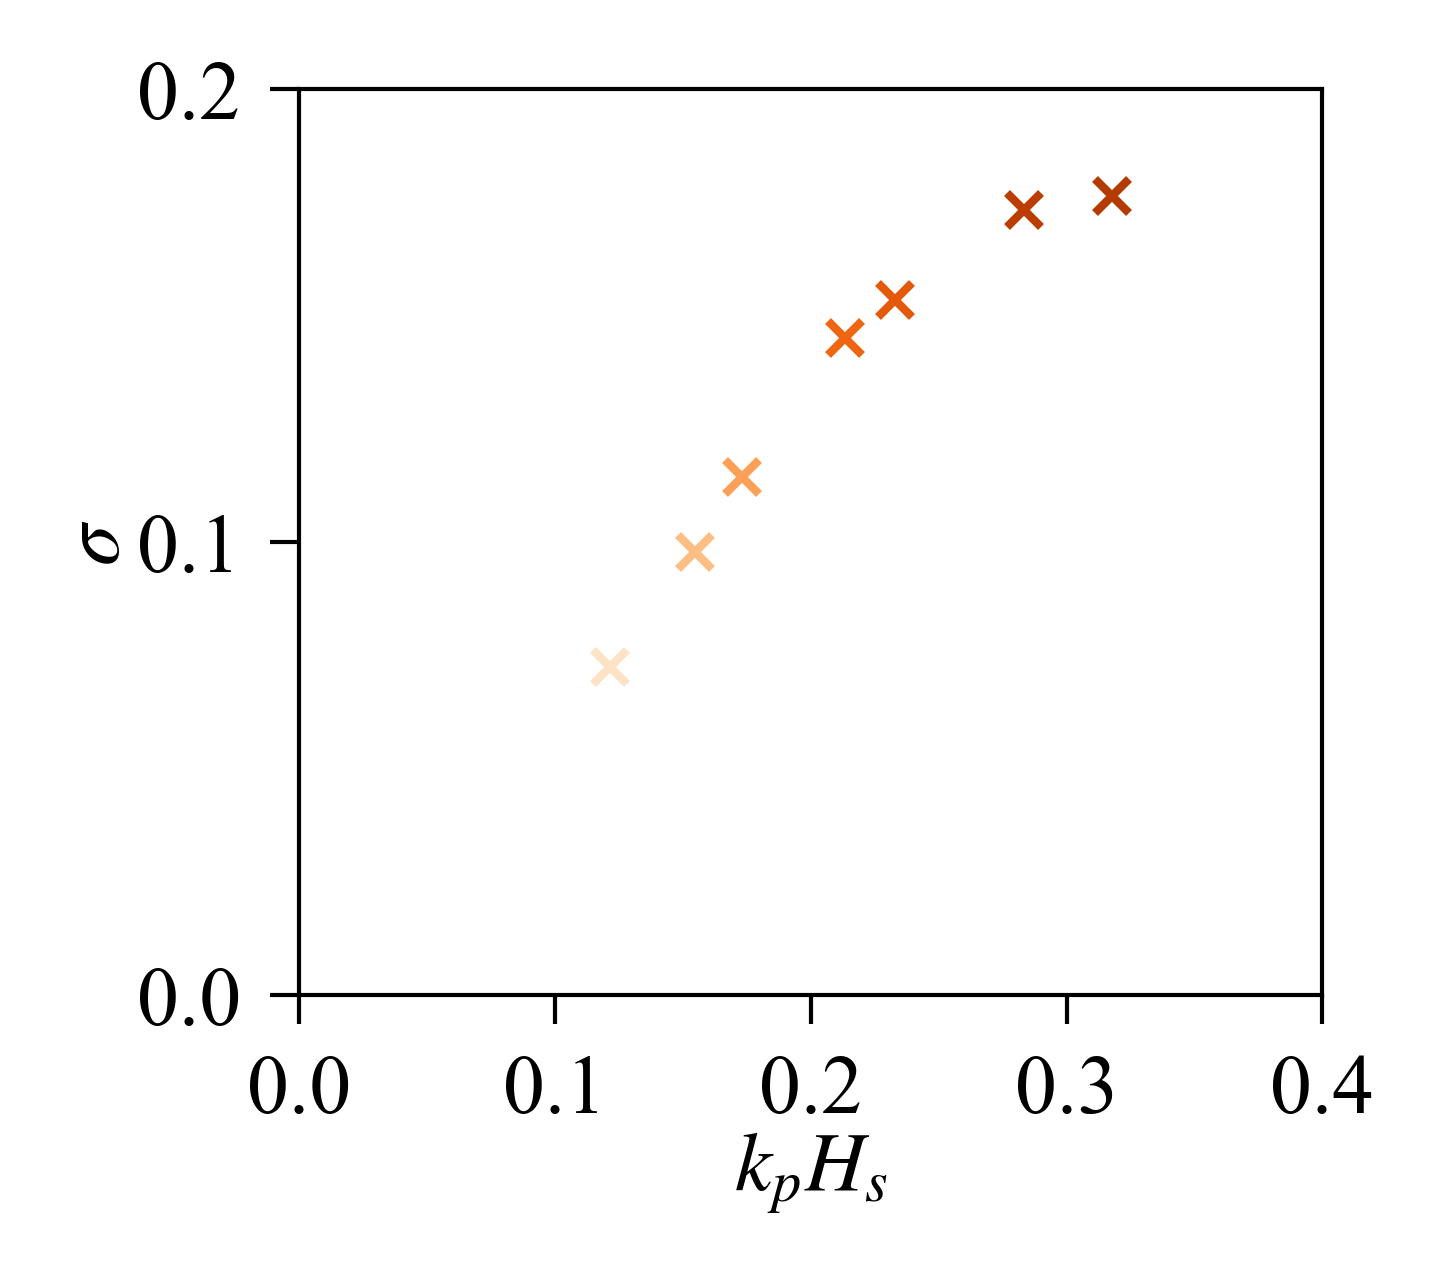

In [93]:
""" For a talk """
from matplotlib.legend_handler import HandlerTuple
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

""" Sieve out the different slope limiter cases """
for config in (config_set):
    for case in config.cases:
        case.SLOPE = True
            
config2_3.cases[2].SLOPE = False # different slope limiter

for (i,config) in enumerate(config_set):
    if i == 4:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
                d2, = plt.plot(case.Hskp, case.mu_plateau,'x', c=case.cc, markersize=4,  markeredgewidth=1)
    else:
        for (j,case) in enumerate(config.cases):
            if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
                plt.plot(case.Hskp, case.mu_plateau, 'x', c=case.cc, markersize=4,  markeredgewidth=1)

plt.xlim([0.,0.4]); plt.xticks(np.array([0, 0.1,0.2,0.3,0.4]))
plt.ylim([0.,0.2]); plt.yticks(np.array([0., 0.1, 0.2]))
plt.xlabel(r'$k_pH_s$', labelpad=0); plt.ylabel(r'$\sigma$', labelpad=0)
# legend = plt.legend([(d1,d2,d3)], [r'$N$ = 5, 2, 10'], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower right', fancybox=False, fontsize=8, handlelength=2)


P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07


Text(0.55, 0.7, '$\\propto\\hat{c}^{-6}$')

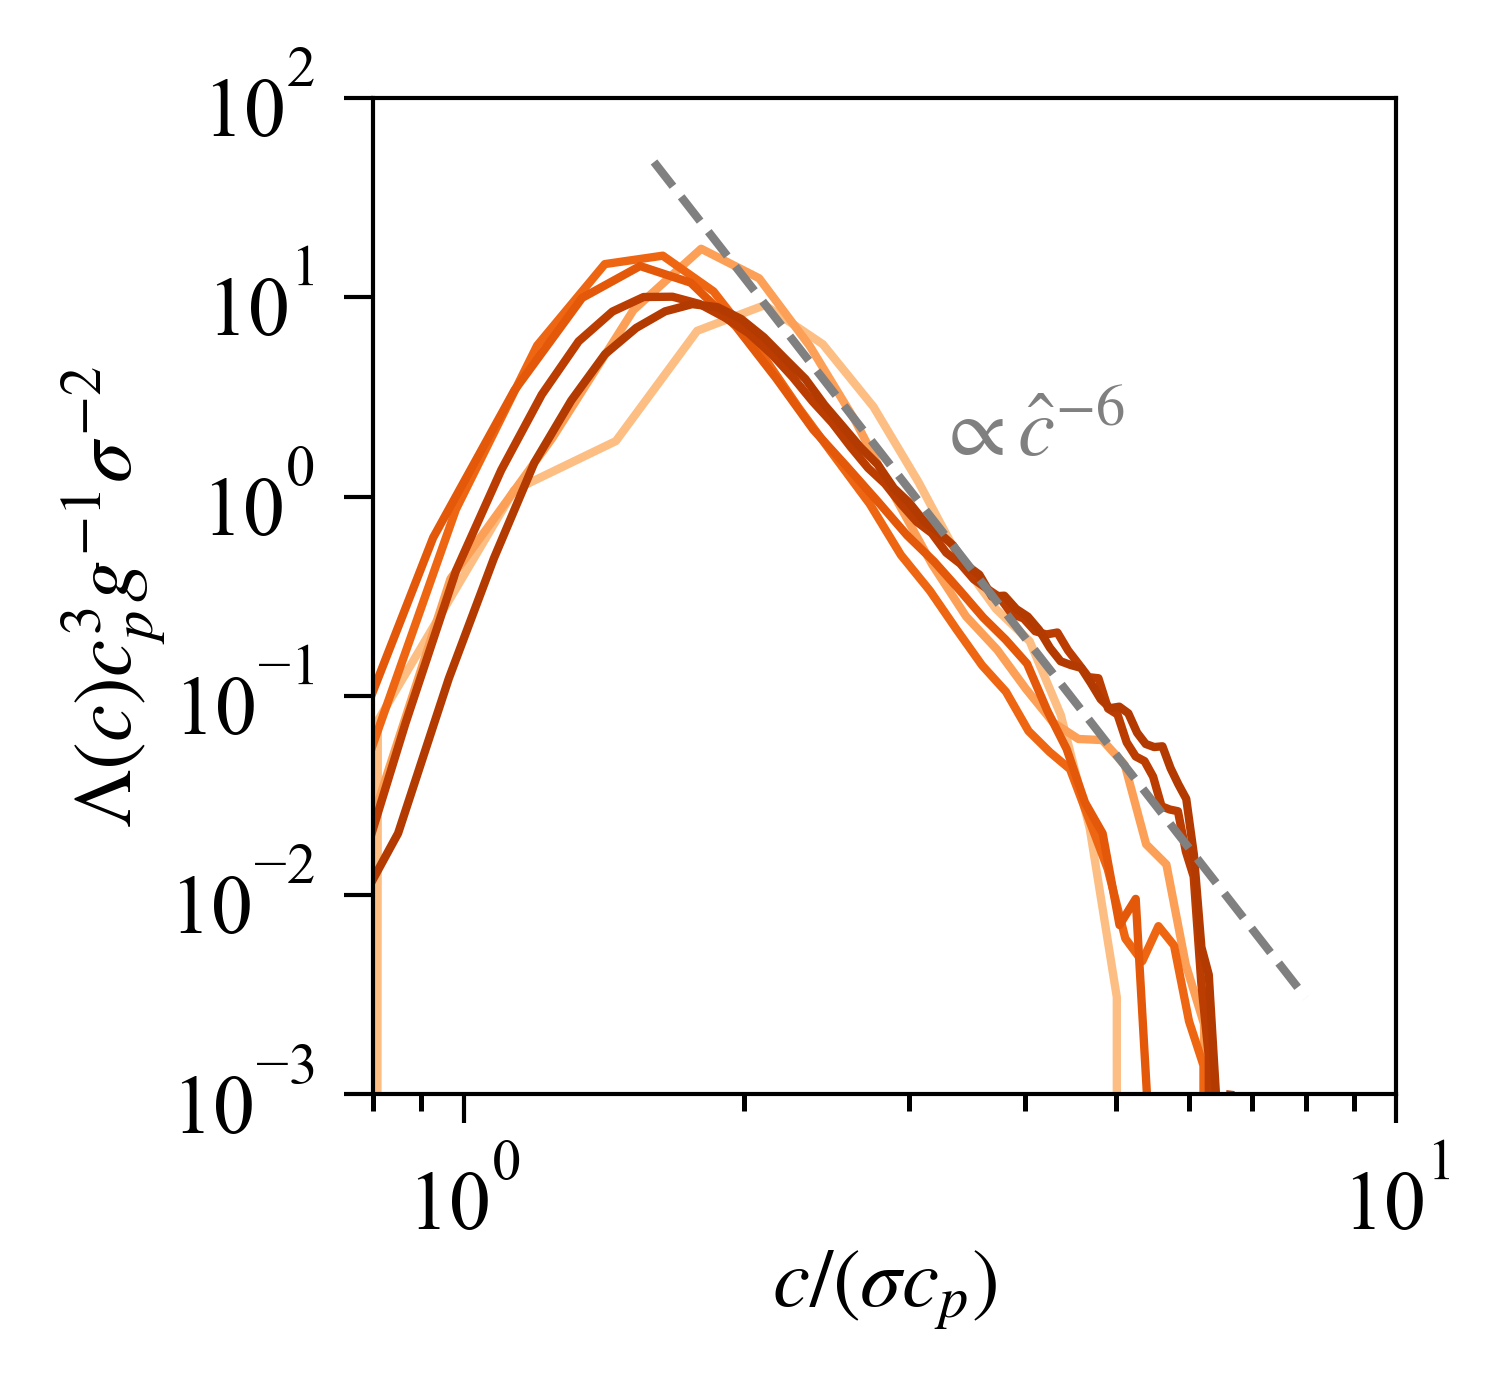

In [77]:
""" For a talk """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

zeroth_ensem = []
first_ensem = []

for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = (9.8/config.kp)**0.5 
#         normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5 # Old normalization that is based on P value
#         normx = (9.8*case.Hskp/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8) * case.Hskp ** 0.25
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 
                    zeroth_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0))
                    first_ensem.append(np.sum(hist/2**case.LEVEL/case.config.L0*bins_plotting))

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.8,10])
plt.ylim([10**(-3),10**2])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**2])
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(1.6, 8, 100)
y_ = x_**(-6)*800
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto\hat{c}^{-6}$', xy=(0.55, 0.7), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

P=0.01
P=0.02


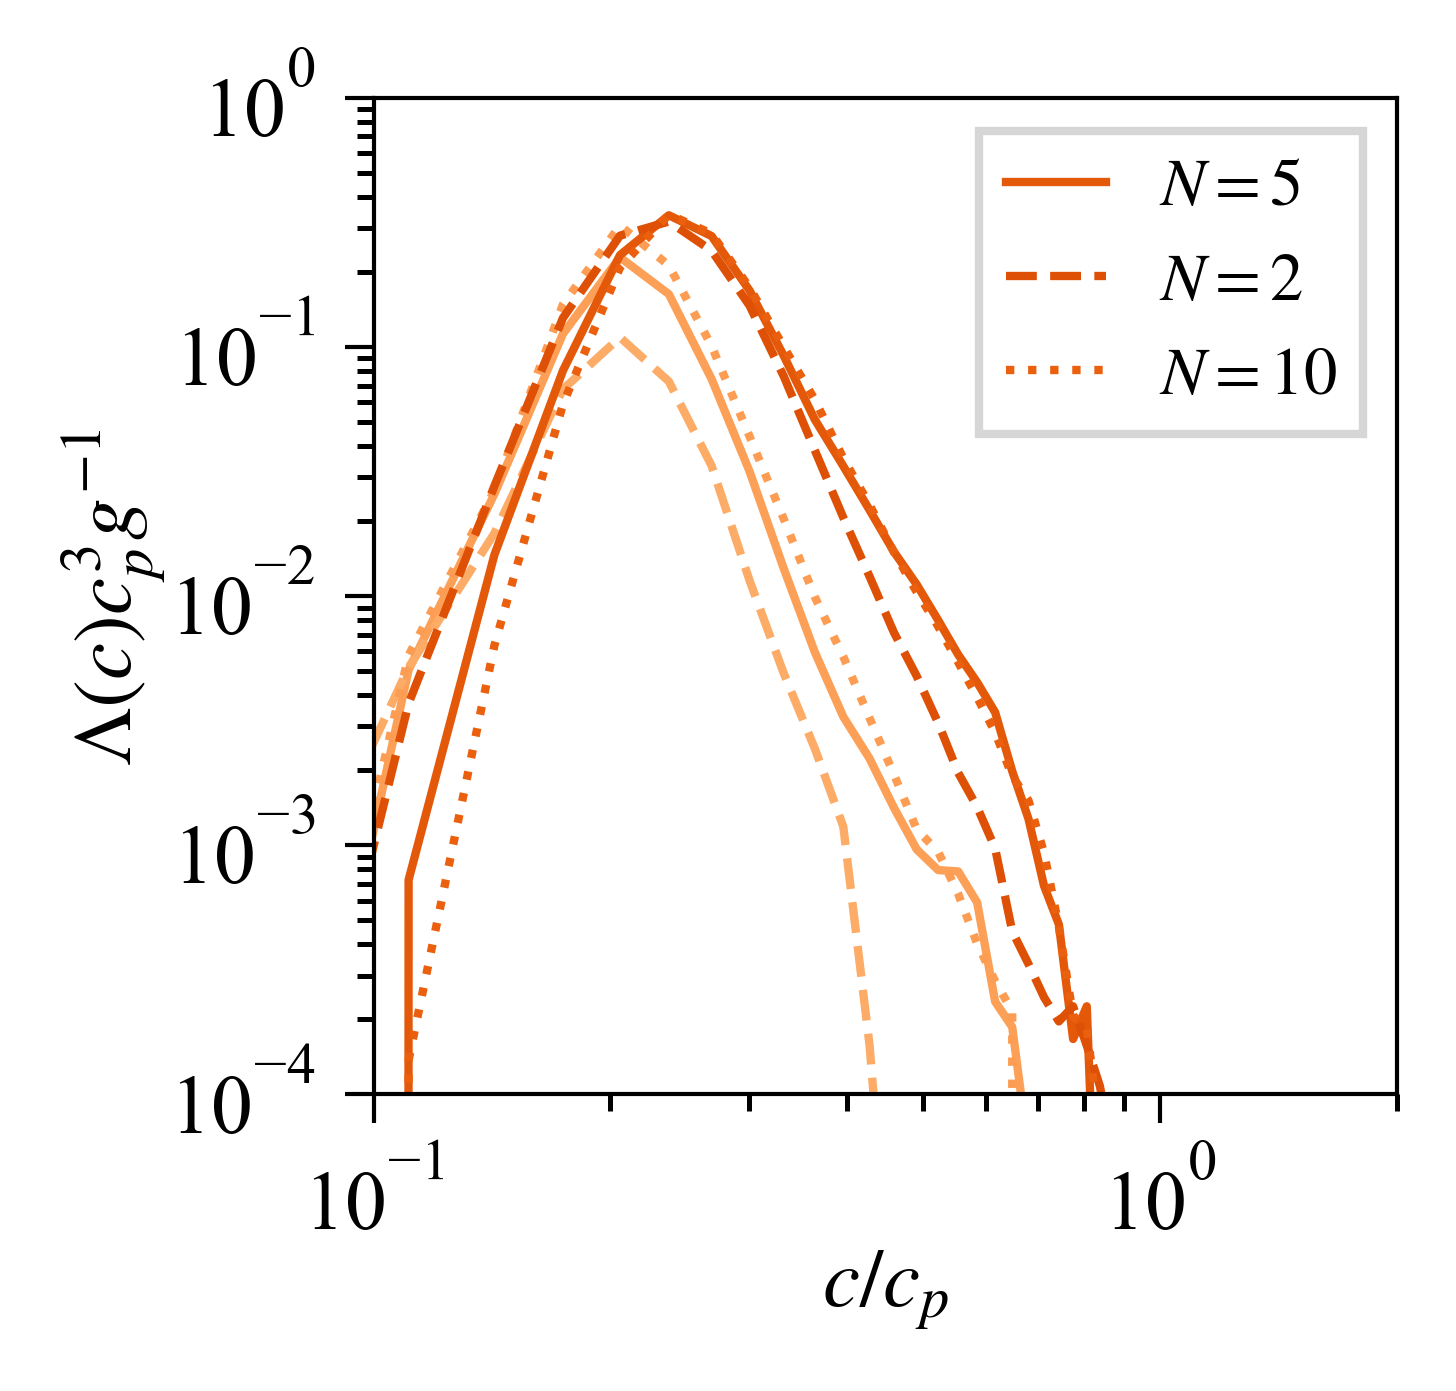

In [78]:
""" Plot for presentation """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

zeroth_ensem = []
first_ensem = []

for k, config in enumerate((config_set[2],config_set[4])):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):

        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)

        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    if case.config.P == 0.02:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label='$N=%g$' %case.Npower, c=case.cc, linestyle='-', alpha=1, lw=1)     
                    else:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=case.cc, linestyle='-', alpha=1, lw=1)
           
        if (case.NL == 15) and (case.Npower == 2) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    if case.config.P == 0.02:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label='$N=%g$' %case.Npower, c=case.cc, linestyle='--', alpha=1, lw=1)     
                    else:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=case.cc, linestyle='--', alpha=1, lw=1)
        if (case.NL == 15) and (case.Npower == 10) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    if case.config.P == 0.02:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label='$N=%g$' %case.Npower, c=case.cc, linestyle=':', alpha=1, lw=1)
                    else:
                        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, c=case.cc, linestyle=':', alpha=1, lw=1)

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
plt.legend(fancybox=False, fontsize=8, handlelength=1.5)
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)



P=0.008
P=0.01
P=0.016
P=0.02
P=0.05
P=0.07


/tmp/ipykernel_67930/969305324.py:97: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/lambda_c_log_Npower_alter.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_67930/969305324.py:98: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/lambda_c_log_Npower_alter.eps', bbox_inches='tight', pad_inche=0.)


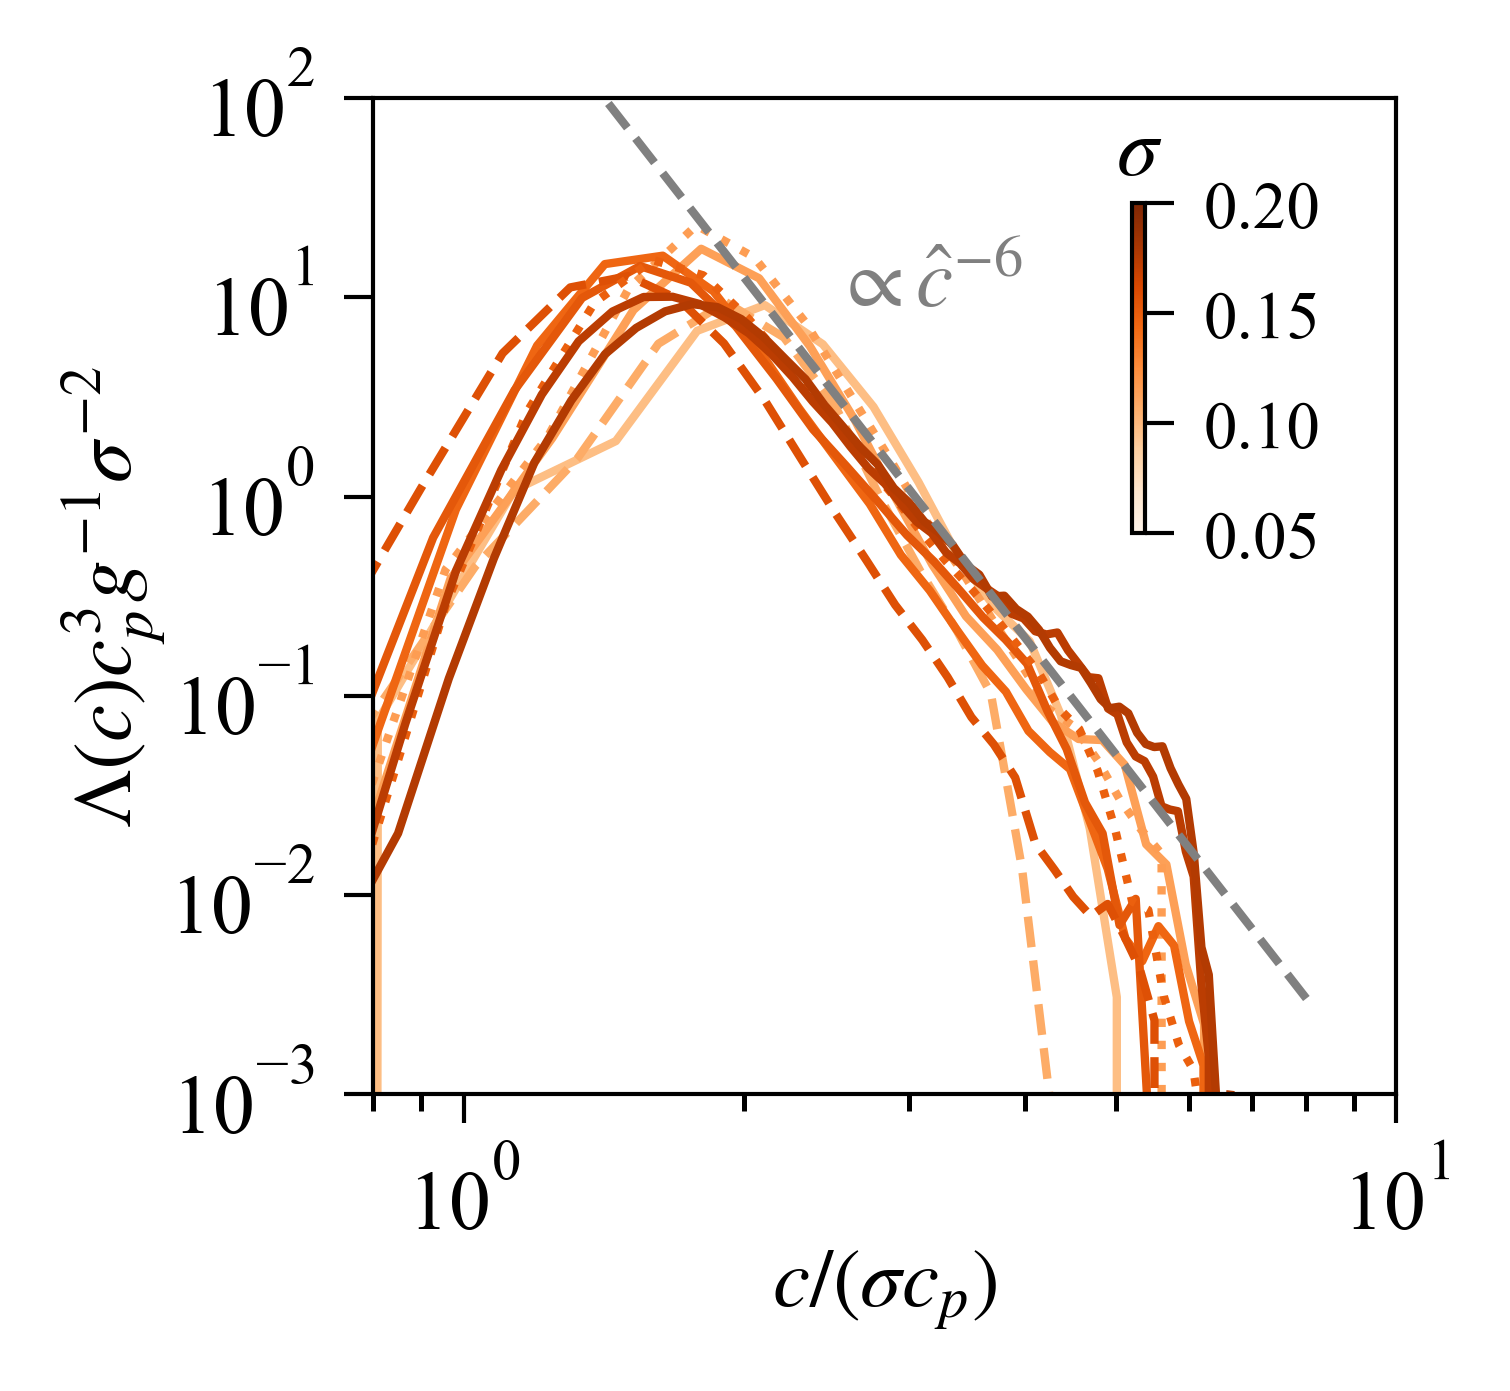

In [68]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = (9.8/config.kp)**0.5 
#         normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5 # Old normalization that is based on P value
#         normx = (9.8*case.Hskp/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8) * case.Hskp ** 0.25
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 

        if (case.NL == 15) and (case.Npower == 2) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle='--', alpha=1, lw=1)            # The extra filter 

        if (case.NL == 15) and (case.Npower == 10) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.cc, linestyle=':', alpha=1, lw=1)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.8,10])
plt.ylim([10**(-3),10**2])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**2])
# plt.xlabel(r'$c/((k_pH_s)^{1/2} c_p)$', labelpad=0) # equivalent to plt.xlabel(r'$c/\sqrt{gH_s}$', labelpad=0)
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}(k_pH_s)^{-1/2}$', labelpad=0) # equivalent to plt.ylabel(r'$\Lambda(c)\sqrt{gH_s}^3g^{-1}(k_pH_s)^4$', labelpad=0)

""" Normalized """
x_ = np.linspace(0.5, 8.1, 100)
y_ = x_**(-6)*800
plt.plot(x_, y_, '--', c='gray', alpha=1, lw=1)
ax.annotate(r'$\propto\hat{c}^{-6}$', xy=(0.45, 0.85), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=10)

ax2  = fig.add_axes([0.7,0.55,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

# ax.annotate(r'$0.02\hat{c}^{-6}$', xy=(0.35, 0.2), ha='left', va='top', xycoords='axes fraction', c='gray', fontsize=8)

# plt.xlim([0.1,10])
# plt.ylim([10**(-4),10**(1)])
# plt.xlabel(r'$\hat{c} = c/\sqrt{gH_s}$', labelpad=0) 
# plt.ylabel(r'$\Lambda(c)P^{-1}(\sqrt{gH_s})^4g^{-3/2}$', labelpad=0)

# fig.savefig('figures_new/lambda_c_log_Npower_alter.pdf', bbox_inches='tight', pad_inche=0.)
# fig.savefig('figures_vector/lambda_c_log_Npower_alter.eps', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/lambda_c_log_Npower_alter.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/lambda_c_log_Npower_alter.eps', bbox_inches='tight', pad_inche=0.)

P=0.008
0.00019023020783737218
P=0.01
0.0002604709138972233
P=0.016
0.0004191760137862274
P=0.02
0.00046896657102267345
P=0.05
0.00015110181982904837
P=0.07
0.00015672162326139168


Text(0.5, 1.15, '$\\sigma_{obs}$')

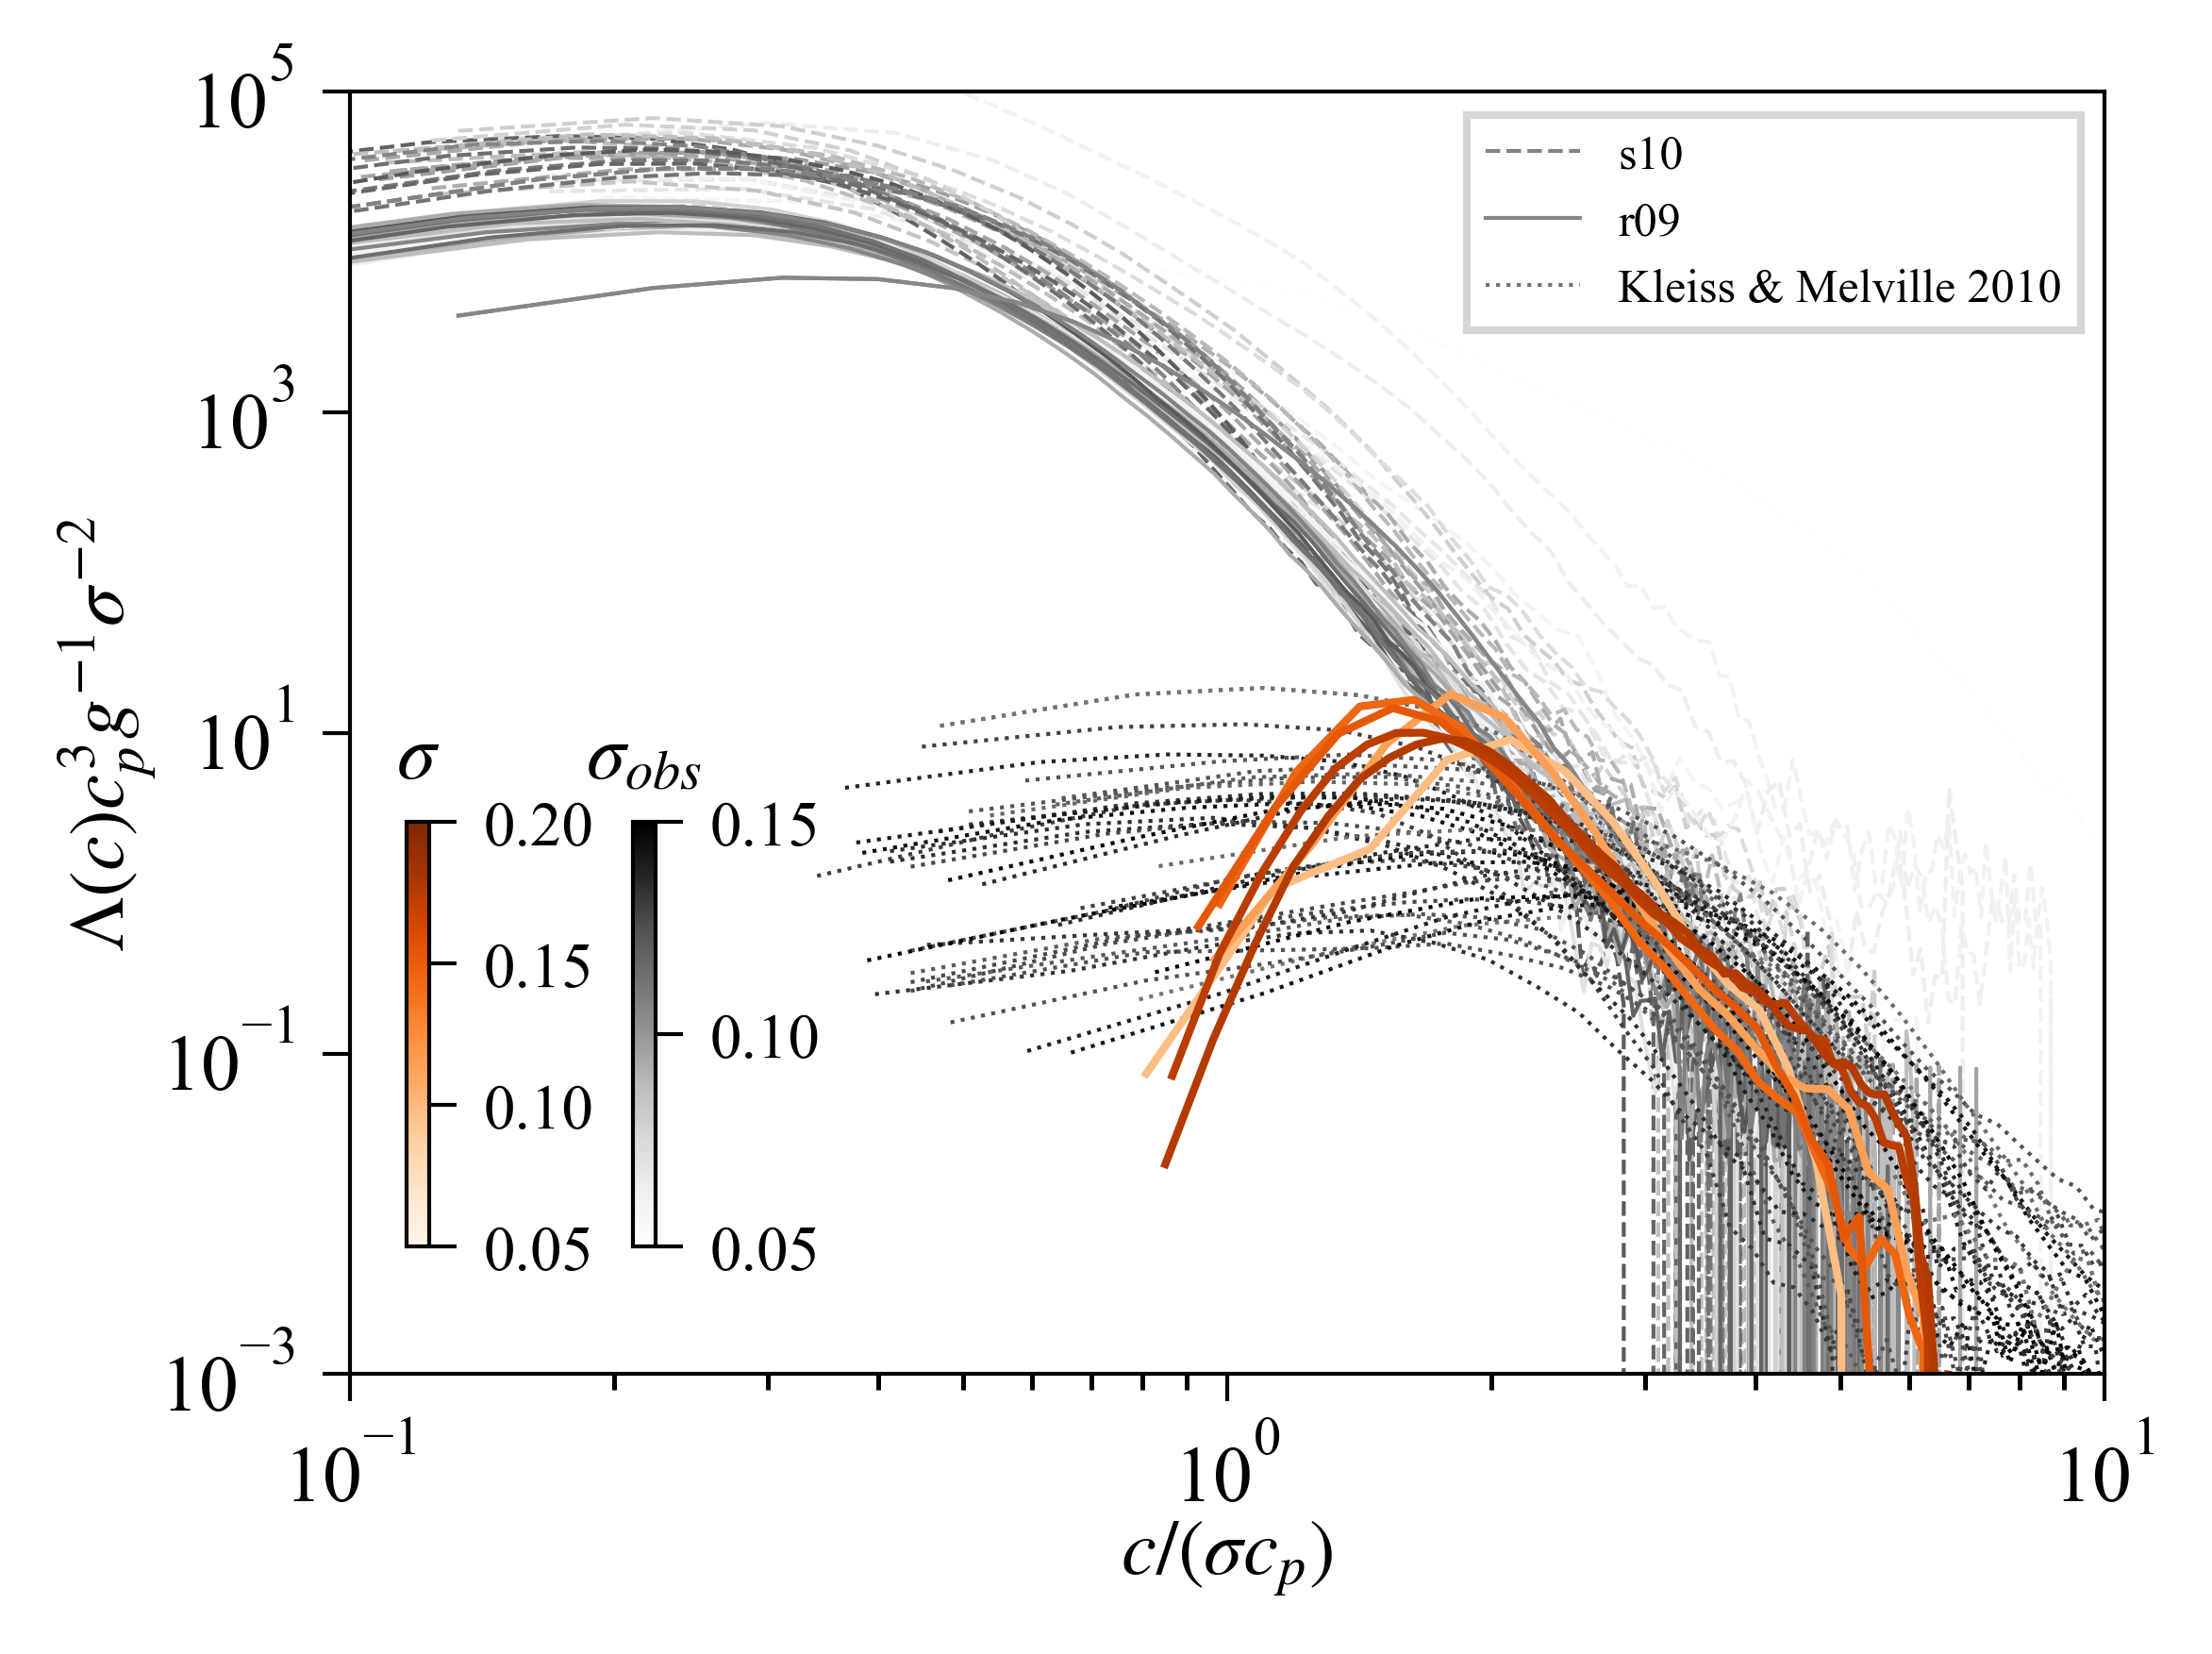

In [32]:
""" Normalized Lambda(x) distribution. Also include different lines for different angle spread. 
    There is another version of this cell with directly read-in data in Revision_misc.ipynb """
fig = plt.figure(figsize=[4,3]); ax = plt.gca()

""" Read from the s10 files """
for i in range(0,38):
    filename = 'data/s10_39/Newscaling_SolCal2013_%g.csv' %(39-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'], data['hat{Lambda(c)}'], linestyle='--', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
        if i == 37:
            plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='--', 
                     color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5, label='s10')

for i in range(0,25):
    filename = 'data/r09_25/Newscaling_r09_%g.csv' %(25-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='-', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
        if i == 24:
            plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle='-', 
                     color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5, label='r09')            # The extra filter 

for i in range(0,36):
    filename = 'data/JK_36/Newscaling_JK36_%g.csv' %(36-i)
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter = ',')
        cscale = (data['sigma'][0] - 0.05)/(0.15-0.05)
        plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle=':', 
                 color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5)            # The extra filter 
        if i == 35:
            plt.plot(data['hat{c}'][:], data['hat{Lambda(c)}'][:], linestyle=':', 
                     color=plt.get_cmap('Greys')(cscale), alpha=1, lw=0.5, label='Kleiss & Melville 2010')            # The extra filter 

        
for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
#         normx = (9.8/config.kp)**0.5 
#         normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5 # Old normalization that is based on P value
#         normx = (9.8*case.Hskp/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8) * case.Hskp ** 0.25
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            normx = (9.8/config.kp)**0.5 * case.mu_plateau ** 1
            normy = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    c_hat = bins_plotting/normx
                    lambdac_hat = hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy
#                     index = np.where((lambdac_hat > 10**(-4) and c_hat > 0.2))
                    index = np.where(c_hat > 0.8 )
                    plt.plot(c_hat[index], lambdac_hat[index], c=case.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 

            """ Write to a file """
            config.cp = (9.8/config.kp)**0.5
    #             config.ustar = ((case.Hskp/config.kp*9.8)**0.5/config.cp**0.75)**4
            case.ustar = ((case.Hskp/config.kp*9.8)**0.5/1.58/config.cp**0.75)**4
            file = open("./data/Update_Lambda(c)_kp%.3f_P%g_Hs%.3f_ustar%.3f.csv" %(config.kp, config.P, case.Hskp/config.kp, case.ustar), "w")
            fieldnames = ['c (ms-1)', 'Lambda(c) (m-2s)', 'hat1{c}', 'hat1{Lambda(c)}', 'hat2{Lambda(c)}', 'hatnew{c}', 'hatnew{Lambda(c)}']
            writer = csv.writer(file)
            writer.writerow(fieldnames) 
            normx = (9.8*case.Hskp/config.kp)**0.5
#             normy = config.P**(1)/(9.8*config.Hskp/config.kp)**(2)*9.8**1.5   
            normy1 = (9.8*case.Hskp/config.kp)**(14/6)/9.8/case.ustar**(5/3) 
            normy2 = (config.cp)**(3.5)/9.8/case.ustar**(1/2) 
            # Sigma based scaling for the plots
            normx_new = (9.8/config.kp)**0.5*case.mu_plateau 
            normy_new = 1/((9.8/config.kp)**1.5/9.8) * case.mu_plateau ** 2
            print(normy_new)
            bins_lambda_c = case.hist_ensem['hist_ensem'][0]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
            for c, lambda_c in zip(bins_plotting, bins_lambda_c):
                writer.writerow(['{:4f}'.format(c), '{:7f}'.format(lambda_c), '{:4f}'.format(c/normx), '{:7f}'.format(lambda_c*normy1), 
                                 '{:7f}'.format(lambda_c*normy2), '{:4f}'.format(c/normx_new), '{:7f}'.format(lambda_c/normy_new)])     
            file.close()  

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,10])
plt.ylim([10**(-3),10**5])
 
plt.xlabel(r'$c/(\sigma c_p)$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}\sigma^{-2}$', labelpad=0)
ax.set_yticks([10**(-3), 10**(-1),10**(1), 10**(3), 10**(5)])

plt.legend(fancybox=False, loc='upper right', fontsize=6)

ax2  = fig.add_axes([0.15,0.2,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

ax3  = fig.add_axes([0.25,0.2,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.15)
cbar = mpl.colorbar.ColorbarBase(ax3, cmap=plt.get_cmap('Greys'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15))
cbar.ax.tick_params(labelsize=8)
cbar.ax.text(0.5, 1.15, r'$\sigma_{obs}$', ha='center', va='center', transform=cbar.ax.transAxes)

P=0.008
0.0176536133723502 0.1894682531440962
P=0.01
0.028380832334453324 0.23707647947935542
0.028380832334453324 0.23361466496127611
0.028380832334453324 0.2371397890633411
P=0.016
0.07714769652802704 0.35954490849423143
P=0.02
0.12402649780359018 0.42919353591878245
0.12402649780359018 0.44133243423710916
0.12402649780359018 0.42492212541055846
P=0.05
0.5197864088654615 1.0021843193460005
P=0.07
1.063495444147414 1.260864277094537


(0.0, 30.0)

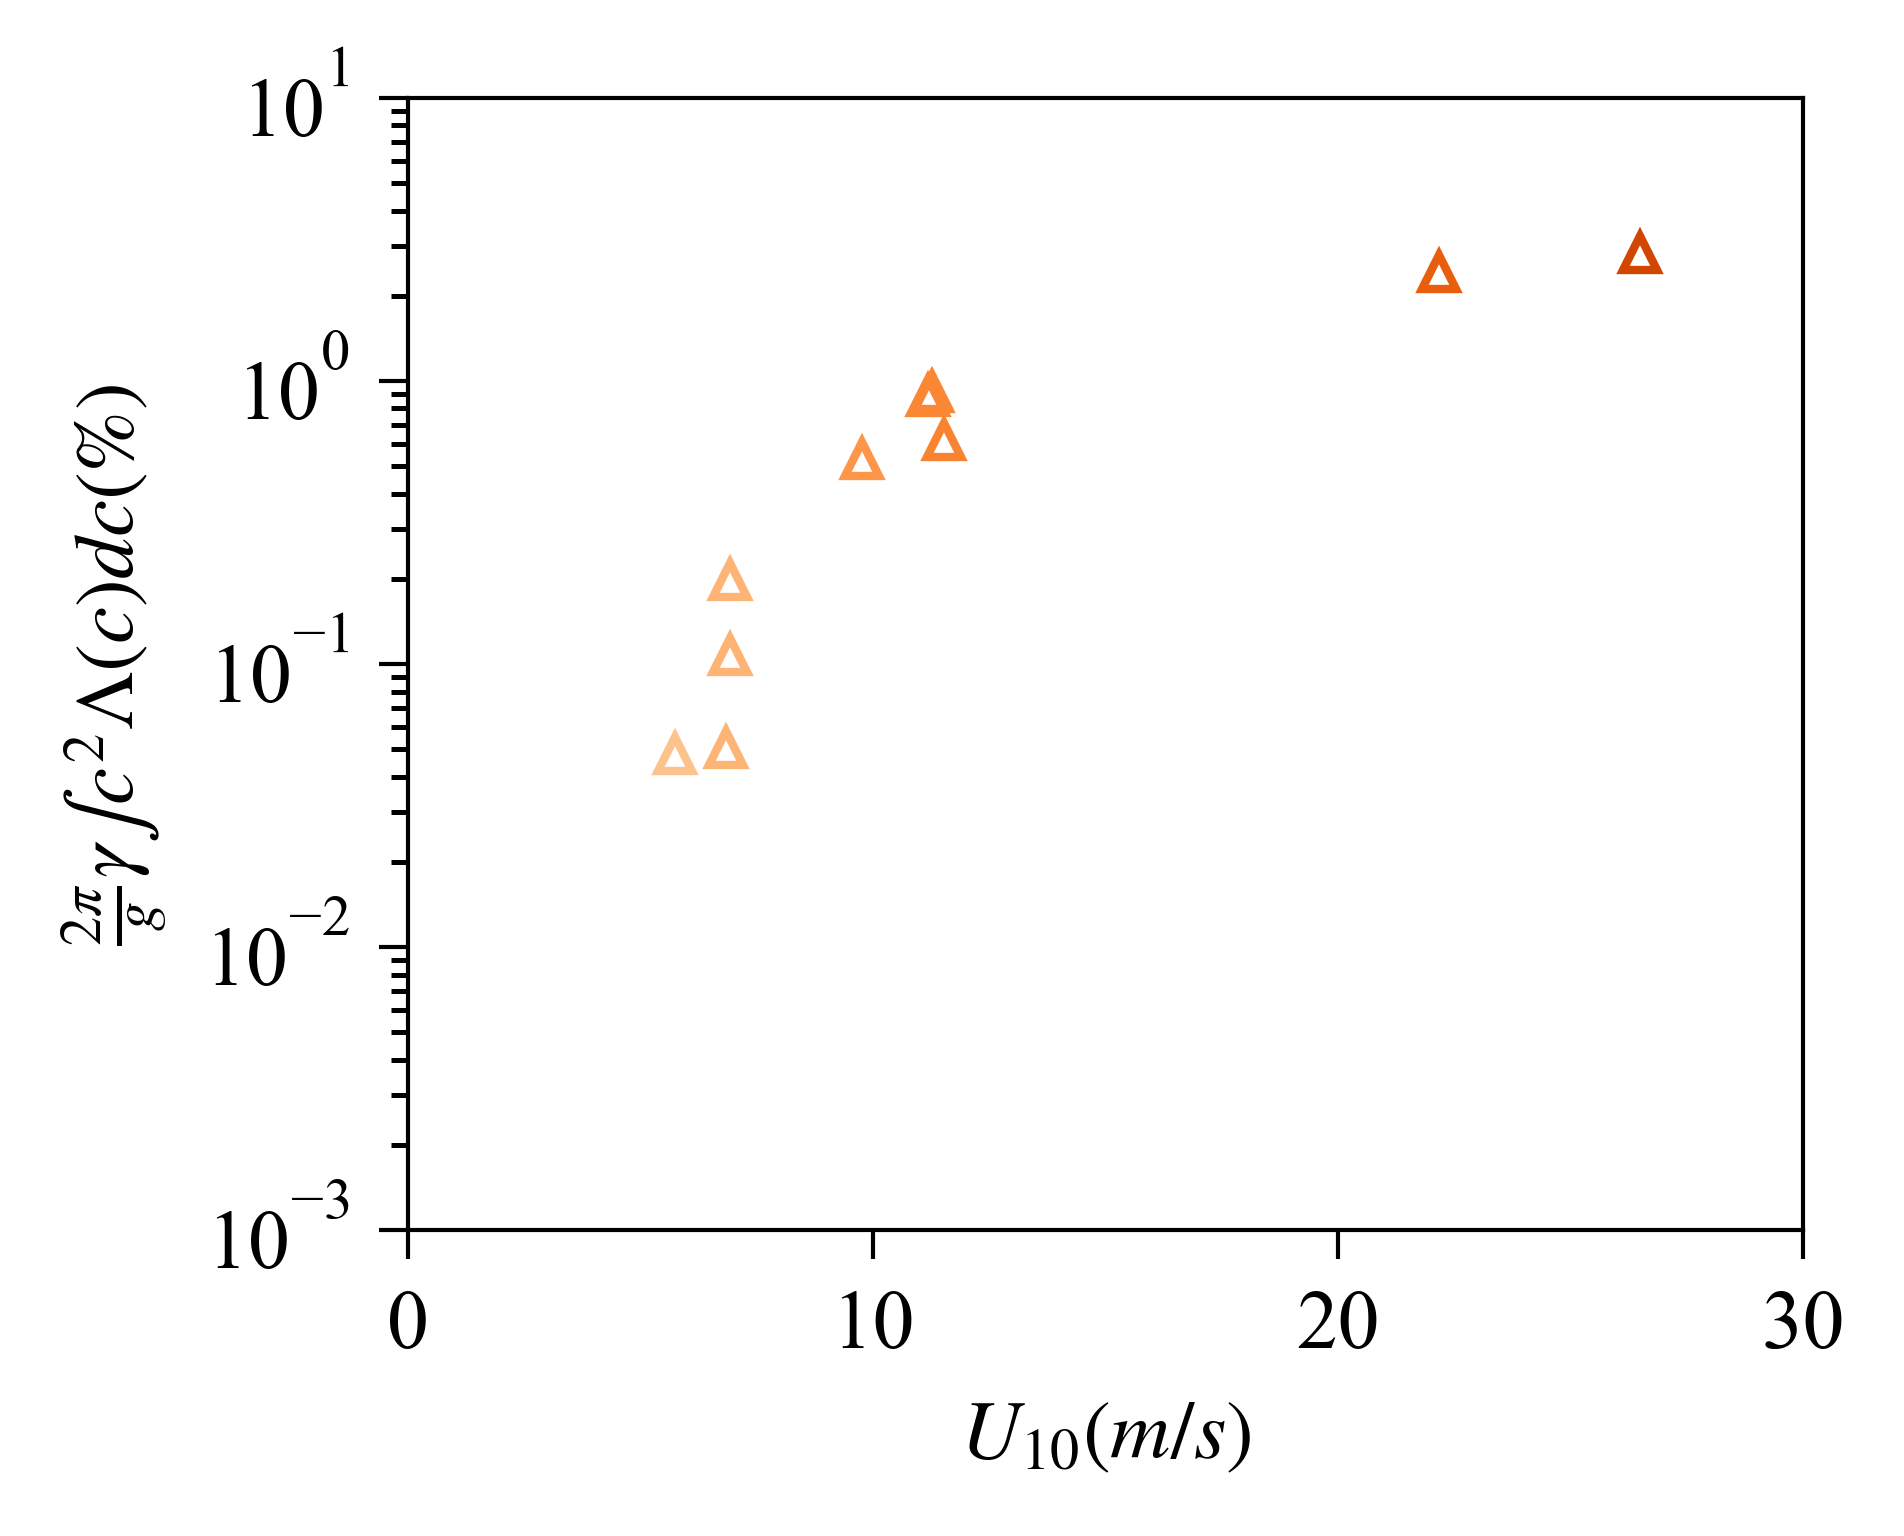

In [271]:
""" Second moment and WCC, as function of wind """
figure = plt.figure(figsize=[3,2.5]); ax = plt.gca()


ensem_WCC = []
ensem_U10 = []

for k, config in enumerate(config_set[1:]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            hist_aver = np.average(np.array(case.hist_ensem['hist_ensem']), axis=0)
            bins = case.hist_ensem['bins'] 
            bins = bins[1:] - (bins[2] - bins[1])/2
            case.second = 0
    #         case.first = 0 
    #         threshold = 1*(9.8*config.Hskp/config.kp)**0.5   
            for (bin_, hist_) in zip(bins, hist_aver):
                if bin_ > 2: # the 2m/s limit
    #             if bin_ > threshold: # the 2m/s limit
                    case.second += bin_**2*hist_/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
    #                 case.first += bin_*hist_/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
            case.second = case.second*(bins[2] - bins[1])

            """ Compute U10: first from fetch-limited condition get u*, and then use Charnock relation """
            const = 1
            config.cp = (9.8/config.kp)**0.5
            ustar_P = (config.P*np.exp(-1.25)/0.016/(config.cp**0.53)*9.8**0.5)**(1/0.47)
            ustar = const*((case.Hskp/config.kp*9.8)/config.cp**1.5)**2
            print(ustar_P, ustar)
            U10 = (ustar**2*np.log(10/(0.0112*ustar**2/9.8))**2/0.41**2)**0.5
    #         U10 = (ustar_P**2*np.log(10/(0.0112*ustar**2/9.8))**2/0.41**2)**0.5 # More noisy!
            ensem_U10.append(U10)
            gamma = 0.56
            plt.plot(U10, case.second*2*np.pi/9.8*gamma*100, c=case.cc, marker='^', markersize=4, markerfacecolor='None', markeredgewidth=1)
            ensem_WCC.append(case.second*2*np.pi/9.8*gamma*100)
            config.ustar = ustar
#             print('L0 = %g, b = %g' %(case.config.L0, case.dEdt/(case.fifth+0.0001)*9.8))
        
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

# slope = (ensem_dEdt[-1] - ensem_dEdt[0])/(ensem_fifth[-1] - ensem_fifth[0])*9.8
# print(slope)
# intersect = - slope*ensem_fifth[0]/9.8 + ensem_dEdt[0]
# plt.plot(np.array(ensem_fifth)/9.8, slope*np.array(ensem_fifth)/9.8 + intersect, '--', color = 'gray', alpha=0.5)

ax.set_ylabel(r'$\frac{2\pi}{g}\gamma\int c^2\Lambda(c)dc (\%)$'); ax.set_xlabel(r'$U_{10} (m/s)$')

# ax.text(0.8,0.15,'$b=%.4f$' %slope, c='gray')
# ax.text(45,0.15,'$b=%.4f$' %slope, c='gray')
# ax.text(800, 800,'$b=%.4f$' %slope, c='gray')
# ax.text(32000, 800,'$b=%.4f$' %slope, c='gray')
# plt.xscale('log'); 
plt.yscale('log')
plt.ylim([0.001, 10])
plt.xlim([0, 30])

In [269]:
""" Write data """
file = open("./data/WCC_level10.csv", "w")
fieldnames = ['U10', 'WCC']
writer = csv.writer(file)
writer.writerow(fieldnames) 
for U10, WCC in zip(ensem_U10, ensem_WCC):
    writer.writerow([round(U10, 3), round(WCC, 6)])     
file.close()

## Convergence check

In [109]:
config_set1 = [config2_0,config2_9,config2_1,config2_10,config2_2] # Choice of configurations
config_set2 = [config3_2,config3_3]
config_set = [*config_set1, *config_set2] 

In [110]:
""" Define the time window where the statistics are collected ( more windows) """
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
tstart = 120
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
tstart = 140
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
tstart = 160
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)

In [94]:
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)

In [111]:
""" Compute the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            print (case.path)
            energy = read(case.path, 'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.time_window(tseries_ensem3, threshold=0, bins=[])

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_10_15_rand2_Htheta0.503/
1.7949999999999817


/tmp/ipykernel_195700/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])


/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
3.202500000000009
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
12.8
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503/
20.03749999999991
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/
1578.0
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/
2148.5


In [113]:
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
from prepare import load_object, save_object    
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            picklename = 'pickle/breakingstat_P%g_L%g' %(case.config.P,case.LEVEL) + '.pkl'
            save_object(case.hist_ensem, picklename)

In [118]:
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)

In [95]:
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            print (case.path)
            energy = read(case.path, 'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.time_window(tseries_ensem3, threshold=0, bins=[])

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.005_RE40000_9_15_rand2_Htheta0.503/
5.731500000000006


/tmp/ipykernel_248701/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])


/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.008_RE40000_9_15_rand2_Htheta0.503/
6.2950000000000275
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503/
7.807500000000028
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_9_15_rand2_Htheta0.503/
15.114999999999963
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_9_15_rand2_Htheta0.503/
23.9625
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.05_RE40000_9_15_rand2_Htheta0.503/
1666.25
/projects/DEIKE/jiarongw/multilayer/field_new_500m_P0.07_RE40000_9_15_rand2_Htheta0.503/
2013.0


In [102]:
tseries_ensem3 = []
tstart = 90
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 11) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            case.time_window(tseries_ensem3, threshold=0, bins=[])

In [123]:
""" LEVEL 9, Npower = 5 """
config = config2_2
for case in config.cases:
    if (case.NL == 15) and (case.LEVEL == 9) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        eta = case.read_t(fieldname='eta', t=110)  
        case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
        mu = steepness_trunc (case.Fkmod, case.kmod)
        case.mu_plateau = mu[-1]
        case.Hskp = np.var(eta)**0.5*4*case.config.kp
        print(case.config.P, case.Hskp)

N=512, L=200
0.02 0.23329205274029866


In [103]:
""" LEVEL 11, Npower = 5 """
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 11) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            print(case.config.P, case.Hskp)

N=2048, L=200
0.01 0.17339194939190675
N=2048, L=200
0.02 0.23382318246925513


In [ ]:
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            picklename = 'pickle/breakingstat_P%g_L%g' %(case.config.P,case.LEVEL) + '.pkl'
            save_object(case.hist_ensem, picklename)

In [122]:
for config in (config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5) and case.LEVEL != 11:
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.config.P, case.Hskp)

N=512, L=200
0.005 0.11747171515694005
N=1024, L=200
0.005 0.12134292843891631
N=512, L=200
0.008 0.15115086037339825
N=512, L=200
0.01 0.1699491233101709
N=1024, L=200
0.01 0.17324778271355945
N=512, L=200
0.016 0.21169196092576206
N=1024, L=200
0.016 0.2133536228950277
N=512, L=200
0.02 0.23329205274029866
N=1024, L=200
0.02 0.23310416670955753
N=512, L=500
0.05 0.2830325566710159
N=1024, L=500
0.05 0.28327761010676605
N=512, L=500


/tmp/ipykernel_195700/4238408167.py:6: RuntimeWarning: invalid value encountered in double_scalars
  mu[i] = (np.sum(k[:i]**2*F[:i]*dk))**0.5


0.07 0.32019429428138796
N=1024, L=500
0.07 0.31774053202000274


In [176]:
tseries_ensem3 = []
tstart = 100
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set[2:3]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            energy = read(case.path, 'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
            print(case.dEdt)
            case.time_window(tseries_ensem3, threshold=0, bins=[])
            case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35)

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503/
7.807500000000028


/tmp/ipykernel_195700/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])


/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503_N2/
7.3125
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503_N10/
8.320000000000027


In [183]:
tseries_ensem3 = []
tstart = 90
dt = 0.2
tseries = np.arange(tstart, tstart+20, dt)
tseries_ensem3.append(tseries)
""" Compute the breaking stats """
for k, config in enumerate(config_set[2:4]):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            energy = read(case.path, 'energy_after_remap.dat')
            case.dEdt = (energy[energy.t==90]['ke'].values[0] - energy[energy.t==110]['ke'].values[0])/20
            print(case.dEdt)
            case.time_window(tseries_ensem3, threshold=0, bins=[])

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503/
6.975


/tmp/ipykernel_195700/2748138845.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ', table_headers = ['t', 'ke', 'gpe'])


/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
0.625
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_11_15_rand2_Htheta0.503/
-1.7150000000000545
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_9_15_rand2_Htheta0.503/
18.05
/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
11.725


In [192]:
for config in ((config_set[:5])):
    for case in config.cases:
        if (case.NL == 15) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            eta = case.read_t(fieldname='eta', t=110)  
            case.kmod, case.Fkmod = spectrum_integration(eta, CHECK=False, L=config.L0, N=2**case.LEVEL)
            mu = steepness_trunc (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            config.kmod, config.Fkmod = case.kmod, case.Fkmod
            print(case.config.P, case.Hskp)
            case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35)

N=512, L=200
0.02 0.23329205274029866
N=1024, L=200
0.02 0.23310416670955753
N=2048, L=200
0.02 0.23382318246925513
N=512, L=500
0.05 0.2830325566710159
N=1024, L=500
0.05 0.28327761010676605
N=512, L=500


/tmp/ipykernel_195700/4238408167.py:6: RuntimeWarning: invalid value encountered in double_scalars
  mu[i] = (np.sum(k[:i]**2*F[:i]*dk))**0.5


0.07 0.32019429428138796
N=1024, L=500
0.07 0.31774053202000274


P=0.01
P=0.02


/tmp/ipykernel_195700/1567877634.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/convergence.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_195700/1567877634.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/convergence.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


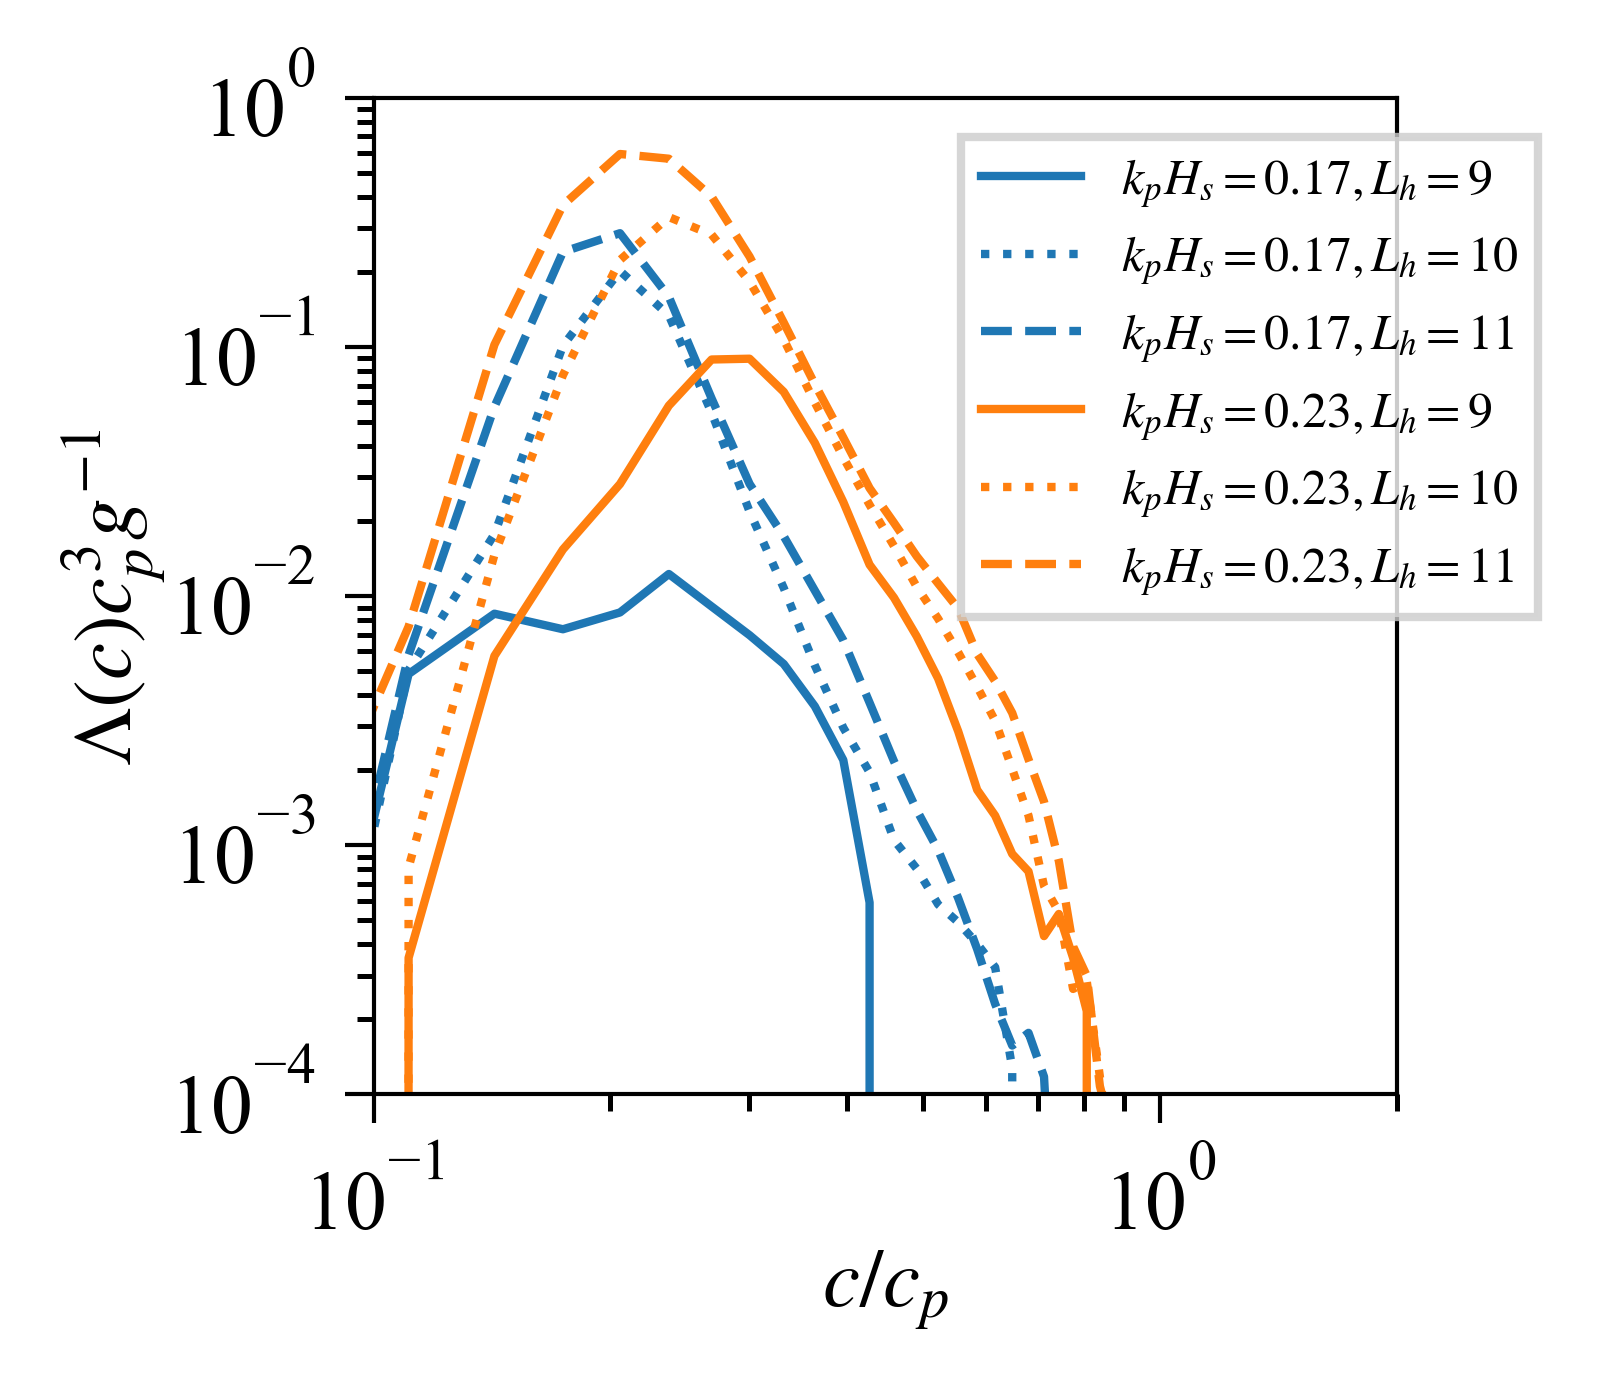

In [231]:
""" Check that the breaking statistics are horizontal resolution converged. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()


for k, config in enumerate((config_set[2],config_set[4])):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        normx = (9.8/config.kp)**0.5
        normy = 1/((9.8/config.kp)**1.5/9.8)
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label=r'$k_pH_s=%.2f, L_h=%g$' %(case.Hskp,case.LEVEL), c=plt.get_cmap('tab10')(k), linestyle='-', alpha=1, lw=1)            # The extra filter 
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label=r'$k_pH_s=%.2f, L_h=%g$' %(case.Hskp,case.LEVEL), c=plt.get_cmap('tab10')(k), linestyle=':', alpha=1, lw=1)            # The extra filter 
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 11) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label=r'$k_pH_s=%.2f, L_h=%g$' %(case.Hskp,case.LEVEL), c=plt.get_cmap('tab10')(k), linestyle='--', alpha=1, lw=1)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
plt.legend(fancybox=False, fontsize=6, loc='center left', bbox_to_anchor=(0.55, 0.72))
fig.savefig('figures_nondim/convergence.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/convergence.eps', bbox_inches='tight', pad_inche=0.)

P=0.02


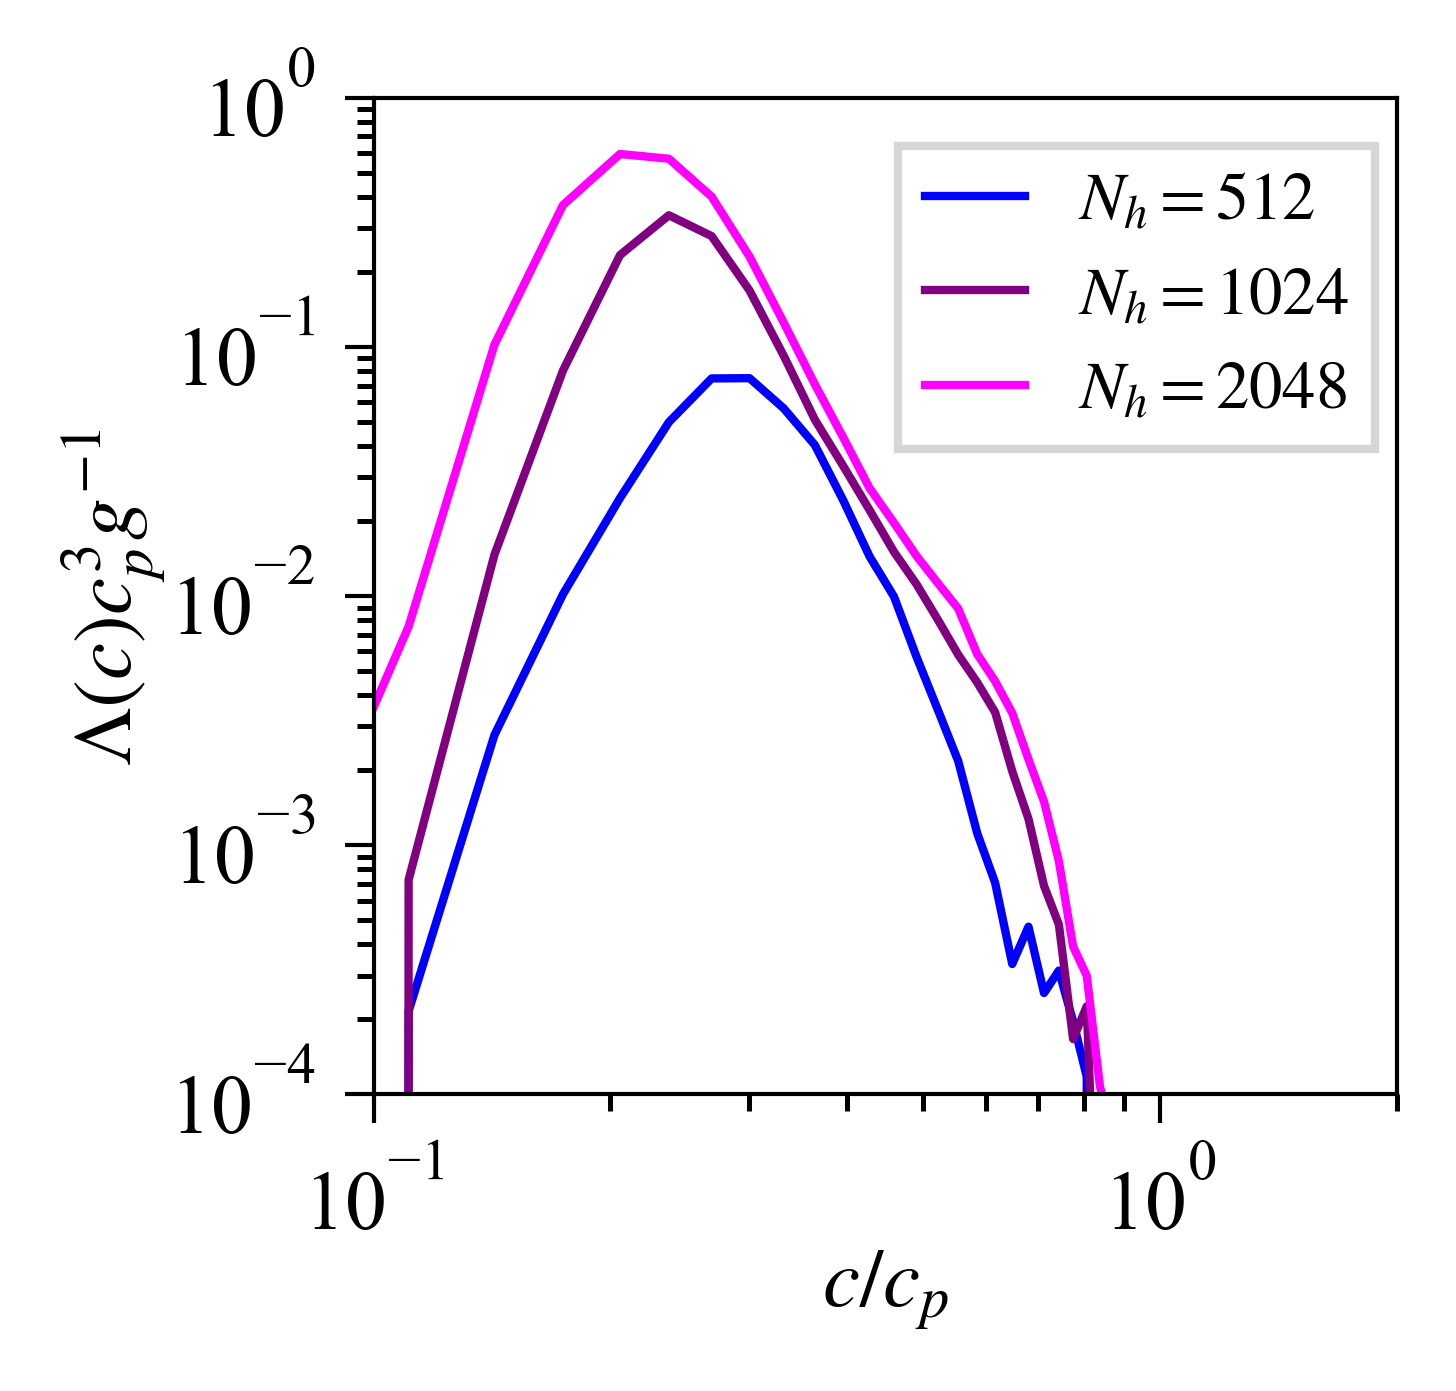

In [126]:
""" For a talk """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()


config = config2_2
print('P=%g' %config.P)
for j,case in enumerate(config.cases):
    normx = (9.8/config.kp)**0.5
    normy = 1/((9.8/config.kp)**1.5/9.8)
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                         label=r'$N_h=%g$' %(2**case.LEVEL), c='blue', alpha=1, lw=1)            # The extra filter 
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                         label=r'$N_h=%g$' %(2**case.LEVEL), c='purple', alpha=1, lw=1)            # The extra filter 
    if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 11) and (case.rand != 0) and (case.rand != 1):
        bins = case.hist_ensem['bins']
        bins_plotting = bins[1:] - (bins[2] - bins[1])/2
        for i,hist in enumerate(case.hist_ensem['hist_ensem']):
            if case.Htheta == 0.503:
                plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                         label=r'$N_h=%g$' %(2**case.LEVEL), c='magenta', alpha=1, lw=1)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker

plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
 
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)
plt.legend(fancybox=False, fontsize=8, handlelength=1.5, loc='center left', bbox_to_anchor=(0.48, 0.8))


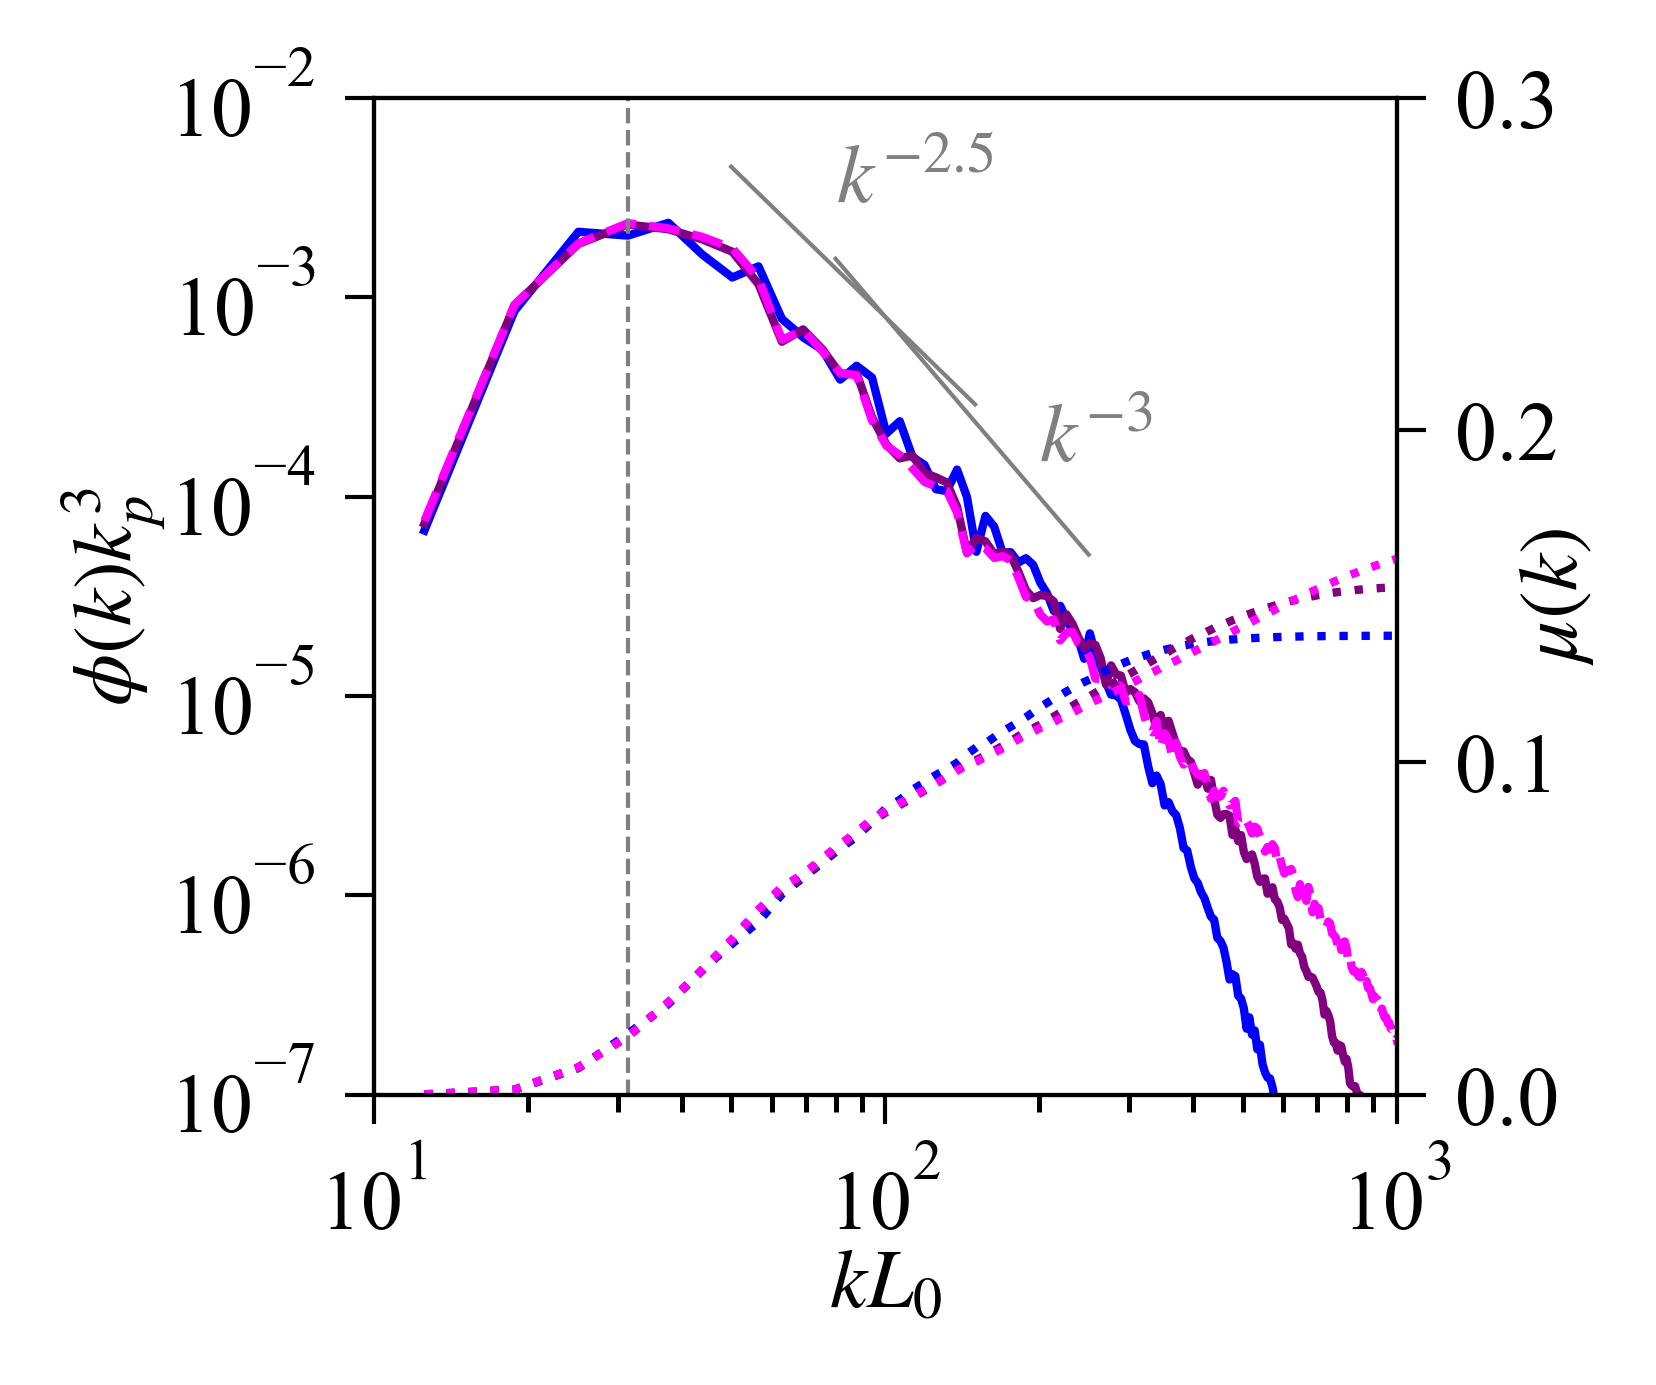

In [125]:
""" For a talk """

fig = plt.figure(figsize = [2.2,2.2]); ax = plt.gca()
ax2 = ax.twinx()

# for k, config in enumerate(config_set):
config = config2_2
for (j, case) in enumerate(config.cases):
    if (case.NL == 15) and (case.LEVEL == 9) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        mu = steepness_trunc (case.Fkmod, case.kmod)
        ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c='blue', lw=1)
        """ Add the original spectrum """
#             ax.plot(case.kmod[2:38]*config.L0, config.P*case.kmod[2:38]**(-2.5)*np.exp(-1.25*(config.kp/case.kmod[2:38])**2)*config.kp**3, '--', c=case.cc, lw=0.5)
        ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c='blue', lw=1)
    if (case.NL == 15) and (case.LEVEL == 10) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        mu = steepness_trunc (case.Fkmod, case.kmod)
        ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c='purple', lw=1)
        """ Add the original spectrum """
#             ax.plot(case.kmod[2:38]*config.L0, config.P*case.kmod[2:38]**(-2.5)*np.exp(-1.25*(config.kp/case.kmod[2:38])**2)*config.kp**3, '--', c=case.cc, lw=0.5)
        ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c='purple', lw=1)
    if (case.NL == 15) and (case.LEVEL == 11) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
        mu = steepness_trunc (case.Fkmod, case.kmod)
        ax.plot(case.kmod[2:]*config.L0, case.Fkmod[2:]*config.kp**3, c='magenta', lw=1, linestyle='--')
        """ Add the original spectrum """
#             ax.plot(case.kmod[2:38]*config.L0, config.P*case.kmod[2:38]**(-2.5)*np.exp(-1.25*(config.kp/case.kmod[2:38])**2)*config.kp**3, '--', c=case.cc, lw=0.5)
        ax2.plot(case.kmod[2:]*config.L0, mu[2:], ':',  c='magenta', lw=1)
    

ax.plot(np.arange(50,150,0.05), np.arange(50,150,0.05)**(-2.5)*80, lw=0.5, c='gray')
ax.text(80, 0.003, '$k^{-2.5}$', c='gray')
ax.plot(np.arange(80,250,0.05), np.arange(80,250,0.05)**(-3.)*800, lw=0.5, c='gray')
ax.text(200, 0.00015, '$k^{-3}$', c='gray')

ax.set_ylabel('$\phi(k)k_p^3$', labelpad=0)
ax.set_xlabel('$kL_0$', labelpad=0)
ax2.set_ylabel('$\mu(k)$', labelpad=-5)
# ax2.axhline(0.1,ls='--',color='C7',lw=0.5)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax.legend(loc='lower left', fancybox=False, bbox_to_anchor=(1.4, 0.2), handlelength=0.8)

ax.set_xscale('log')
ax.set_yscale('log')
# Limit of resolution
N = 512; L = 200; kp = 2*np.pi/(L/5); omegap = (9.8*kp)**0.5
k_m = 2*np.pi/(L/512*4)
ax.set_xlim([10,k_m*L])
ax.set_xlim([10,1000])
ax.set_ylim([10**(-7.),10**(-2.)])
ax2.set_ylim([0,0.3])
ax.axvline(2*np.pi/(L/5)*L,ls='--',color='C7',lw=0.5)
ax.set_yticks([10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2)])

# alpha = 1
# config = config2_2
# print(config.L0)
# print(9.8/(4.375/alpha)**2*config.L0)
# ax.fill_between(
#         x=config.kmod*config.L0, 
#         y1=config.Fkmod*config.kp**3, 
#         where= (9.8/(4.875/alpha)**2 < config.kmod)&(config.kmod < 9.8/(1.875/alpha)**2),
#         color=plt.get_cmap('Oranges')(0.5), alpha = 0.2)


/tmp/ipykernel_195700/2195156860.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/time_ensemble.pdf', bbox_inches='tight', pad_inche=0.)
/tmp/ipykernel_195700/2195156860.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_nondim/time_ensemble.eps', bbox_inches='tight', pad_inche=0.)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


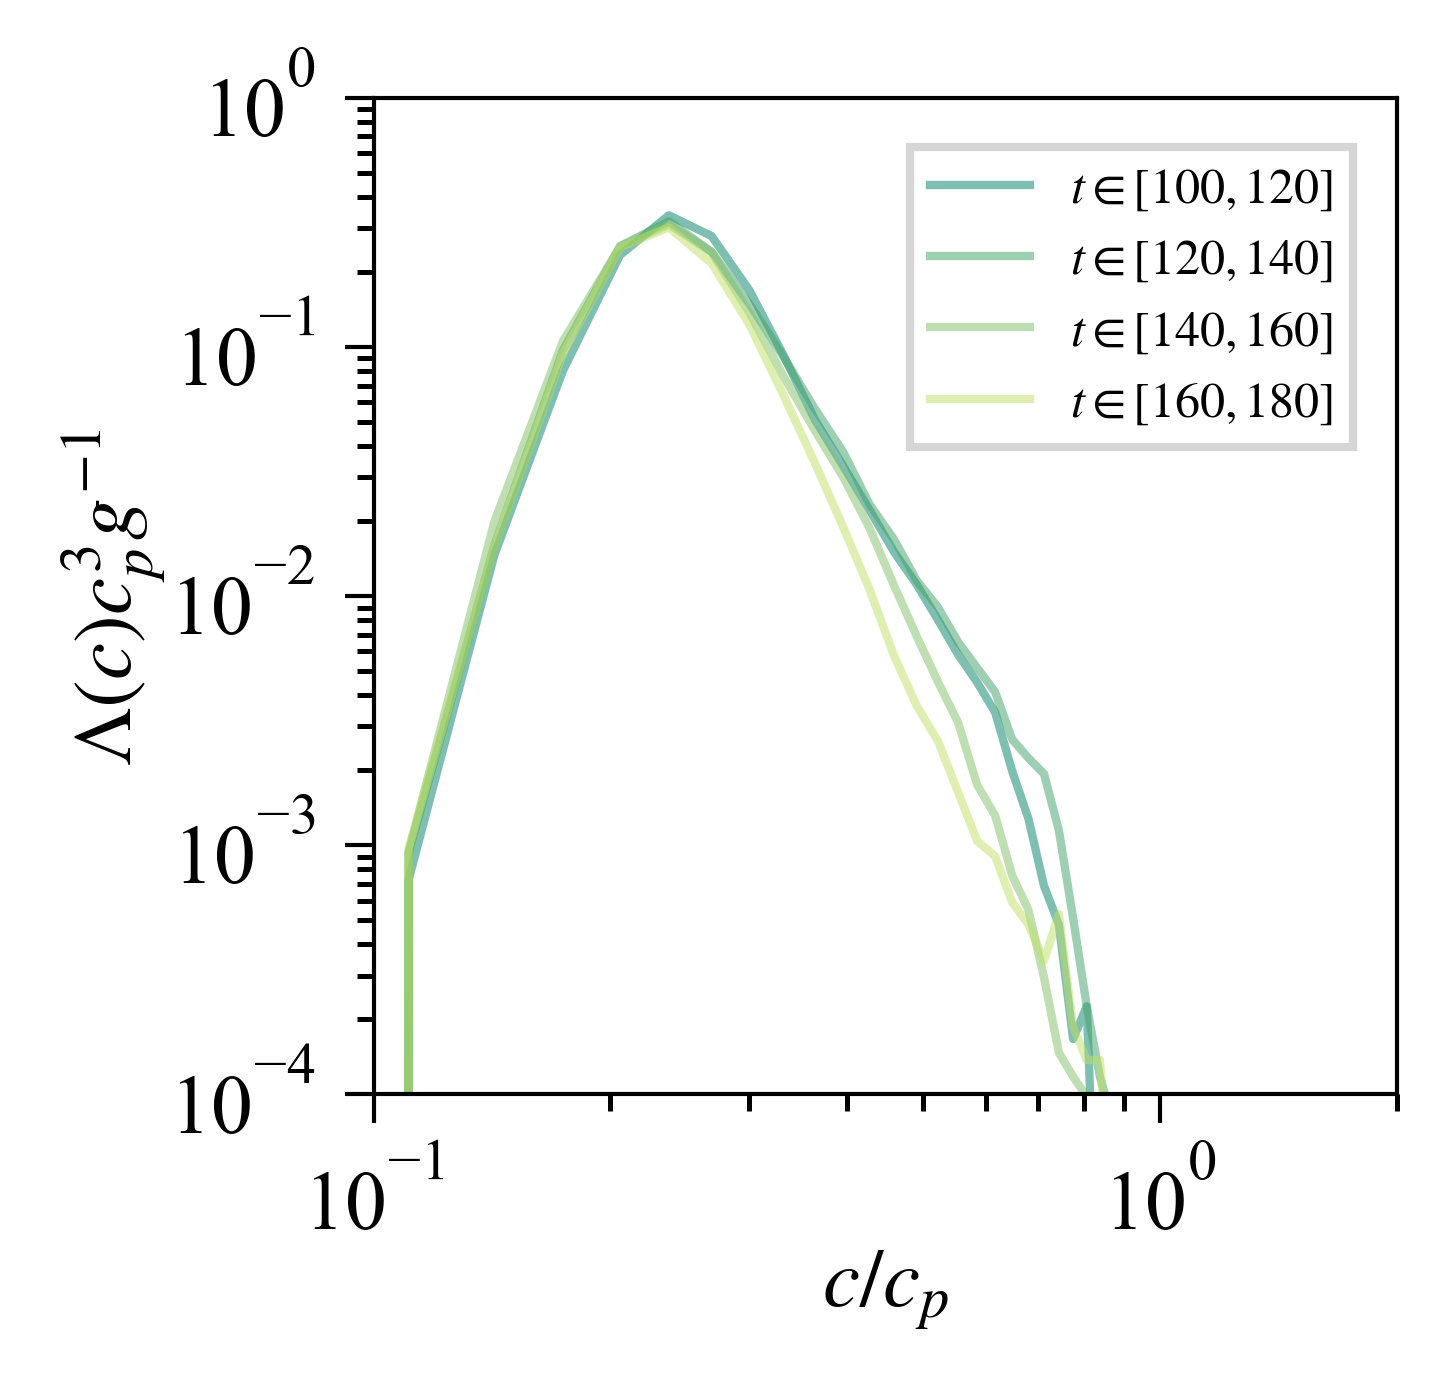

In [227]:
""" Check that the time average is good enough as ensemble average. """
fig = plt.figure(figsize=[2.2,2.2]); ax = plt.gca()

config = config2_2
hist_ensem = load_object('pickle/breakingstat_P0.02_L10.pkl')
normx = (9.8/config.kp)**0.5
normy = 1/((9.8/config.kp)**1.5/9.8)
case = config.cases[3]
bins = case.hist_ensem['bins']
bins_plotting = bins[1:] - (bins[2] - bins[1])/2
for i,hist in enumerate(hist_ensem['hist_ensem']):
    if case.Htheta == 0.503:
        plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                 label = '$t \in [%g, %g]$' %(100+20*i, 120+20*i), c=plt.get_cmap('summer')(i/4), linestyle='-', alpha=0.5, lw=1)            # The extra filter 

plt.xscale('log'); plt.yscale('log')
plt.xlim([0.1,2])
plt.ylim([10**(-4),10**(0)])
plt.xlabel(r'$c/c_p$', labelpad=0)
plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$', labelpad=0)

plt.legend(fancybox=False, fontsize=6, loc='center left', bbox_to_anchor=(0.5, 0.8))
fig.savefig('figures_nondim/time_ensemble.pdf', bbox_inches='tight', pad_inche=0.)
fig.savefig('figures_nondim/time_ensemble.eps', bbox_inches='tight', pad_inche=0.)